# Metodología para la Estimación y Modelamiento de la DNI, la DHI y la POA a partir de la GHI


### Resolución 5-min

Universidad de los Andes  y Consejo Nacional de Operación.

Julio, 2021.
___
### TABLA DE CONTENIDO

#### Introducción y Contexto

#### Sección 1: Información Geográfica

#### Sección 2: Base de Datos
- 2.1. irrad_range: Función para extraer un dataframe de irradiancia para un rango de tiempo
- 2.2. irrad_analysis: Función para extraer máximo y mínimo de los df dados por irrad_range

#### Sección 3: Configuración del Sistema
- 3.1. Inversores
- 3.2. Módulos FF
- 3.3. Configuración de Arreglos FV

#### Sección 4: Posición Solar
- 4.1. Cenit a 6:00 y 18:00h

#### Sección 5: Modelos de Descomposición: ERBS
- 5.1. Erbs
     - 5.1.1. Erbs Corr
- 5.2. Airmass
     - 5.2.1. Relative Airmass
     - 5.2.2. Absolute Airmass
     - 5.2.3. Obtener Función Airmass
- 5.3. DNI Extraterrestre
- 5.4. Irradiancia POA
     - 5.4.1. POA Cielo Difuso (Sky Diffuse)
     - 5.4.2. POA Suelo Difuso (Ground Diffuse)
     - 5.4.3. POA Total
     - 5.4.4. POA Total con función Get_Total_Irradiance (gti)
     - 5.4.5. POA Control de Calidad de Datos
- 5.5. Comparación Modelado vs. Medido
    - 5.5.1. Hay Davies vs. Medido
    - 5.5.2. GTI Perez vs. Medido
    - 5.5.3. Hay Davies vs. GTI Perez
- 5.6. Comparación Otros Modelos Transposición vs. Medido
- 5.7. Métricas Estadísticas Modelos Transposición
- 5.8. Simulación de Producción Planta FV
    - 5.8.1. Producción DC: Voltaje, Corriente y Potencia
    - 5.8.2. Pérdidas
    - 5.8.3. Potencia AC
    - 5.8.4. Energía Diaria

#### Sección 6: Modelos de Descomposición: DISC
- 6.1. DISC
     - 6.1.1. DISC Corr
- 6.2. Irradiancia POA (Todos los Modelos Transposición)
- 6.3. Control de Calidad de Datos
- 6.4.  Comparación Modelado vs. Medido
- 6.5. Métricas Estadísticas Modelos Transposición
- 6.6. Simulación de Producción Planta FV
    - 6.6.1. Producción DC: Voltaje, Corriente y Potencia
    - 6.6.2. Pérdidas
    - 6.6.3. Potencia AC
    - 6.6.4. Energía Diaria

#### Sección 7: Modelos de Descomposición: DIRINT
- 7.1. DIRINT
     - 7.1.1. DIRINT Corr
- 7.2. Irradiancia POA (Todos los Modelos Transposición)
- 7.3. Control de Calidad de Datos
- 7.4.  Comparación Modelado vs. Medido
- 7.5. Métricas Estadísticas Modelos Transposición
- 7.6. Simulación de Producción Planta FV
    - 7.6.1. Producción DC: Voltaje, Corriente y Potencia
    - 7.6.2. Pérdidas
    - 7.6.3. Potencia AC
    - 7.6.4. Energía Diaria

#### Sección 8: Modelos de Descomposición: DIRINDEX
- 8.1. DIRINDEX
     - 8.1.1. DIRINDEX Corr
- 8.2. Irradiancia POA (Todos los Modelos Transposición)
- 8.3. Control de Calidad de Datos
- 8.4.  Comparación Modelado vs. Medido
- 8.5. Métricas Estadísticas Modelos Transposición
- 8.6. Simulación de Producción Planta FV
    - 8.6.1. Producción DC: Voltaje, Corriente y Potencia
    - 8.6.2. Pérdidas
    - 8.6.3. Potencia AC
    - 8.6.4. Energía Diaria

#### Sección 9: Conclusiones
___

## <span style='color:CadetBlue'>Introducción y Contexto</span> <span style='color:White'>code:1</span>

1. Acuerdo CNO 1226 de 2019 y Resolución CREG 060 de 2019, los parámetros de irradiancia que se deben medir y reportar por parte de los agentes operadores de plantas solares fotovoltaicas son [1]:

    - Irradiancia en el plano de arreglo (POA, por sus siglas en inglés).
    - Irradiancia global horizontal (GHI, por sus siglas en inglés).
<br>
<br>
2. El Acuerdo CNO 1042 de 2018, las plantas que aún no han entrado en operación deben medir y reportar **únicamente el GHI** [2].
<br>
3. Estimar la irradiancia POA requiere una secuencia de modelos:

    - **Descomposición:** $\:$ <span style='outline:2px solid Orange; color:Peru'>GHI --> DNI, DHI</span>
        - Erbs, Boland, DISC, DIRINT, DIRINDEX.
    <br>
    <br>
    - **Transposición:** $\:$ <span style='outline:2px solid Orange; color:Peru'>GHI, DNI, DHI --> POA</span>
        - Isotrópico, Klucher, Reindl, King, Hay-Davies, Perez-Ineichen.

![Figuras tomadas de PVSC 48 Python Tutorial](Figs/GHI_DHI_DNI.png 'GHI_DHI_DNI')

**Nota:** Figuras tomadas de [PVSC 48 Python Tutorial](https://pvsc-python-tutorials.github.io/PVSC48-Python-Tutorial/Tutorial%201%20-%20TMY%20Weather%20Data.html) [3].

4. El proceso de modelado sigue el flujo de trabajo estipulado por Lave et al. (2014):

![Figuras tomadas de Lave et al. (2014)](Figs/Flujo_Trabajo.png 'Proceso de Modelado')

$$
DNI = \frac{GHI - DHI}{cos(cenit)}
$$

**Nota:** Diagrama adaptado de [Lave et al. (2014)](https://www.osti.gov/servlets/purl/1569197) [4].

<br>

5. <span style='color:Crimson'> **¿Cuál es el problema?:** La cantidad de modelos de descomposición y transposición (y su combinación, i.e. descomposición + transposición) genera confusiones e inconvenientes en el despliegue de sistemas fotovoltaicos ---e.g. sub o sobre estimación de producción energética y conflictos de análisis operativos y financieros </span> [4]<span style='color:Crimson'>.</span>
<br>
<br>
6. <span style='color:SeaGreen'> **¿Qué hacemos?:** Alcance 1 de Convenio Específico 5: Metodología para la estimación y modelamiento de la DNI, DHI e irradiancia POA a partir de la GHI.</span>
    - <span style='color:SeaGreen'> Prueba de concepto de la metodología, validación con datos disponibles y estimación de los errores e incertidumbres.</span>
    
    - <span style='color:SeaGreen'> En el presente Jupyter Notebook se suministran las memorias de cálculo debidamente documentadas y la metodología sugerida.</span>

<br>
<br>
[1] Acuerdo CNO 1226 (2019). Protocolo de confiabilidad de la medición, verificación de calidad y reporte de variables meteorológicas en Plantas Solares Fotovoltaicas conectadas al STN Y STR, Universidad de los Andes y Consejo Nacional de Operación. Bogotá D.C., Colombia.

[2] Acuerdo CNO 1042 (2018). Protocolo: Verificación y medición de series históricas para cálculo de ENFICC en plantas solares fotovoltaicas, Universidad de los Andes y Consejo Nacional de Operación. Bogotá D.C., Colombia.

[3] M. Mikofski, S. Ayala-Pelaez & K. Anderson (n.d.) PVSC 48 Python Tutorial. [online]. Retrieved from: https://pvsc-python-tutorials.github.io/PVSC48-Python-Tutorial/Tutorial%200%20-%20Overview.html.

[4] M. Lave, C. Hansen, A. Pohl and B. Hayes (2014). Evaluation of Irradiance Decomposition and Transposition Models at Locations Across the United States, SAND2014-15017PE, First Solar & Sandia National Laboratories. URL: https://www.osti.gov/servlets/purl/1569197.

---

In [1]:
#Configuración
%matplotlib inline
import matplotlib.pyplot as plt

#Built-in Python Modules
import datetime
import inspect
import os
import csv
import math
import random
import warnings
from calendar import monthrange
warnings.filterwarnings(action='ignore')

#Complementos de Python
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import dates as mpl_dates
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

#MMódulos Sandia PVLIB-Python
import pvlib
from pvlib import solarposition, irradiance, atmosphere, pvsystem
from pvlib.location import Location
from pvlib.pvsystem import PVSystem, retrieve_sam

## 1. Información Geográfica

In [2]:
#Coordenadas Geográficas (Bogotá, DC, Colombia), Edificio SD
latitude = 4.604535
longitude = -74.066038
tz = 'America/Bogota'  #Huso Horario UTC -5:00 (America\Bogota) según Minicipio.com.co
altitude = 2632          #Altitud media -msnm- (Meteoblue, Municipio.com.co, Wikipedia)

#Ubicación Geográfica
location = pvlib.location.Location(latitude, longitude, tz, altitude)

## 2. Base de Datos

In [5]:
resolution = '5Min' #['5Min', 'Hourly']
file_name = os.path.join('data','SD_5Min.xlsx')

#Meteocontrol Irradiance Measurement
meteocontrolDB = pd.read_excel(io=file_name, sheet_name='Radiacion')
meteocontrolDB = pd.merge(meteocontrolDB, pd.read_excel(io=file_name, sheet_name='Potencia_DC'), on=['Date'])
meteocontrolDB = pd.merge(meteocontrolDB, pd.read_excel(io=file_name, sheet_name='Potencia_AC'), on=['Date'])
meteocontrolDB = pd.merge(meteocontrolDB, pd.read_excel(io=file_name, sheet_name='Temperatura'), on=['Date'])
meteocontrolDB = pd.merge(meteocontrolDB, pd.read_excel(io=file_name, sheet_name='Energia'), on=['Date'])

#Clean Unnamed columns, taken from https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
cols = [c for c in meteocontrolDB.columns if c[:7] != "Unnamed"]
meteocontrolDB = meteocontrolDB[cols]

#Filter from August 3rd onwards when the system was fullo operational
meteocontrolDB = meteocontrolDB[meteocontrolDB["Date"] >= "2019-08-03T00:00:00"]
meteocontrolDB = meteocontrolDB.fillna(0)
meteocontrolDB.head()

Date  Lufft Irrad., W/m2  Meteocontrol Irrad., W/m2  \
576 2019-08-03 00:00:00                 0.0                      1.112   
577 2019-08-03 00:05:00                 0.0                      1.110   
578 2019-08-03 00:10:00                 0.0                      1.106   
579 2019-08-03 00:15:00                 0.0                      1.106   
580 2019-08-03 00:20:00                 0.0                      1.108   

     DC Power SysB, W  DC Power SysA, W  DC Power SysB String 1, W  \
576               0.0               0.0                        0.0   
577               0.0               0.0                        0.0   
578               0.0               0.0                        0.0   
579               0.0               0.0                        0.0   
580               0.0               0.0                        0.0   

     DC Power SysB String 2, W  AC Power SysB, W  AC Power SysA, W   Tmod, ºC  \
576                        0.0               0.0               0.0  11.481095   
577                        0.0               0.0               0.0  11.452286   
578                        0.0               0.0               0.0  11.456021   
579                        0.0               0.0               0.0  11.417024   
580                        0.0               0.0               0.0  11.345796   

      Tamb, ºC  Energy SysB, kWh  Energy SysA, kWh  
576  11.481095               0.0               0.0  
577  11.452286               0.0               0.0  
578  11.456021               0.0               0.0  
579  11.417024               0.0               0.0  
580  11.345796               0.0               0.0

In [6]:
data_columns_name = ['Datetime', 'ghi', 'effective_irrad', 'dc_B', 'dc_A', 'dc_B_str1', 'dc_B_str2', 'ac_B', 'ac_A', 'module_temp', 'air_temp', 'energy_B', 'energy_A']
meteocontrolDB.columns = data_columns_name
meteocontrolDB = meteocontrolDB.set_index('Datetime')
meteocontrolDB = meteocontrolDB.tz_localize(tz)
meteocontrolDB = meteocontrolDB.fillna(0)
meteocontrolDB.head()

ghi  effective_irrad  dc_B  dc_A  dc_B_str1  \
Datetime                                                                 
2019-08-03 00:00:00-05:00  0.0            1.112   0.0   0.0        0.0   
2019-08-03 00:05:00-05:00  0.0            1.110   0.0   0.0        0.0   
2019-08-03 00:10:00-05:00  0.0            1.106   0.0   0.0        0.0   
2019-08-03 00:15:00-05:00  0.0            1.106   0.0   0.0        0.0   
2019-08-03 00:20:00-05:00  0.0            1.108   0.0   0.0        0.0   

                           dc_B_str2  ac_B  ac_A  module_temp   air_temp  \
Datetime                                                                   
2019-08-03 00:00:00-05:00        0.0   0.0   0.0    11.481095  11.481095   
2019-08-03 00:05:00-05:00        0.0   0.0   0.0    11.452286  11.452286   
2019-08-03 00:10:00-05:00        0.0   0.0   0.0    11.456021  11.456021   
2019-08-03 00:15:00-05:00        0.0   0.0   0.0    11.417024  11.417024   
2019-08-03 00:20:00-05:00        0.0   0.0   0.0    11.345796  11.345796   

                           energy_B  energy_A  
Datetime                                       
2019-08-03 00:00:00-05:00       0.0       0.0  
2019-08-03 00:05:00-05:00       0.0       0.0  
2019-08-03 00:10:00-05:00       0.0       0.0  
2019-08-03 00:15:00-05:00       0.0       0.0  
2019-08-03 00:20:00-05:00       0.0       0.0

#### 2.1. irrad_range: Función para extraer un dataframe de irradiancia para un rango de tiempo

In [7]:
'''
irrad_range function extracts from the indicated dataframe 
those data included in the stipulated month and year.
'''
#Month Numeration
months_key = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

#Dictionary to save the dataframes from the function
data_dict = dict()

def irrad_range(year, month, dataframe):
    data = pd.DataFrame()
    
    #Extract data by year and month
    data = dataframe.loc[(dataframe.index.year == year) & (dataframe.index.month == months_key[month])]
    
    if data.empty:
        print('{}-{} does not exist in the database. Stored as None.'.format(month, year))
        data_dict['{}{}'.format(month, year)] = None
        
    if not data.empty:
        #Create an 'Index' column for analysis purposes
        data['Index'] = range(0, len(data))    

        #Changing numerical-ordered index to datetime index
        data.set_index(data.index, inplace=True)
        data.drop(['Index'], axis=1, inplace=True)

        data_dict['{}{}'.format(month, year)] = data
    
    return(data_dict)

#### 2.2. irrad_analysis: Función para extraer máximo y mínimo de los df dados por irrad_range

In [8]:
'''
Plots set-up function.
'''
def plot_setup(setup, legend):
    if setup == True:
        hor = 7
        ver = 4
        plt.figure(figsize=(hor,ver))

        plt.tick_params(direction='in', length=5, width=0.75, grid_alpha=0.3)
        plt.xticks(rotation=0)
        plt.grid(True);
        plt.tight_layout;
    if legend == True:
        plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=9);
    else:
        None

'''
Common plots set-up function.
'''
def plot_specs(title, ylabel, xlabel, rot, ylim_min, ylim_max, xlim_min, xlim_max, loc):
    plt.rc('font', family='Helvetica')
    plt.rcParams['axes.axisbelow'] = True;
    
    plt.title(title, fontname="Helvetica", fontsize=15);
    plt.ylabel(ylabel, fontname="Helvetica", fontsize=13);
    plt.xlabel(xlabel, fontname="Helvetica", fontsize=13);
    
    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=rot)
    plt.ylim(ylim_min, ylim_max)
    plt.xlim(xlim_min, xlim_max)
    plt.grid(True);
    plt.legend(loc=loc, fontsize=9);
    plt.tight_layout;

In [9]:
'''
irrad_analysis function performs a statistical analysis in order
to extract max. and min. values for each data point.
'''

#Dictionary to save the dataframes from the function
analysis_dict = dict()
bootstrap_dict = dict() #Dictionary for Method 2.2: Bootstrap
skycond_dict = dict()
temp_skycond = dict()

def irrad_analysis(year, month, dictionary, plotall):
    #Array list to store daily irradiance values from irrad_range
    irrad = []
    irrads = []
    
    #Calling the data from irrad_range dictionary previously created
    data = dictionary['{}{}'.format(month, year)]
    
    if data is None:
        print('The dataframe is empty.')
    
    if data is not None:
        #Extracting the days from the data from irrad_range dictionary
        days = data.index.day.unique()

        #Extract time to set the plot xlabel
        times = []
        for i in range(0, len(data)):
            day = 1
            if data.index.day.values[i] == day:
                hour = data.index[i].hour
                minute = data.index[i].minute

                if minute < 10:
                    time_format = '{}:0{}'.format(hour, minute)
                else:    
                    time_format = '{}:{}'.format(hour, minute)
                times.append(time_format)

        #Plot set-up
        plot_setup(setup=True, legend=False)

        #Loop to extract all daily irradiance values
        for i in days:
            '''
            Data analysis:
            1. Extraction of daily dataframes from data_dict (irrad_range function) according to the SC
            2. Extraction of irradiance values from above step.
            3. Statistical analysis for each data-point (time) for all days of the month selected (Step 1 to 4)
            '''
            data_daily = data.loc[data.index.day == i]

            '''
            1. Complete analysis: all days within the month
            '''
            irrad.append(data_daily['effective_irrad'].values)   

            #Step 1: Create an identical irrad dataframe to work on and set time as column names
            step1 = pd.DataFrame(irrad)
            step1.columns = times

            #Step 2: Description of all data-points for the anaylized days
            step2 = step1.describe()

            #Step 3: Transposition of dataframe (Setting timestamps as index and days as column names)
            step3 = step2.transpose()

            #Step 4: Save the analysis in analysis_dict
            analysis_dict['{}{}'.format(month, year)] = step3

            '''
            Plot of the statistical analysis done
            '''
            #Plot
            if plotall != False:
                plt.plot(irrad[i-1], alpha=0.1, linewidth=0.5, linestyle='--', marker='.', fillstyle='none')

                if i==days[-1]:
                    plt.fill_between(x=np.arange(len(irrad[i-1])), 
                                     y1=step3['max'], 
                                     y2=step3['min'], 
                                     color='whitesmoke', alpha=0.35, label='Range')

                    step3['max'].plot(color='#1580E4', marker='.', linestyle='')
                    step3['mean'].plot(color='#2DBD07', marker='.', linestyle='')
                    step3['min'].plot(color='coral', marker='.', linestyle='')

                    plt.title('Comportamiento Irradiancia ({}-{})'.format(month, year), fontname='Helvetica Neue', fontsize=15);
                    plt.ylabel('Irradiancia, $W/m^2$', fontname='Helvetica Neue', fontsize=13);
                    plt.xlabel('Tiempo', fontname='Helvetica Neue', fontsize=13);

                    plt.xlim(0, len(irrad[i-1]))
                    plt.ylim(0, None)
                    plt.grid(True)
                    plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=9);
                    
                    if plotall == False:
                        plt.close()
            
    return(analysis_dict)

In [10]:
'''
irrad_analysis function example: analysing Jan-2021 data.
'''
#Selecting year and month to extract
years = [2019, 2020, 2021]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

dates = ['Sep2019', 'Oct2019', 'Nov2019', 'Dec2019', 'Jan2020', 'Feb2020', 'Mar2020', 'Apr2020', 'May2020', 
         'Jun2020', 'Jul2020', 'Aug2020', 'Sep2020', 'Oct2020', 'Nov2020', 'Dec2020', 'Jan2021', 'Feb2021']

shadows = False #If True shows the irradiance behaviors analysis for each month and year (takes long time)
if shadows == True:
    for date in dates:
        year = int(date[3:])
        month = date[:3]
        data_dict = irrad_range(year=year, month=month, dataframe=meteocontrolDB)
        irrad_analysis(year=year, month=month, dictionary=data_dict, plotall=True);

## 3. Configuración del Sistema

#### 3.1. Inversores

In [11]:
inverters_database = 'CECInverter';

inverters = retrieve_sam(inverters_database);
inverter_A = inverters.ABB__TRIO_50_0_TL_OUTD_US_480__480V_; #51.24 kWp System
inverter_B = inverters.ABB__TRIO_27_6_TL_OUTD_S_US_480__480V_; #28.82 kWp System

print(inverter_A)

Vac                          480
Pso                   143.487045
Paco                     50000.0
Pdco                50881.769531
Vdco                       720.0
C0                          -0.0
C1                     -0.000024
C2                      0.001013
C3                     -0.000319
Pnt                          1.0
Vdcmax                     800.0
Idcmax                 70.669124
Mppt_low                   520.0
Mppt_high                  800.0
CEC_Date              10/15/2018
CEC_Type     Utility Interactive
Name: ABB__TRIO_50_0_TL_OUTD_US_480__480V_, dtype: object


#### 3.2. Módulos FV

In [12]:
# Name,Technology,Bifacial,STC,PTC,A_c,Length,Width,N_s,I_sc_ref,V_oc_ref,I_mp_ref,V_mp_ref,alpha_sc,beta_oc,T_NOCT,a_ref,I_L_ref,I_o_ref,R_s,R_sh_ref,Adjust,gamma_r,BIPV,Version,Date
# LG Electronics Inc. LG400N2W-A5,Mono-c-Si,0,400.316000,368.400000,2,2,1,72,10.470000,49.300000,9.860000,40.600000,0.003141,-0.128180,47.700000,1.821208,10.481150,1.807477e-11,0.312859,293.805420,9.380614,-0.360000,N,SAM 2018.11.11 r2,1/3/2019

LG400N2WA5 = {
'BIPV':                'N',
'Date':          '1/3/2019',
'T_NOCT':             47.7,
'A_c':                 2.0,
'N_s':                  72,
'I_sc_ref':          10.47,
'V_oc_ref':           49.3,
'I_mp_ref':           9.86,
'V_mp_ref':           40.6,
'alpha_sc':       0.003141,
'beta_oc':        -0.12180,
'a_ref':            1.821208,
'I_L_ref':          10.481150,
'I_o_ref':         1.807477e-11,
'R_s':               0.312859,
'R_sh_ref':         293.805420,
'Adjust':            9.380614,
'gamma_r':          -0.36,
'Version':          'NRELv1',
'PTC':               368.4,
'Technology':    'Mono-c-Si',
'Name': 'LG Electronics LG400N2W-A5',
    
#PVSyst Required Variables
'gamma_ref':         1.013, #Diode Quality Factor, Value from PVSyst    
'mu_gamma':          0, #PVSyst specify that mono-cSi modules mu_gamma is very close to zero
'R_sh_0':            3500, #Resistance shunt at 0 irrad., Value from PVSyst                                                           
'R_sh_exp':          5.5, #Experimental resistance shunt, Value from PVSyst
'cells_in_series':  72,    
'EgRef':            1.121,

#PVWatts Required Variables   
'pdc0':              400.316, #Value from PVWatts API and validated with PVSyst API
'gamma_pdc':        -0.0036 #Value from PVWatts API and validated with PVSyst API
}

module = pd.Series(LG400N2WA5, name='LG_Electronics_LG400N2W_A5')

#### 3.3. Configuración de Arreglos FV

In [13]:
# Definition of the Los Andes Photovoltaic Systems
LosAndesSys = 'Los Andes 80 kWp System'

#System A
sysA_name = 'Los Andes 51.25 kWp System Capacity'
mps_A = 16 #Modules Per String
spi_A = 8 #Strings Per Inverter

system_A = PVSystem(module_parameters=module, inverter_parameters=inverter_A, surface_azimuth=180, 
                    surface_tilt=10, modules_per_string=mps_A, strings_per_inverter=spi_A)

#System B
sysB_name = 'Los Andes 28.82 kWp System Capacity'
mps_B = 18 #Modules Per String
spi_B = 4 #Strings Per Inverter
system_B = PVSystem(module_parameters=module, inverter_parameters=inverter_B, surface_azimuth=180, 
                    surface_tilt=10, modules_per_string=mps_B, strings_per_inverter=spi_B)

## 4. Posición Solar

El algoritmo de posición solar predeterminado se basa en **Reda and Andreas (2004)**.

Además de ```nrel_numpy``` (algoritmo por defecto), también están disponibles los siguientes métodos: ``` nrel_numba```, ```pyephem```, ``` ephemeris``` y ```nrel_c```.

**Info:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.solarposition.get_solarposition.html.

In [14]:
#Calculate solar position parameters
solpos = location.get_solarposition(times=meteocontrolDB.index,
                                    method='nrel_numpy')

solpos.head()

apparent_zenith      zenith  apparent_elevation  \
Datetime                                                                     
2019-08-03 00:00:00-05:00       157.811514  157.811514          -67.811514   
2019-08-03 00:05:00-05:00       157.812572  157.812572          -67.812572   
2019-08-03 00:10:00-05:00       157.745111  157.745111          -67.745111   
2019-08-03 00:15:00-05:00       157.609750  157.609750          -67.609750   
2019-08-03 00:20:00-05:00       157.407710  157.407710          -67.407710   

                           elevation     azimuth  equation_of_time  
Datetime                                                            
2019-08-03 00:00:00-05:00 -67.811514  358.414929         -6.244021  
2019-08-03 00:05:00-05:00 -67.812572    1.570773         -6.243755  
2019-08-03 00:10:00-05:00 -67.745111    4.717104         -6.243488  
2019-08-03 00:15:00-05:00 -67.609750    7.834610         -6.243222  
2019-08-03 00:20:00-05:00 -67.407710   10.905014         -6.242955

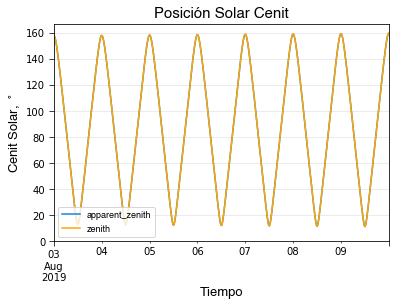

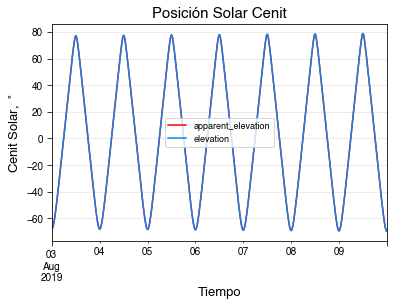

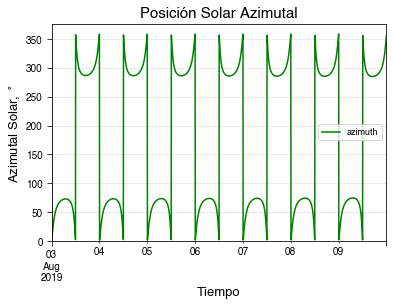

In [15]:
# Figure 1
plt.figure()

a = 0
ndays = 7
b = a + ndays*288

solpos['apparent_zenith'][a:b].plot(label='apparent_zenith', color='#1580E4');
solpos['zenith'][a:b].plot(label='zenith', color='orange');

plot_specs(title='Posición Solar Cenit',
           ylabel='Cenit Solar, $^\circ$',
           xlabel='Tiempo',
           rot=None, 
           ylim_min=0, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

# Figure 2
plt.figure()

solpos['apparent_elevation'][a:b].plot(label='apparent_elevation', color='red');
solpos['elevation'][a:b].plot(label='elevation', color='#1580E4');

plot_specs(title='Posición Solar Cenit',
           ylabel='Cenit Solar, $^\circ$',
           xlabel='Tiempo',
           rot=None, 
           ylim_min=None, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

# Figure 3
plt.figure()

solpos['azimuth'][a:b].plot(label='azimuth', color='green');

plot_specs(title='Posición Solar Azimutal',
           ylabel='Azimutal Solar, $^\circ$',
           xlabel='Tiempo',
           rot=None, 
           ylim_min=0, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

### 4.1. Cenit a 6:00 y 18:00h

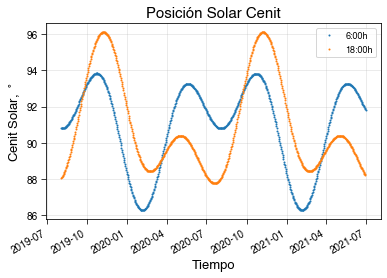

In [18]:
zenith_6h = 180 -  solpos.zenith.loc[(solpos.zenith.index.hour == 6) & (solpos.zenith.index.minute == 0)]
zenith_18h = solpos.zenith.loc[(solpos.zenith.index.hour == 18) & (solpos.zenith.index.minute == 0)]

zenith_6h.plot(ls='', marker='.', ms=2, label='6:00h')
zenith_18h.plot(ls='', marker='.', ms=2, label='18:00h')

plot_specs(title='Posición Solar Cenit',
           ylabel='Cenit Solar, $^\circ$',
           xlabel='Tiempo',
           rot=30, 
           ylim_min=None, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

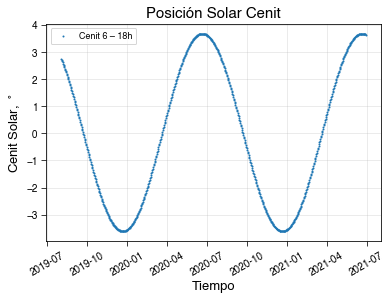

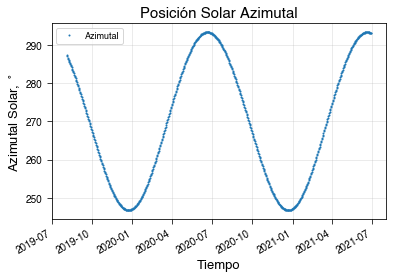

In [21]:
#Solar Zenith
plt.figure()

zenith_dif = pd.Series(zenith_6h[:-1].values - zenith_18h.values)

plt.plot(zenith_6h[:-1].index, zenith_dif, ls='', marker='.', ms=2, label='Cenit 6 – 18h')

plot_specs(title='Posición Solar Cenit',
           ylabel='Cenit Solar, $^\circ$',
           xlabel='Tiempo',
           rot=30, 
           ylim_min=None, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

#Solar Azimuth
plt.figure()

solpos.azimuth.loc[(solpos.azimuth.index.hour == 18) & (solpos.azimuth.index.minute == 0)].plot(ls='', marker='.', ms=2, label='Azimutal')

plot_specs(title='Posición Solar Azimutal',
           ylabel='Azimutal Solar, $^\circ$',
           xlabel='Tiempo',
           rot=30, 
           ylim_min=None, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

## 5. Modelos de Descomposición: ERBS

### <span style='color:CadetBlue'>5.1. Erbs</span> <span style='color:White'>code:2</span>

Estima la fracción difusa $DF$ (GHI/Radiación Extraterreste) a través de una relación empírica entre DF y el Índice de Claridad ($K_t$) (GHI/GHI$_{clear \: sky}$).

$$
DHI = DF \times GHI
$$

$$
DNI = \frac{GHI - DHI}{cos(Z)}
$$

Siendo $Z$ el ángulo cenit.

**Info:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.irradiance.erbs.html#pvlib.irradiance.erbs.

<img src='Figs/solpos.png' width='450' height='450' />

**Nota:** Figura tomada  de [Thil et al. (2016)](https://www.researchgate.net/figure/Representation-of-azimuth-and-zenith-angles_fig1_299413323).

<img src='Figs/solpos.gif' width='500' height='500' />

**Nota:** Animación tomada  de [Autodesk Knowledge Network](https://knowledge.autodesk.com/search-result/caas/simplecontent/content/solar-position.html).

---

[5] D. G. Erbs, S. A. Klein and J. A. Duffie, Estimation of the diffuse radiation fraction for hourly, daily and monthly-average global radiation, Solar Energy 28(4), pp 293-302, 1982. Eq. 1.

---

In [22]:
erbs = pvlib.irradiance.erbs(ghi=meteocontrolDB.ghi, 
                             zenith=solpos.zenith, 
                             datetime_or_doy=meteocontrolDB.index, 
                             min_cos_zenith=0.065, 
                             max_zenith=87) #80

erbs.head()

dni  dhi   kt
Datetime                                
2019-08-03 00:00:00-05:00  0.0  0.0  0.0
2019-08-03 00:05:00-05:00  0.0  0.0  0.0
2019-08-03 00:10:00-05:00  0.0  0.0  0.0
2019-08-03 00:15:00-05:00  0.0  0.0  0.0
2019-08-03 00:20:00-05:00  0.0  0.0  0.0

#### 5.1.1. Erbs Corr

De acuerdo con Cliff Hansen (de Sandia National Labs):

> Los modelos Erbs ---también Dirint--- dibujan curvas simples a través de una nube de puntos de la relación observada entre irradiancia horizontal difusa (DHI) y GHI, frente al índice de claridad (GHI / horizontal extraterrestre). Los datos se recopilan para una amplia gama de condiciones y existe una dispersión significativa en la relación DHI / GHI en cualquier valor particular del índice de claridad. El punto es que el modelo no puede representar todas las condiciones particulares que la naturaleza puede crear.
<br>
<br>
El modelo arroja el valor DNI que es matemáticamente consistente con el GHI de entrada y el cenit solar. Cuando los valores de GHI son altos (en relación con un modelo de cielo claro), el modelo aumentará el DNI para que GHI -- DHI * cos (cenit) sea igual al valor de DHI tomado de la curva del modelo. Esto puede producir valores irrazonables de DNI, particularmente cuando el cenit es grande, que desafortunadamente también es donde es más probable que las mediciones de GHI sean inexactas. Los valores grandes de DNI ocurren temprano en el primer día cuando la elevación solar es muy baja, por ejemplo, el cenit de 84.5 grados coloca al sol a solo 3 grados por encima del horizonte.


El parámetro ```max_zenith``` se puede definir según la hora de salida o puesta del sol para evitar problemas con las sombras que proyecta el sol cuando se encuentra cerca del horizonte. Y ```min_cos_zenith``` es el coseno de este valor.

De acuerdo con Anton Driesse (de PV Performance Labs):

> Estos parámetros no son realmente parte del modelo Erbs, pero se proporcionan en la función pvlib para evitar generar resultados totalmente irrazonables en casos de esquina. Si el sol está cerca de estos límites, espere grandes diferencias entre el modelo y el medido.

 
Cliff Hansen lo ratifica:

> Si el objetivo es modelar la energía fotovoltaica en estas condiciones, una idea es establecer un límite cenital solar de, e.g. 75 grados, para cenit menor que el límite utilizar uno de los modelos disponibles para descomponer GHI en DNI y DHI, y para cenit mayor que el límite, interpolar DNI entre el límite cenital y DNI = 0 en cenit = 90. El DHI se calcula como DHI = GHI - DNI * cos (cenit). Si el objetivo es estimar con precisión el DNI a baja elevación del sol, entonces no tengo ninguna sugerencia inteligente.

Para definir el valor de los parámetros ```max_zenith``` y ```min_cos_zenith``` según los datos obtenidos de la posición del sol con ```location.get_solarposition```, según el día, mes y año del dato instantáneo, ```max_zenith``` es el cenit a las 6:00h (salida del sol) hasta el mediodía, mientras que después de las 12:00h, ```max_zenith``` es el cenit a las 18:00h (puesta del sol).
<br>
<br>

**RESULTADOS** <br>
Al ajustar los parámetros ```max_zenith``` y ```min_cos_zenith``` con los valores de cenit de las 6:00 y 18:00h, se obtiene menor dispersión en los datos pero una sobreestimación energética del 10%, lo cual es ~7.5% mayor que el valor por defecto (87 y 0.065, respectivamente).

**Info:** Conversación PVlib Google Group -- *Too large direct radiation with Erbs model*: https://groups.google.com/g/pvlib-python/c/qFq8E3YCB00.

In [23]:
dni_corr = []
dhi_corr = []
kt_corr = []

for i in range(len(meteocontrolDB)):
    
    h = meteocontrolDB.index[i].hour
    d = meteocontrolDB.index[i].day
    m = meteocontrolDB.index[i].month
    y = meteocontrolDB.index[i].year
    
    if h <= 12:
        max_zenith = zenith_6h.loc[(zenith_6h.index.day == d) & (zenith_6h.index.month == m) & (zenith_6h.index.year == y)][0]
        max_zenith = 90 - max_zenith
    else:
        max_zenith = zenith_18h.loc[(zenith_18h.index.day == d) & (zenith_18h.index.month == m) & (zenith_18h.index.year == y)][0]
        max_zenith = 90 - max_zenith
    
    min_cos_zenith = np.cos(np.radians(max_zenith))
    
    erbs_corr = pvlib.irradiance.erbs(ghi=meteocontrolDB.ghi[i], 
                                      zenith=solpos.zenith[i], 
                                      datetime_or_doy=meteocontrolDB.index[i], 
                                      min_cos_zenith=min_cos_zenith, 
                                      max_zenith=max_zenith)
    
    dni_corr.append(list(erbs_corr.values())[0].item())
    dhi_corr.append(list(erbs_corr.values())[1].item())
    kt_corr.append(list(erbs_corr.values())[2].item())

erbs_corr = pd.DataFrame({'dni': dni_corr,
                          'dhi': dhi_corr,
                          'kt': kt_corr})

erbs_corr = erbs_corr.set_index(erbs.index)

erbs_corr.head()

dni  dhi   kt
Datetime                                
2019-08-03 00:00:00-05:00  0.0  0.0  0.0
2019-08-03 00:05:00-05:00  0.0  0.0  0.0
2019-08-03 00:10:00-05:00  0.0  0.0  0.0
2019-08-03 00:15:00-05:00  0.0  0.0  0.0
2019-08-03 00:20:00-05:00  0.0  0.0  0.0

### 5.2. Airmass

La clase Atmosphere envuelve una variedad de modelos para obtener los datos de la masa de aire. Algunos de los modelos son: (i.) **Simple**, (ii.) **Kasten 1966**, (iii.) **Young-Irvine 1967**, (iv.) **Kasten-Young 1989**, (v.) **Gueymard 1993**, **Young 1994** y **Pickering 2002**.

El modelo predeterminado es **Kasten-Young 1989**.

**Info en el Tutorial de la clase Atmosphere:** https://nbviewer.jupyter.org/github/pvlib/pvlib-python/blob/master/docs/tutorials/atmosphere.ipynb.

##### 5.2.1. Relative Airmass

Este módulo da la masa de aire relativa (no corregida por presión) al nivel del mar cuando se le da un ángulo cenit del sol (en grados).

**Info:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.atmosphere.get_relative_airmass.html.

In [24]:
relative_airmass = atmosphere.get_relative_airmass(zenith=solpos['apparent_zenith'], 
                                                   model='kastenyoung1989')

relative_airmass.head()

Datetime
2019-08-03 00:00:00-05:00   NaN
2019-08-03 00:05:00-05:00   NaN
2019-08-03 00:10:00-05:00   NaN
2019-08-03 00:15:00-05:00   NaN
2019-08-03 00:20:00-05:00   NaN
dtype: float64

##### 5.2.2. Absolute Airmass

Determina la masa de aire absoluta (con presión corregida) a partir de la masa de aire relativa y la presión. Da la masa de aire para ubicaciones que no están al nivel del mar (es decir, no a la presión estándar). El argumento de entrada 'AMrelative' es la masa de aire relativa. El argumento de entrada 'presión' es la presión (en pascales) en la ubicación de interés y debe ser mayor que 0. El cálculo de la masa de aire absoluta es:

$$ Absolute \: Airmass = Relative \: Airmass \times \frac{Pressure}{101325}$$

**Info:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.atmosphere.get_absolute_airmass.html.

In [25]:
pressure = 75160 #Pressute at Pa according to IDEAM —(p. 26 - 27) http://www.ideam.gov.co/documents/21021/21135/CARACTERIZACION+CLIMATICA+BOGOTA.pdf/d7e42ed8-a6ef-4a62-b38f-f36f58db29aa

absolute_airmass = atmosphere.get_absolute_airmass(airmass_relative=relative_airmass,
                                                   pressure=pressure)

absolute_airmass.head()

Datetime
2019-08-03 00:00:00-05:00   NaN
2019-08-03 00:05:00-05:00   NaN
2019-08-03 00:10:00-05:00   NaN
2019-08-03 00:15:00-05:00   NaN
2019-08-03 00:20:00-05:00   NaN
dtype: float64

##### 5.2.3. Obtener Función Airmass

Calcula la masa de aire relativa y absoluta.

**Info:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.location.Location.get_airmass.html

In [26]:
airmass = location.get_airmass(times=meteocontrolDB.index, 
                               solar_position=solpos, 
                               model='kastenyoung1989')

airmass.head()

airmass_relative  airmass_absolute
Datetime                                                     
2019-08-03 00:00:00-05:00               NaN               NaN
2019-08-03 00:05:00-05:00               NaN               NaN
2019-08-03 00:10:00-05:00               NaN               NaN
2019-08-03 00:15:00-05:00               NaN               NaN
2019-08-03 00:20:00-05:00               NaN               NaN

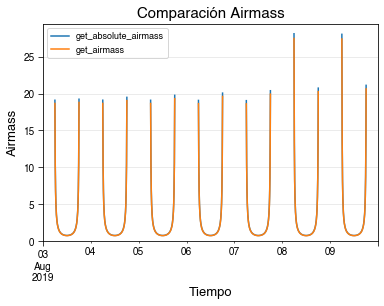

In [27]:
absolute_airmass[a:b].plot(label='get_absolute_airmass')
airmass['airmass_absolute'][a:b].plot(label='get_airmass')

plt.rc('font', family='Helvetica')
plt.rcParams['axes.axisbelow'] = True;

plt.title('Comparación Airmass', fontname="Helvetica", fontsize=15);
plt.ylabel('Airmass', fontname="Helvetica", fontsize=13);
plt.xlabel('Tiempo', fontname="Helvetica", fontsize=13);

plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.ylim(0, None)
plt.grid(True);
plt.legend(loc='best', fontsize=9);
plt.tight_layout;

### 5.3. DNI Extraterrestre

Muchos algoritmos de energía solar comienzan con la irradiancia incidente en la parte superior de la atmósfera de la Tierra, a menudo conocida como radiación extraterrestre. ```PVLIB-Python``` tiene cuatro algoritmos diferentes para calcular el ciclo anual de la radiación extraterrestre dada la constante solar.

Por defecto, el método es **Spencer**. Sin embargo, se utiliza **NREL** por ser más preciso y computacionalmente eficiente [4].

El usuario también puede controlar la constante solar. La literatura reciente sugiere que la constante solar es $1361 \: W / m ^ 2$ en lugar de los $1367 \: W / m ^ 2$ comúnmente aceptados.

**Los métodos PyEphem y NREL son los más precisos**. No obstante, la diferencia entre ellos y el método de Spencer (por defecto) es tan solo $\pm \: 2 \: W/m^2$ (máximo) durante todo el año. La diferencia entre PyEphem y NREL es despreciable.

---

[4] W. Holmgren (2018). irradiance.py tutorial, notebook.community, , University of Arizona. [online]. Retrieved from: https://notebook.community/rubennj/pvlib-python/docs/tutorials/irradiance.

---

In [28]:
etr_spencer = irradiance.get_extra_radiation(datetime_or_doy=meteocontrolDB.index, 
                                             method='Spencer', 
                                             solar_constant=1361);

etr_asce = irradiance.get_extra_radiation(datetime_or_doy=meteocontrolDB.index, 
                                          method='Asce', 
                                          solar_constant=1361);

etr_ephem = irradiance.get_extra_radiation(datetime_or_doy=meteocontrolDB.index, 
                                           method='Pyephem', 
                                           solar_constant=1361); 

etr_nrel = irradiance.get_extra_radiation(datetime_or_doy=meteocontrolDB.index, 
                                          method='NREL', 
                                          solar_constant=1361);

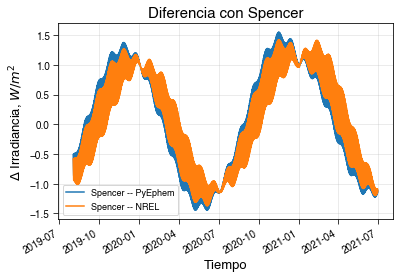

In [29]:
etr_dif_se = etr_spencer - etr_ephem
etr_dif_sn = etr_spencer - etr_nrel

etr_dif_se.plot(label='Spencer -- PyEphem')
etr_dif_sn.plot(label='Spencer -- NREL')

plot_specs(title='Diferencia con Spencer',
           ylabel='$\Delta$ Irradiancia, $W/m^2$',
           xlabel='Tiempo',
           rot=30, 
           ylim_min=None, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

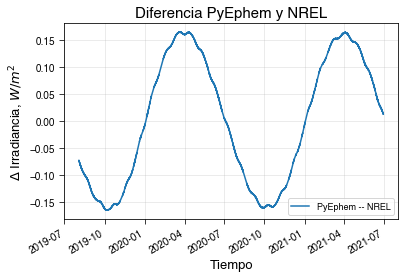

In [30]:
etr_dif_en = etr_ephem - etr_nrel

etr_dif_en.plot(label='PyEphem -- NREL')

plot_specs(title='Diferencia PyEphem y NREL',
           ylabel='$\Delta$ Irradiancia, $W/m^2$',
           xlabel='Tiempo',
           rot=30, 
           ylim_min=None, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

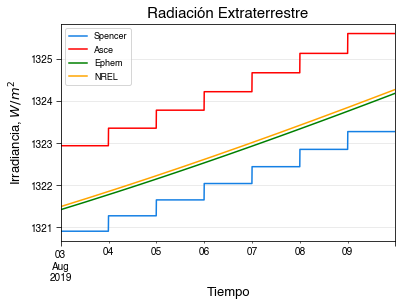

In [31]:
etr_spencer[a:b].plot(label='Spencer', color='#1580E4');
etr_asce[a:b].plot(label='Asce', color='red');
etr_ephem[a:b].plot(label='Ephem', color='green');
etr_nrel[a:b].plot(label='NREL', color='orange');

plot_specs(title='Radiación Extraterrestre',
           ylabel='Irradiancia, $W/m^2$',
           xlabel='Tiempo',
           rot=0, 
           ylim_min=None, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

### 5.4. Irradiancia POA

En la clase PVLIB Irradiance hay una variedad de modelos para obtener los datos de POA. Algunos de los modelos son: (i.) **Perez**, (ii.) **Hay-Davies 1980**, (iii.) **Klucher-1979**, (iv.) **Reindl-1990** y (v.) **King**.

**Info:** https://pvlib-python.readthedocs.io/en/stable/api.html#transposition-models.

##### 5.4.1. POA Cielo Difuso (Sky Diffuse)

In [32]:
surface_tilt = 10;
surface_azimuth = 180; #Fixed south oriented

skydiffuse_haydavies = irradiance.haydavies(surface_tilt=surface_tilt, 
                                            surface_azimuth=surface_azimuth, 
                                            dhi=erbs.dhi, 
                                            dni=erbs.dni, 
                                            dni_extra=etr_nrel, 
                                            solar_zenith=solpos.zenith, 
                                            solar_azimuth=solpos.azimuth)

skydiffuse_haydavies.head()

Datetime
2019-08-03 00:00:00-05:00    0.0
2019-08-03 00:05:00-05:00    0.0
2019-08-03 00:10:00-05:00    0.0
2019-08-03 00:15:00-05:00    0.0
2019-08-03 00:20:00-05:00    0.0
dtype: float64

In [33]:
skydiffuse_perez = irradiance.perez(surface_tilt=surface_tilt, 
                                    surface_azimuth=surface_azimuth, 
                                    dhi=erbs.dhi, 
                                    dni=erbs.dni, 
                                    dni_extra=etr_nrel, 
                                    solar_zenith=solpos.zenith, 
                                    solar_azimuth=solpos.azimuth, 
                                    airmass=airmass.airmass_relative, 
                                    model='allsitescomposite1990')

skydiffuse_perez.head()

Datetime
2019-08-03 00:00:00-05:00    0.0
2019-08-03 00:05:00-05:00    0.0
2019-08-03 00:10:00-05:00    0.0
2019-08-03 00:15:00-05:00    0.0
2019-08-03 00:20:00-05:00    0.0
dtype: float64

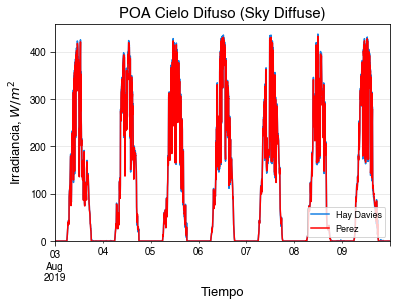

In [34]:
skydiffuse_haydavies[a:b].plot(label='Hay Davies', color='#1580E4');
skydiffuse_perez[a:b].plot(label='Perez', color='red');

plot_specs(title='POA Cielo Difuso (Sky Diffuse)',
           ylabel='Irradiancia, $W/m^2$',
           xlabel='Tiempo',
           rot=0, 
           ylim_min=0, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='lower right')

##### 5.4.2. POA Suelo Difuso (Ground Diffuse)

De acuerdo con Holmgren (2018), se espera una máxima irradiancia difusa del suelo cuanto tilt = 90º, y equivalente a cero cuando tilt = 0º [4].

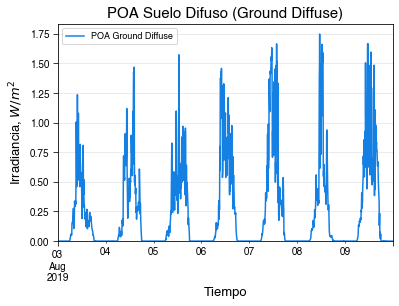

In [35]:
surface_albedo = irradiance.SURFACE_ALBEDOS['urban']; # Check the surfaces albedo list with print(irradiance.SURFACE_ALBEDOS.items()) function

grounddiffuse = irradiance.get_ground_diffuse(surface_tilt=surface_tilt, 
                                              ghi=meteocontrolDB.ghi, 
                                              albedo=surface_albedo,
                                              surface_type='urban')

grounddiffuse[a:b].plot(label='POA Ground Diffuse', color='#1580E4');

plot_specs(title='POA Suelo Difuso (Ground Diffuse)',
           ylabel='Irradiancia, $W/m^2$',
           xlabel='Tiempo',
           rot=0, 
           ylim_min=0, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

##### 5.4.3. POA Total

Determine los componentes de irradiancia en el plano. Combina el DNI con la irradiancia difusa del cielo y reflejada en el suelo para calcular los componentes de la irradiancia total, directa y difusa **<ins>en</ins>** el plano de la matriz.

**Info:** (i.) https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.irradiance.poa_components.html and (ii.) https://pvpmc.sandia.gov/modeling-steps/1-weather-design-inputs/plane-of-array-poa-irradiance/.

Un extracto de la segunda página recortada anteriormente deja en claro que se puede medir el plano de irradiancia de la matriz directamente con un piranómetro, celda de referencia o módulo de referencia montado en la misma orientación de la matriz. **<ins>Sin embargo</ins>**, el analista debe comprender las diferentes características de estos sensores para asegurarse de que cualquier corrección posterior realizada a la irradiancia de POA medida sea apropiada. Por ejemplo, una celda o módulo de referencia coincidente probablemente tenga las mismas propiedades reflectantes de los módulos en la matriz, por lo que las pérdidas reflectantes se incluyen inherentemente en el valor medido y no deben *'corregirse'* de nuevo.

**Info POA:** https://www.campbellsci.cc/blog/albedo-resource-assessment.

In [36]:
aoi = irradiance.aoi(surface_tilt=surface_tilt, 
                     surface_azimuth=surface_azimuth, 
                     solar_zenith=solpos.zenith, 
                     solar_azimuth=solpos.azimuth)

poa_haydavies = irradiance.poa_components(aoi=aoi, 
                                          dni=erbs.dni, 
                                          poa_sky_diffuse=skydiffuse_haydavies, 
                                          poa_ground_diffuse=grounddiffuse)

poa_perez = irradiance.poa_components(aoi=aoi, 
                                      dni=erbs.dni, 
                                      poa_sky_diffuse=skydiffuse_perez, 
                                      poa_ground_diffuse=grounddiffuse)

poa_haydavies.head()

poa_global  poa_direct  poa_diffuse  \
Datetime                                                         
2019-08-03 00:00:00-05:00         0.0        -0.0          0.0   
2019-08-03 00:05:00-05:00         0.0        -0.0          0.0   
2019-08-03 00:10:00-05:00         0.0        -0.0          0.0   
2019-08-03 00:15:00-05:00         0.0        -0.0          0.0   
2019-08-03 00:20:00-05:00         0.0        -0.0          0.0   

                           poa_sky_diffuse  poa_ground_diffuse  
Datetime                                                        
2019-08-03 00:00:00-05:00              0.0                 0.0  
2019-08-03 00:05:00-05:00              0.0                 0.0  
2019-08-03 00:10:00-05:00              0.0                 0.0  
2019-08-03 00:15:00-05:00              0.0                 0.0  
2019-08-03 00:20:00-05:00              0.0                 0.0

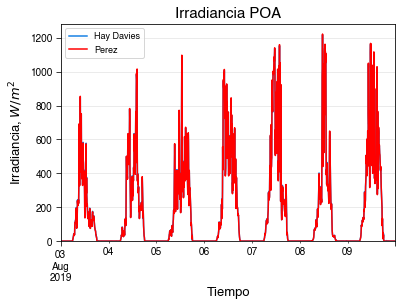

In [37]:
poa_haydavies['poa_global'][a:b].plot(label='Hay Davies', color='#1580E4');
poa_perez['poa_global'][a:b].plot(label='Perez', color='red');

plot_specs(title='Irradiancia POA',
           ylabel='Irradiancia, $W/m^2$',
           xlabel='Tiempo',
           rot=0, 
           ylim_min=0, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='upper left')

##### 5.4.4. POA Total con función Get_Total_Irradiance (gti)

In [38]:
poa_gti_perez = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                                surface_azimuth=surface_azimuth, 
                                                solar_zenith=solpos.zenith, 
                                                solar_azimuth=solpos.azimuth, 
                                                dni=erbs.dni, 
                                                ghi=meteocontrolDB.ghi, 
                                                dhi=erbs.dhi, 
                                                dni_extra=etr_nrel, 
                                                airmass=airmass.airmass_relative, 
                                                albedo=surface_albedo, 
                                                surface_type='urban', 
                                                model='perez', 
                                                model_perez='allsitescomposite1990')

poa_gti_perez.head()

poa_global  poa_direct  poa_diffuse  \
Datetime                                                         
2019-08-03 00:00:00-05:00         0.0        -0.0          0.0   
2019-08-03 00:05:00-05:00         0.0        -0.0          0.0   
2019-08-03 00:10:00-05:00         0.0        -0.0          0.0   
2019-08-03 00:15:00-05:00         0.0        -0.0          0.0   
2019-08-03 00:20:00-05:00         0.0        -0.0          0.0   

                           poa_sky_diffuse  poa_ground_diffuse  
Datetime                                                        
2019-08-03 00:00:00-05:00              0.0                 0.0  
2019-08-03 00:05:00-05:00              0.0                 0.0  
2019-08-03 00:10:00-05:00              0.0                 0.0  
2019-08-03 00:15:00-05:00              0.0                 0.0  
2019-08-03 00:20:00-05:00              0.0                 0.0

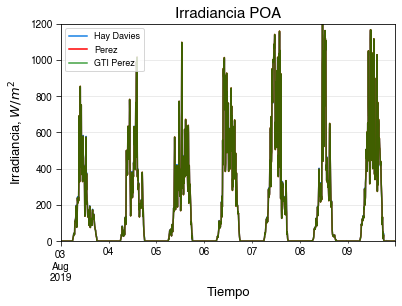

In [39]:
poa_haydavies['poa_global'][a:b].plot(label='Hay Davies', color='#1580E4');
poa_perez['poa_global'][a:b].plot(label='Perez', color='red');
poa_gti_perez['poa_global'][a:b].plot(label='GTI Perez', color='green', alpha=0.75);

plot_specs(title='Irradiancia POA',
           ylabel='Irradiancia, $W/m^2$',
           xlabel='Tiempo',
           rot=0, 
           ylim_min=0, ylim_max=1200, 
           xlim_min=None, xlim_max=None, 
           loc='upper left')

##### <span style='color:CadetBlue'>5.4.5. POA Control de Calidad de Datos </span> <span style='color:White'>code:3</span>

Se emplea el control de calidad de datos enunciado por Toledo et al. (2020), el cual sigue las recomendaciones propuestas por Long y Dutton para el *Baseline Surface Radiation Network (BSRN)* para detectar cambios relevantes en la radiación en la superficie terrestre que pueden estar relacionados con los cambios climáticos [6].

El procedimiento consta de tres comprobaciones de prueba (en este caso se realizan las dos primeras) para asegurar que los datos estén dentro de los límites establecidos y así garantizar datos confiables. Los datos que fallan en alguna de las pruebas se descartan para los cálculos [6].

**TEST 1: *Physically possible limits*** <br>

> $-4 \: W/m^2 < G_h < G_e \cdot 1.50 \cdot cos(\theta_z)^{1.2} + 100 W/m^2$

> $-4 \: W/m^2 < D_h < G_e \cdot 0.95 \cdot cos(\theta_z)^{1.2} + 50 W/m^2$

> $-4 \: W/m^2 < B_h < G_e$ 


**TEST 2: *Extremely rare limits*** <br>

> $-2 \: W/m^2 < G_h < G_e \cdot 1.20 \cdot cos(\theta_z)^{1.2} + 50 W/m^2$

> $-2 \: W/m^2 < D_h < G_e \cdot 0.75 \cdot cos(\theta_z)^{1.2} + 30 W/m^2$

> $-2 \: W/m^2 < B_h < G_e \cdot 0.95 \cdot cos(\theta_z)^{1.2} + 10 W/m^2$

---

[6] C. Toledo, A. Gracia-Amillo, G. Bardizza, J. Abad and A. Urbina (2020). Evaluation of Solar Radiation Transposition Models for Passive Energy Management and Building Integrated Photovoltaics. Energies. 13. 702. doi: 10.3390/en13030702.

---

In [40]:
dqc = pd.DataFrame({'ghi': meteocontrolDB.ghi, 
                    'dni': erbs.dni,
                    'dhi': erbs.dhi})

dqc = dqc.set_index(meteocontrolDB.index)
dqc.head()

ghi  dni  dhi
Datetime                                
2019-08-03 00:00:00-05:00  0.0  0.0  0.0
2019-08-03 00:05:00-05:00  0.0  0.0  0.0
2019-08-03 00:10:00-05:00  0.0  0.0  0.0
2019-08-03 00:15:00-05:00  0.0  0.0  0.0
2019-08-03 00:20:00-05:00  0.0  0.0  0.0

In [41]:
#Physically possible limits
dqc_ghi = []
dqc_dhi = []
dqc_dni = []

for i in range(len(dqc)):
    Gh = dqc['ghi'][i]
    Dh = dqc['dhi'][i]
    Bh = dqc['dni'][i]
 
    #Global Horizontal
    if (-4 < Gh or Gh < etr_nrel[i]*1.5*(np.cos(np.radians(solpos.zenith[i]))**1.2)+100):
        dqc_ghi.append(Gh)
    else:
        dqc_ghi.append(float('NaN'))
    
    #Diffuse
    if (-4 < Dh or Dh < etr_nrel[i]*0.95*(np.cos(np.radians(solpos.zenith[i]))**1.2)+50):
        dqc_dhi.append(Dh)
    else:
        dqc_dhi.append(float('NaN')) 
    
    #Beam or Direct Normal
    if (-4 < Bh or Bh < etr_nrel[i]):
        dqc_dni.append(Bh)
    else:
        dqc_dni.append(float('NaN'))
        
dqc_corr = pd.DataFrame({'ghi': dqc_ghi, 
                         'dni': dqc_dni,
                         'dhi': dqc_dhi})

dqc_corr = dqc_corr.set_index(meteocontrolDB.index)
dqc_corr.head()

ghi  dni  dhi
Datetime                                
2019-08-03 00:00:00-05:00  0.0  0.0  0.0
2019-08-03 00:05:00-05:00  0.0  0.0  0.0
2019-08-03 00:10:00-05:00  0.0  0.0  0.0
2019-08-03 00:15:00-05:00  0.0  0.0  0.0
2019-08-03 00:20:00-05:00  0.0  0.0  0.0

In [42]:
dqc_corr.isna().sum()

ghi    0
dni    0
dhi    0
dtype: int64

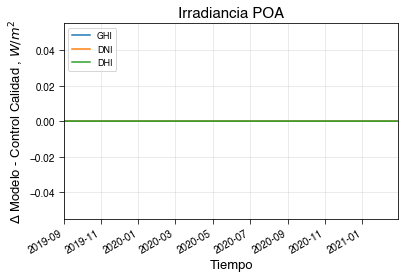

In [43]:
ghi_dif = dqc['ghi'] - dqc_corr['ghi']
dni_dif = dqc['dni'] - dqc_corr['dni']
dhi_dif = dqc['dhi'] - dqc_corr['dhi']

ghi_dif.plot(label='GHI')
dni_dif.plot(label='DNI')
dhi_dif.plot(label='DHI')

plot_specs(title='Irradiancia POA',
           ylabel='$\Delta$ Modelo - Control Calidad , $W/m^2$',
           xlabel='Tiempo',
           rot=30, 
           ylim_min=None, ylim_max=None, 
           xlim_min='2019-09', xlim_max='2021-03', 
           loc='upper left')

In [44]:
#Extremely rare limits
dqc_ghi = []
dqc_dhi = []
dqc_dni = []

for i in range(len(dqc)):
    Gh = dqc['ghi'][i]
    Dh = dqc['dhi'][i]
    Bh = dqc['dni'][i]
 
    #Global Horizontal
    if (-2 < Gh or Gh < etr_nrel[i]*1.20*(np.cos(np.radians(solpos.zenith[i]))**1.2)+50):
        dqc_ghi.append(Gh)
    else:
        dqc_ghi.append(float('NaN'))
    
    #Diffuse
    if (-2 < Dh or Dh < etr_nrel[i]*0.75*(np.cos(np.radians(solpos.zenith[i]))**1.2)+30):
        dqc_dhi.append(Dh)
    else:
        dqc_dhi.append(float('NaN')) 
    
    #Beam or Direct Normal
    if (-2 < Bh or Bh < etr_nrel[i]*0.95*(np.cos(np.radians(solpos.zenith[i]))**1.2)+10):
        dqc_dni.append(Bh)
    else:
        dqc_dni.append(float('NaN'))
        
dqc_corr = pd.DataFrame({'ghi': dqc_ghi, 
                         'dni': dqc_dni,
                         'dhi': dqc_dhi})

dqc_corr = dqc_corr.set_index(meteocontrolDB.index)
dqc_corr.head()

ghi  dni  dhi
Datetime                                
2019-08-03 00:00:00-05:00  0.0  0.0  0.0
2019-08-03 00:05:00-05:00  0.0  0.0  0.0
2019-08-03 00:10:00-05:00  0.0  0.0  0.0
2019-08-03 00:15:00-05:00  0.0  0.0  0.0
2019-08-03 00:20:00-05:00  0.0  0.0  0.0

In [45]:
dqc_corr.isna().sum()

ghi    0
dni    0
dhi    0
dtype: int64

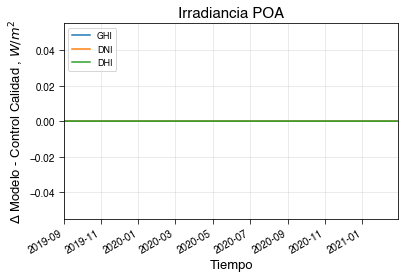

In [46]:
ghi_dif = dqc['ghi'] - dqc_corr['ghi']
dni_dif = dqc['dni'] - dqc_corr['dni']
dhi_dif = dqc['dhi'] - dqc_corr['dhi']

ghi_dif.plot(label='GHI')
dni_dif.plot(label='DNI')
dhi_dif.plot(label='DHI')

plot_specs(title='Irradiancia POA',
           ylabel='$\Delta$ Modelo - Control Calidad , $W/m^2$',
           xlabel='Tiempo',
           rot=30, 
           ylim_min=None, ylim_max=None, 
           xlim_min='2019-09', xlim_max='2021-03', 
           loc='upper left')

### 5.5. Comparación Modelado vs. Medido

##### 5.5.1. Hay Davies vs. Medido

In [47]:
'''
Shaded reference cell from Oct to Mar.
'''

start = '2020-04-01T00:00:00'
end = '2020-10-01T00:00:00'

'''
Métricas Estadísticas
'''
def median_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

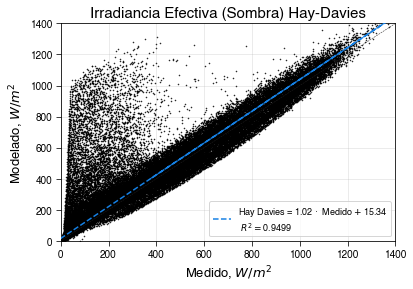

In [48]:
#Least Squares Linear Regression
x_value = meteocontrolDB.effective_irrad
y_value = poa_haydavies['poa_global']

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 1400

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept

plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=("Hay Davies = " + f"{slope.round(2)} $· \:$ Medido $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
               + f"{r_value.round(4)}"), color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title='Irradiancia Efectiva (Sombra) Hay-Davies',
           ylabel='Modelado, $W/m^2$',
           xlabel='Medido, $W/m^2$',
           rot=0, 
           ylim_min=0, ylim_max=axis_lim, 
           xlim_min=0, xlim_max=axis_lim, 
           loc='best')

R2:  0.9876
RMSE:  3.31
MAPE:  9.89


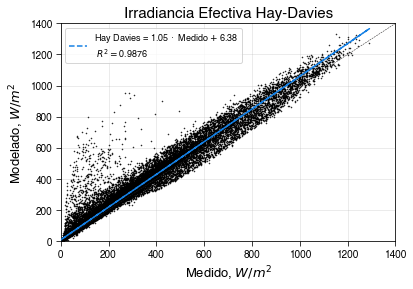

In [49]:
#Least Squares Linear Regression
x_value = meteocontrolDB.effective_irrad[start:end]
y_value = poa_haydavies['poa_global'][start:end]

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 1400

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept

plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=("Hay Davies = " + f"{slope.round(2)} $· \:$ Medido $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
               + f"{r_value.round(4)}"), color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title='Irradiancia Efectiva Hay-Davies',
           ylabel='Modelado, $W/m^2$',
           xlabel='Medido, $W/m^2$',
           rot=0, 
           ylim_min=0, ylim_max=axis_lim, 
           xlim_min=0, xlim_max=axis_lim, 
           loc='best')

#Métricas Estadísticas
print('R2: ', r_value.round(4))

metrics = pd.DataFrame({'effective_irrad': x_value, 
                        'poa_haydavies': y_value})

y_true = metrics.effective_irrad
y_pred = metrics.poa_haydavies

rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
rmse = (rmse/np.max(y_true))*100
print('RMSE: ', np.round(rmse, 2))

'''
MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
'''
metrics = metrics.loc[(metrics.index.hour >= 7) & (metrics.index.hour <= 17) & (metrics.effective_irrad != 0)]

y_true = metrics.effective_irrad
y_pred = metrics.poa_haydavies

mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
print('MAPE: ', np.round(mape, 2))

##### 5.5.2. GTI Perez vs. Medido

In [50]:
irrads = pd.DataFrame({'effective_irrad': meteocontrolDB.effective_irrad, 
                       'poa_global': poa_gti_perez['poa_global']})

irrads = irrads.dropna()

R2:  0.9875
RMSE:  3.32
MAPE:  8.89


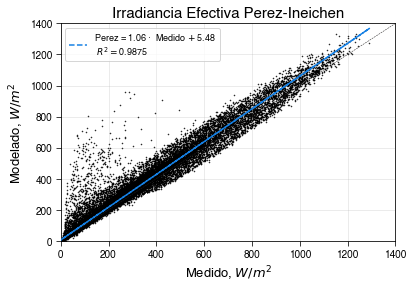

In [51]:
#Least Squares Linear Regression
x_value = irrads.effective_irrad[start:end]
y_value = irrads.poa_global[start:end]

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 1400

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept

plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=("Perez = " + f"{slope.round(2)} $· \:$ Medido $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
               + f"{r_value.round(4)}"), color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title='Irradiancia Efectiva Perez-Ineichen',
           ylabel='Modelado, $W/m^2$',
           xlabel='Medido, $W/m^2$',
           rot=0, 
           ylim_min=0, ylim_max=axis_lim, 
           xlim_min=0, xlim_max=axis_lim, 
           loc='best')

#Métricas Estadísticas
print('R2: ', r_value.round(4))

metrics = pd.DataFrame({'effective_irrad': x_value, 
                        'poa_perez': y_value})

y_true = metrics.effective_irrad
y_pred = metrics.poa_perez

rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
rmse = (rmse/np.max(y_true))*100
print('RMSE: ', np.round(rmse, 2))

'''
MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
'''
metrics = metrics.loc[(metrics.index.hour >= 7) & (metrics.index.hour <= 17) & (metrics.effective_irrad != 0)]

y_true = metrics.effective_irrad
y_pred = metrics.poa_perez

mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
print('MAPE: ', np.round(mape, 2))

##### 5.5.3. Hay Davies vs. GTI Perez

In [52]:
irrads = pd.DataFrame({'poa_haydavies': poa_haydavies['poa_global'], 
                       'poa_gti_perez': poa_gti_perez['poa_global']})

irrads.dropna(inplace=True)

irrads = irrads.drop(irrads[(irrads.poa_haydavies > 1) & (irrads.poa_gti_perez < 2)].index)

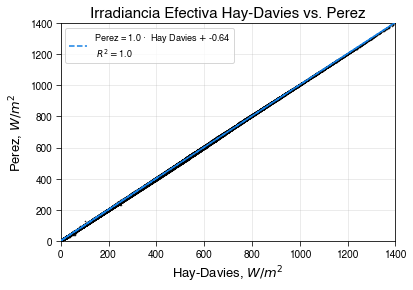

In [53]:
#Least Squares Linear Regression
x_value = irrads.poa_haydavies
y_value = irrads.poa_gti_perez

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 1400

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept

plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=("Perez = " + f"{slope.round(2)} $· \:$ Hay Davies $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
               + f"{r_value.round(4)}"), color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title='Irradiancia Efectiva Hay-Davies vs. Perez',
           ylabel='Perez, $W/m^2$',
           xlabel='Hay-Davies, $W/m^2$',
           rot=0, 
           ylim_min=0, ylim_max=axis_lim, 
           xlim_min=0, xlim_max=axis_lim, 
           loc='best')

### <span style='color:CadetBlue'>5.6. Comparación Otros Modelos Transposición vs. Medido </span> <span style='color:White'>code:4</span>

In [54]:
#Isotropic
poa_isotropic = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                                surface_azimuth=surface_azimuth, 
                                                solar_zenith=solpos.zenith, 
                                                solar_azimuth=solpos.azimuth, 
                                                dni=erbs.dni, 
                                                ghi=meteocontrolDB.ghi, 
                                                dhi=erbs.dhi, 
                                                dni_extra=etr_nrel, 
                                                airmass=airmass.airmass_relative, 
                                                albedo=surface_albedo, 
                                                surface_type='urban', 
                                                model='isotropic')

#Klucher
poa_klucher = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                              surface_azimuth=surface_azimuth, 
                                              solar_zenith=solpos.zenith, 
                                              solar_azimuth=solpos.azimuth, 
                                              dni=erbs.dni, 
                                              ghi=meteocontrolDB.ghi, 
                                              dhi=erbs.dhi, 
                                              dni_extra=etr_nrel, 
                                              airmass=airmass.airmass_relative, 
                                              albedo=surface_albedo, 
                                              surface_type='urban', 
                                              model='klucher')

#Reindl
poa_reindl = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                             surface_azimuth=surface_azimuth, 
                                             solar_zenith=solpos.zenith, 
                                             solar_azimuth=solpos.azimuth, 
                                             dni=erbs.dni, 
                                             ghi=meteocontrolDB.ghi, 
                                             dhi=erbs.dhi, 
                                             dni_extra=etr_nrel, 
                                             airmass=airmass.airmass_relative, 
                                             albedo=surface_albedo, 
                                             surface_type='urban', 
                                             model='reindl')

#King
poa_king = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                           surface_azimuth=surface_azimuth, 
                                           solar_zenith=solpos.zenith, 
                                           solar_azimuth=solpos.azimuth, 
                                           dni=erbs.dni, 
                                           ghi=meteocontrolDB.ghi, 
                                           dhi=erbs.dhi, 
                                           dni_extra=etr_nrel, 
                                           airmass=airmass.airmass_relative, 
                                           albedo=surface_albedo, 
                                           surface_type='urban', 
                                           model='king')

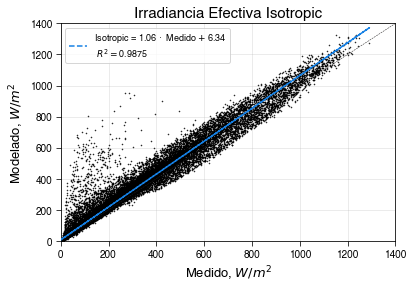

ISOTROPIC
R2:  0.9875
RMSE:  3.38
MAPE:  10.0




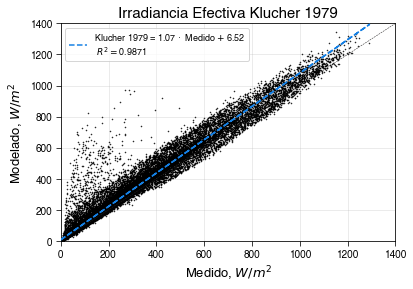

KLUCHER 1979
R2:  0.9871
RMSE:  3.62
MAPE:  10.54




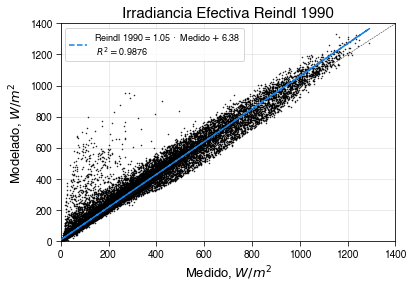

REINDL 1990
R2:  0.9876
RMSE:  3.31
MAPE:  9.91




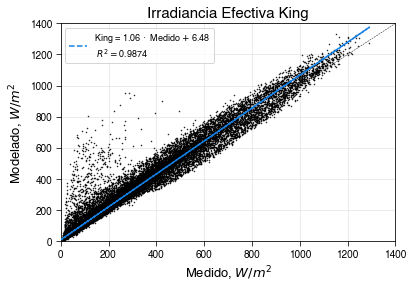

KING
R2:  0.9874
RMSE:  3.41
MAPE:  10.23




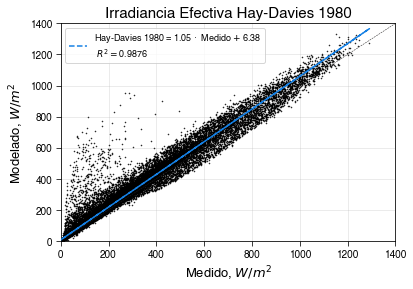

HAY-DAVIES 1980
R2:  0.9876
RMSE:  3.31
MAPE:  9.89




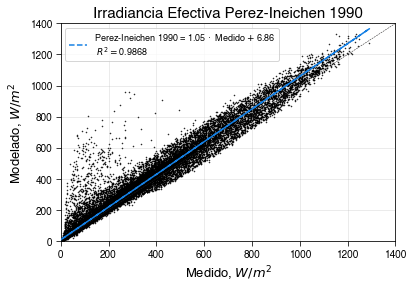

PEREZ-INEICHEN 1990
R2:  0.9868
RMSE:  3.54
MAPE:  8.85




In [55]:
list_r2 = []
list_rmse = []
list_mape = []

other_models = ['isotropic', 'klucher', 'reindl', 'king', 'haydavies', 'perez']

for i in other_models:

    if i == 'isotropic':
        y_value = poa_isotropic['poa_global'][start:end]
        title_name = 'Isotropic'
    
    elif i == 'klucher':
        y_value = poa_klucher['poa_global'][start:end]
        title_name = 'Klucher 1979'
        
    elif i == 'reindl':
        y_value = poa_reindl['poa_global'][start:end]
        title_name = 'Reindl 1990'
        
    elif i == 'king':
        y_value = poa_king['poa_global'][start:end]
        title_name = 'King'
        
    elif i == 'haydavies':
        y_value = poa_haydavies['poa_global'][start:end]
        title_name = 'Hay-Davies 1980'
    
    else:
        y_value = poa_gti_perez['poa_global'][start:end]
        title_name = 'Perez-Ineichen 1990'
    
    #Measured and modeled POA dataframe
    irrads = pd.DataFrame({'effective_irrad': meteocontrolDB.effective_irrad[start:end], 
                           'poa_global': y_value})

    irrads = irrads.dropna()
    
    if i == 'perez':
        irrads = irrads.drop(irrads[(irrads.effective_irrad > 1) & (irrads.poa_global < 2)].index) #Perez Data Filter
    
    #Least Squares Linear Regression
    x_value = irrads.effective_irrad
    y_value = irrads.poa_global

    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 1400

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.figure()
    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=(f"{title_name} = " + f"{slope.round(2)} $· \:$ Medido $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Irradiancia Efectiva {title_name}',
              ylabel='Modelado, $W/m^2$',
              xlabel='Medido, $W/m^2$',
              rot=0, 
              ylim_min=0, ylim_max=axis_lim, 
              xlim_min=0, xlim_max=axis_lim, 
              loc='best')
    plt.show()
    
    #Metrics
    print(title_name.upper())
    print('R2: ', r_value.round(4))

    metrics = pd.DataFrame({'effective_irrad': x_value, 
                            'poa': y_value})

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    metrics = metrics.loc[(metrics.index.hour >= 7) & (metrics.index.hour <= 17) & (metrics.effective_irrad != 0)]

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print('MAPE: ', np.round(mape, 2))
    print('\n')
    
    list_r2.append(r_value)
    list_rmse.append(rmse)
    list_mape.append(mape)
    
list_r2 = [x * 100 for x in list_r2]

### <span style='color:CadetBlue'>5.7. Métricas Estadísticas Modelos Transposición </span> <span style='color:White'>code:5</span>

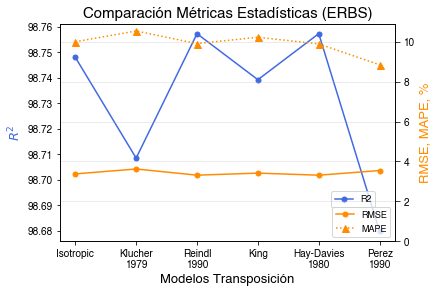

In [56]:
full_models = ['Isotropic', 'Klucher\n1979', 'Reindl\n1990', 'King', 'Hay-Davies\n1980', 'Perez\n1990']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(full_models, list_r2, color='royalblue', ls='-', marker='o', ms=5, label='R2')
ax2.plot(full_models, list_rmse, color='darkorange', ls='-', marker='o', ms=5, label='RMSE')
ax2.plot(full_models, list_mape, color='darkorange', ls='dotted', marker='^', ms=7, label='MAPE')

ax1.set_xlabel('Modelos Transposición', fontname="Helvetica", fontsize=13)
ax1.set_ylabel('$R^2$', fontname="Helvetica", fontsize=13, color='royalblue')
ax2.set_ylabel('RMSE, MAPE', fontname="Helvetica", fontsize=13, color='darkorange')

plt.rc('font', family='Helvetica')
plt.rcParams['axes.axisbelow'] = True;

plt.title('Comparación Métricas Estadísticas (ERBS)', fontname="Helvetica", fontsize=15);
plt.ylabel('RMSE, MAPE, %', fontname="Helvetica", fontsize=13);
#plt.xlabel('Medido, $W/m^2$', fontname="Helvetica", fontsize=13);

plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.xlim(None, None)
plt.ylim(0, None)
plt.grid(True);
plt.legend(loc='lower right', fontsize=9);
ax1.legend(loc=(0.81, 0.155), fontsize=9);
plt.tight_layout;

### <span style='color:CadetBlue'>5.8. Simulación de Producción Planta FV</span> <span style='color:White'>code:6</span>

<img src='Figs/pvlib_snl.png' width='500' height='500' />

**Criterios de Selección** 
> - Comparación de resultados de desempeño.
> - Capacidad para modificar, personalizar y actualizar algoritmos.
> - Integración automática en flujos de trabajo externos.
> - Resultados intermedios y análisis estadísticos sobre la marcha.

**¿Por qué PVlib-Python de Sandia National Laboratories?**
> - Precisión y el rigor técnico de los modelos (IEC 61724-1).
> - Librería open-source referente de investigación.
> - Estudio detallado de componentes del sistema.

#### 5.8.1. Producción DC: Voltaje, Corriente y Potencia

A partir de la función ````pvsystem.calcparams_cec```` se obtienen los parámetros del circuito equivalente que modelan a *Curva I-V* para estimar los parámetros DC en los puntos MPP.

La temperatura del módulo que se utilizará en la función ````pvsystem.calcparams_cec```` es la medida. Por otra parte, la irradiancia que se utilizará en la función ````pvsystem.calcparams_cec```` es la obtenida por:
1. Descomposición Erbs.
2. Transposición Hay Davies.

El modelo Hay-Davies se elige por su mejor desempeño en métricas como $~R^2$, $RMSE~$ y $~MAPE$.

> Lave et al. (2014), en el documento **Evaluation of Irradiance Decomposition and Transposition Models at Locations Across the United States**, reporta una diferencia sistemática ---dependiendo de la ubicación--- en el *Mean Bias Difference* (MBD) de $-1 \%$ para Hay Davies y $+1 \%$ para Perez (pp. 15).

> PVsyst v5 utiliza el modelo Hay Davies pues es menos complejo que Perez y su error medio (MBE) es levemente mayor ---i.e. 2.2% frente a 1.8%. Sin embargo, trabajos recientes de Ineichen muestran que el modelo de Perez es ligeramente mejor en términos de RMSD ---en nuestro caso, Hay Davies es ligeramente mayor. No obstante, el modelo Perez generalmente da promedios energéticos anuales más altos que el modelo Hay Davies ---i.e. 0 a 2% dependiendo del clima y la orientación. PVsyst v6 utiliza el modelo Perez.

El inconveniente con el modelo King es que no no está bien documentado y no se ha publicado de ninguna manera a enero de 2012 (de acuerdo con la documentación de PVLIB en https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.irradiance.king.html#pvlib.irradiance.king).

[4] M. Lave, C. Hansen, A. Pohl and B. Hayes (2014). Evaluation of Irradiance Decomposition and Transposition Models at Locations Across the United States, SAND2014-15017PE, First Solar & Sandia National Laboratories. URL: https://www.osti.gov/servlets/purl/1569197.

[7] PVsyst (s.f.). Transposition model. [online]. Retrieved from: https://www.pvsyst.com/help/models_meteo_transposition.htm#:~:text=used%20%3E%20Irradiation%20models%20%3E-,Transposition%20model,from%20the%20horizontal%20irradiance%20data.&text=Perez%20model%2C%20is%20a%20more,Ineichen%20et%20al.

In [57]:
def dc_production(effective_irradiance, module_temperature):
    IL, I0, Rs, Rsh, nNsVth = pvsystem.calcparams_cec(effective_irradiance[start:end],
                                                      module_temperature[start:end],
                                                      module['alpha_sc'],
                                                      module['a_ref'],
                                                      module['I_L_ref'],
                                                      module['I_o_ref'],
                                                      module['R_sh_ref'],
                                                      module['R_s'],
                                                      Adjust=9.380614,
                                                      EgRef=1.121, #Retrieved from last link at above description
                                                      dEgdT=-0.0002677) #Retrieved from last link at above description

    curve_info = pvsystem.singlediode(photocurrent=IL,
                                      saturation_current=I0,
                                      resistance_series=Rs,
                                      resistance_shunt=Rsh,
                                      nNsVth=nNsVth,
                                      ivcurve_pnts=100,
                                      method='lambertw')

    # Scalating CEC et. al. Single Diode Results
    data_i_sc = pd.Series(curve_info['i_sc'])
    data_v_oc = pd.Series(curve_info['v_oc'])
    data_i_mp = pd.Series(curve_info['i_mp'])
    data_v_mp = pd.Series(curve_info['v_mp'])
    data_p_mp = pd.Series(curve_info['p_mp'])
    data_i_x = pd.Series(curve_info['i_x'])
    data_i_xx = pd.Series(curve_info['i_xx'])

    results_general = pd.DataFrame({'i_sc': data_i_sc, 
                                    'v_oc': data_v_oc,
                                    'i_mp': data_i_mp, 
                                    'v_mp': data_v_mp, 
                                    'p_mp': data_p_mp, 
                                    'i_x': data_i_x,
                                    'i_xx': data_i_xx})

    datetime_index = effective_irradiance[start:end].index

    sc_A = system_A.scale_voltage_current_power(results_general)
    sc_A = sc_A.set_index(datetime_index)

    sc_B = system_B.scale_voltage_current_power(results_general)
    sc_B = sc_B.set_index(datetime_index)
    
    return sc_A, sc_B

sc_A, sc_B = dc_production(effective_irradiance=poa_perez['poa_global'],
                           module_temperature=meteocontrolDB.module_temp)

#### <span style='color:CadetBlue'>5.8.2. Pérdidas</span> <span style='color:White'>code:7</span>

Se introduce un valor de pérdidas de **26.9%** sobre la producción DC que afectará la Potencia AC y Energía Diaria. El valor de 26.9% es el recomendado por el método de estimación de pérdidas de PVWatts y lo valida Marion et al. (2005).

[8] A.P. Dobos (2014). PVWatts Version 5 Manual, National Renewable Energy Lab.(NREL), US DOE Office of Energy Efficiency and Renewable Energy (EERE), doi: 10.2172/1158421.

[9] B. Marion, J. Adelstein, K. Boyle, H. Hayden, B. Hammond, T. Fletcher, B. Canada, D. Narang, A. Kimber, L. Mitchell, G. Rich and T. Townsend (2005). Performance parameters for grid-connected PV systems. Conference Record of the IEEE Photovoltaic Specialists Conference, pp. 1601–1606, doi: 10.1109/PVSC.2005.1488451.

In [58]:
def losses(sc_A, sc_B):

    losses = 26.9/100 #According to the paper Performance Parameters for Grid-Connected PV Systems by NREL

    #Losses System A
    sc_A['i_mp'] = sc_A['i_mp'] - sc_A['i_mp']*losses
    sc_A['p_mp'] = sc_A['p_mp'] - sc_A['p_mp']*losses

    #Losses System B
    sc_B['i_mp'] = sc_B['i_mp'] - sc_B['i_mp']*losses
    sc_B['p_mp'] = sc_B['p_mp'] - sc_B['p_mp']*losses
    
    return sc_A, sc_B

sc_A, sc_B = losses(sc_A=sc_A, sc_B=sc_B)

#### 5.8.3. Potencia AC

In [61]:
def ac_power(sc_A, sc_B):
    ACPow_A = pvlib.inverter.sandia(sc_A['v_mp'], sc_A['p_mp'], inverter_A)
    ACPow_B = pvlib.inverter.sandia(sc_B['v_mp'], sc_B['p_mp'], inverter_B)
    ACPow = ACPow_A + ACPow_B

    return ACPow

ACPow = ac_power(sc_A=sc_A, sc_B=sc_B)

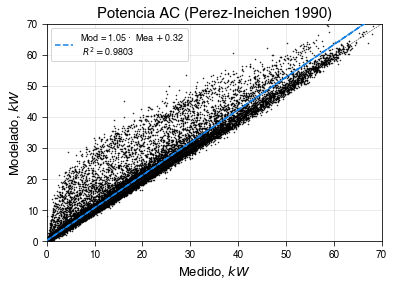

In [62]:
kilo = 1000
ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B

#Figure
plt.figure()

#Least Squares Linear Regression
x_value = ac[start:end]/kilo
y_value = ACPow/kilo

ac = pd.DataFrame({'measured': x_value, 
                   'modeled': y_value})

ac = ac.dropna()

x_value = ac.measured
y_value = ac.modeled

coef = np.polyfit(x_value, y_value, 1)
poly1d_fn = np.poly1d(coef)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

#Figure
axis_lim = 70

x = np.linspace(0, axis_lim, axis_lim)
y_reg = slope*x + intercept

plt.plot(x_value, 
         poly1d_fn(x_value), 
         '--k',
         label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
               + f"{r_value.round(4)}"), 
         color='#1580E4', linewidth=1.5, zorder = 10)

plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

y = x
plt.plot(x, y, '--', color='#222020', linewidth=0.5)

plot_specs(title='Potencia AC (Perez-Ineichen 1990)',
           ylabel='Modelado, $kW$',
           xlabel='Medido, $kW$',
           rot=0, 
           ylim_min=0, ylim_max=axis_lim, 
           xlim_min=0, xlim_max=axis_lim, 
           loc='best')

#### <span style='color:CadetBlue'>5.8.4. Energía Diaria</span> <span style='color:White'>code:8</span>

In [63]:
def energia(ACPow, res):
    ACPow = pd.DataFrame(ACPow)
    ACPow['AC Power'] = ACPow[0]
    del ACPow[0]

    ## Delete -1.0 AC Power Values
    fixCPow = []
    for data in ACPow['AC Power']:
        if data < 0:
            fixCPow.append(0)
        else:
            fixCPow.append(data)

    del ACPow['AC Power']
    ACPow['AC Power'] = fixCPow


    idx = np.linspace(1, len(ACPow), len(ACPow), dtype=int)
    idx = idx - 1
    ACPow['idx'] = idx

    res = res #Data resolution: 1h, i.e. 60 min.
    min_to_hour = res/60 #60 minutes equivalent to hour
    ACPow['Energy'] = ACPow['AC Power']*min_to_hour

    #Daily Energy
    daily_energy = []
    for index in ACPow['idx']:

        if index == 0:
            daily_energy.append(0)

        else:
            new_day = ACPow.iloc[index].name.day - ACPow.iloc[index-1].name.day

            if new_day != 0:
                daily_energy.append(0)
            else:
                value = ACPow['Energy'][index] + daily_energy[index-1]
                daily_energy.append(value)

    daily_energy = pd.DataFrame(daily_energy)
    daily_energy = daily_energy.set_index(ACPow.index)

    daily_energy['Daily Energy, kWh'] = daily_energy[0]
    del daily_energy[0]

    #Resampling Measured Daily Energy
    mea_energy = meteocontrolDB['energy_A'][start:end] + meteocontrolDB['energy_B'][start:end]

    mea_energy = pd.DataFrame(mea_energy, columns=['energy'])
    mea_energy = mea_energy.set_index(meteocontrolDB[start:end].index)

    mea_energy = mea_energy.resample('1d').max();
    mea_energy = mea_energy[:-1]
    
    month_mea_energy = mea_energy.resample('1m').sum();

    #Resampling Simulated Daily Energy
    sim_energy = pd.DataFrame(daily_energy['Daily Energy, kWh'])
    sim_energy['Daily Energy, kWh'] = sim_energy['Daily Energy, kWh']/kilo
    sim_energy = sim_energy.set_index(daily_energy.index)

    sim_energy = sim_energy.resample('1d').max();
    sim_energy = sim_energy[:-1]
    
    month_sim_energy = sim_energy.resample('1m').sum();
    #month_sim_energy = month_sim_energy[:-1]

    #Percentage Error
    energyerror = []
    #energyerror = round(month_mea_energy, 2)
    energyerror = month_mea_energy
    
    y_true = energyerror['energy'].values
    y_pred = month_sim_energy['Daily Energy, kWh'].values

    energyerror['perc_error'] = ((np.abs(y_pred - y_true)/y_pred)*100).round(2)
    energyerror['perc_error'] = energyerror['perc_error'].round(decimals=2) 
    
    
    return mea_energy, sim_energy, month_mea_energy, month_sim_energy, energyerror

mea_energy, sim_energy, month_mea_energy, month_sim_energy, energyerror = energia(ACPow=ACPow, res=5)

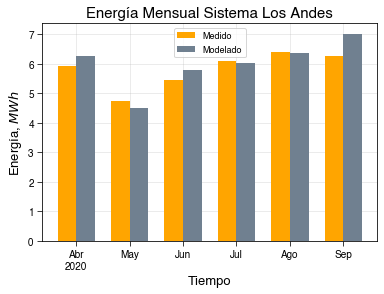

In [64]:
bar_width = 0.175;
width = bar_width*2;

int_months = ['Abr\n2020', 'May', 'Jun', 'Jul', 'Ago', 'Sep']

r1 = np.arange(len(int_months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

#Sistema Completo
plt.figure()

plt.bar(r1, month_mea_energy['energy'][0:6]/kilo, width, label='Medido', linewidth=2, color='orange')
plt.bar(r3, month_sim_energy['Daily Energy, kWh'][0:6]/kilo, width, label='Modelado', linewidth=2, color='slategrey')

plot_specs(title='Energía Mensual Sistema Los Andes',
           ylabel='Energía, $MWh$',
           xlabel='Tiempo',
           rot=0, 
           ylim_min=0, ylim_max=None, 
           xlim_min=None, xlim_max=None, 
           loc='best')

plt.xticks(r1 + width/2, int_months);

----------
SISTEMA COMPLETO
R2:  0.8323
RMSE:  3.75
MAPE:  4.62


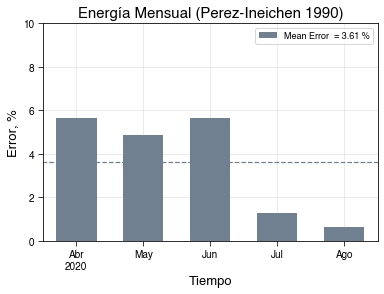

In [65]:
#Energy Error Comparison Plot
bar_width = 0.3;
width = bar_width*2;

months = ['Abr\n2020', 'May', 'Jun', 'Jul', 'Ago']

x = np.arange(len(months))

r1 = np.arange(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

#Mean Error Values
meanerror = round(energyerror['perc_error'][0:5].mean(), 2)

#Bar Plots
hor, ver = 13, 5
#plt.figure(figsize=(hor,ver))

plt.bar(r1, energyerror['perc_error'][0:5], width, 
        label='Mean Error  = ' + f'{meanerror}' + ' %', color='slategray', linewidth=2);

#Horizontal Lines
plt.hlines(y=0, xmin=-1, xmax=x[-1]+1, colors='black', linestyles='solid', linewidth=0.5) #Zero
plt.hlines(y=meanerror, xmin=-1, xmax=x[-1]+1, colors='slategray', linestyles='--', linewidth=1.25) #Full

plot_specs(title='Energía Mensual (Perez-Ineichen 1990)',
           ylabel='Error, %',
           xlabel='Tiempo',
           rot=0, 
           ylim_min=0, ylim_max=10, 
           xlim_min=-0.5, xlim_max=4.5, 
           loc='best')

plt.xticks(r1, months)

#METRICS
print('-'*10)
print('SISTEMA COMPLETO')
metrics = pd.DataFrame({'measured_energy': month_mea_energy['energy'][0:5].values, 
                        'modeled_energy': month_sim_energy['Daily Energy, kWh'][0:5].values})

y_true = metrics.measured_energy
y_pred = metrics.modeled_energy

r2 = r2_score(y_true=y_true, y_pred=y_pred)
print('R2: ', np.round(r2, 4))

rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
rmse = (rmse/np.max(y_true))*100
print('RMSE: ', np.round(rmse, 2))

'''
MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
'''
metrics = metrics.loc[metrics.measured_energy != 0]

y_true = metrics.measured_energy
y_pred = metrics.modeled_energy

mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
print('MAPE: ', np.round(mape, 2))

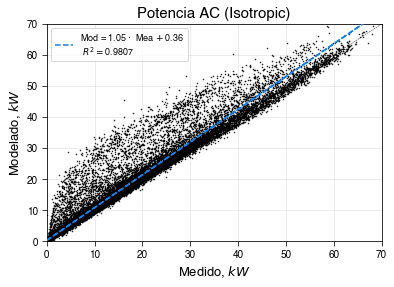

ISOTROPIC
R2:  0.9807
RMSE:  4.16
MAPE:  5.5




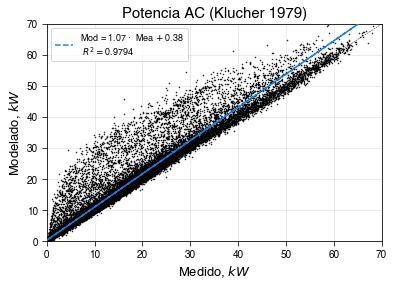

KLUCHER 1979
R2:  0.9794
RMSE:  4.47
MAPE:  6.36




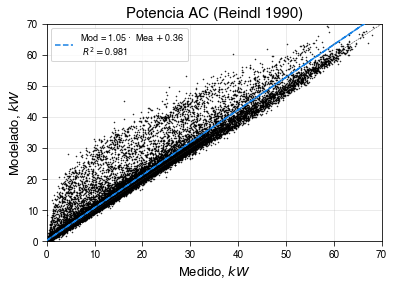

REINDL 1990
R2:  0.981
RMSE:  4.08
MAPE:  5.45




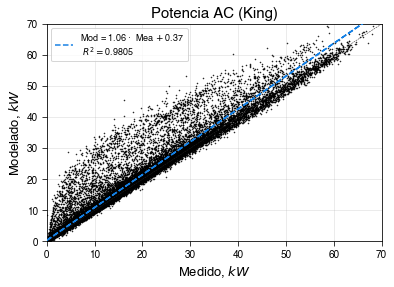

KING
R2:  0.9805
RMSE:  4.21
MAPE:  5.66




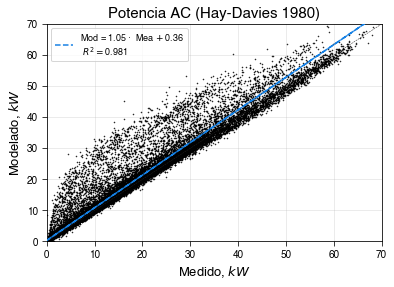

HAY-DAVIES 1980
R2:  0.981
RMSE:  4.08
MAPE:  5.44




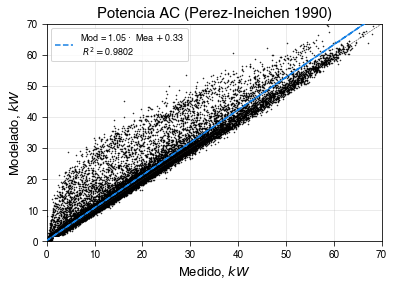

PEREZ-INEICHEN 1990
R2:  0.9802
RMSE:  4.18
MAPE:  5.01




In [66]:
measured_energy = pd.DataFrame()
simulated_energy = pd.DataFrame()
month_measured_energy = pd.DataFrame()
month_simulated_energy = pd.DataFrame()
energy_error = pd.DataFrame()

full_models = ['isotropic', 'klucher', 'reindl', 'king', 'haydavies', 'perez']

for i in full_models:

    if i == 'isotropic':
        y_value = poa_isotropic['poa_global']
        title_name = 'Isotropic'
    
    elif i == 'klucher':
        y_value = poa_klucher['poa_global']
        title_name = 'Klucher 1979'
        
    elif i == 'reindl':
        y_value = poa_reindl['poa_global']
        title_name = 'Reindl 1990'
        
    elif i == 'king':
        y_value = poa_king['poa_global']
        title_name = 'King'
        
    elif i == 'haydavies':
        y_value = poa_haydavies['poa_global']
        title_name = 'Hay-Davies 1980'
    
    else:
        y_value = poa_gti_perez['poa_global']
        title_name = 'Perez-Ineichen 1990'
    
    #DC Production
    sc_A, sc_B = dc_production(effective_irradiance=y_value,
                               module_temperature=meteocontrolDB.module_temp)
    
    #Losses
    sc_A, sc_B = losses(sc_A=sc_A, sc_B=sc_B)
    
    #AC Power
    ACPow = ac_power(sc_A=sc_A, sc_B=sc_B) #Simulated
    ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B #Measured
    
    #Figure
    plt.figure()

    #Least Squares Linear Regression
    x_value = ac[start:end]/kilo
    y_value = ACPow/kilo

    ac = pd.DataFrame({'measured': x_value, 
                       'modeled': y_value})

    ac = ac.dropna()

    #Perez Filter    
    if i == 'perez':
        ac = ac.drop(ac[(ac.measured > 1) & (ac.modeled < 2)].index) #Perez Data Filter
    
    x_value = ac.measured
    y_value = ac.modeled

    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 70

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), 
             color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Potencia AC ({title_name})',
               ylabel='Modelado, $kW$',
               xlabel='Medido, $kW$',
               rot=0, 
               ylim_min=0, ylim_max=axis_lim, 
               xlim_min=0, xlim_max=axis_lim, 
               loc='best')
    
    plt.show()
    
    mea_energy, sim_energy, month_mea_energy, month_sim_energy, energyerror = energia(ACPow=ACPow, res=5)
    
    measured_energy[i] = mea_energy['energy']
    simulated_energy[i] = sim_energy['Daily Energy, kWh']
    month_measured_energy[i] = month_mea_energy['energy']
    month_simulated_energy[i] = month_sim_energy['Daily Energy, kWh']
    energy_error[i] = energyerror['perc_error']
    
    #Metrics
    print(title_name.upper())
    print('R2: ', r_value.round(4))

    metrics = pd.DataFrame({'effective_irrad': x_value, 
                            'poa': y_value})

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    metrics = metrics.loc[(metrics.index.hour >= 7) & (metrics.index.hour <= 17) & (metrics.effective_irrad != 0)]

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print('MAPE: ', np.round(mape, 2))
    print('\n')
    
    list_r2.append(r_value)
    list_rmse.append(rmse)
    list_mape.append(mape)
    
list_r2 = [x * 100 for x in list_r2]

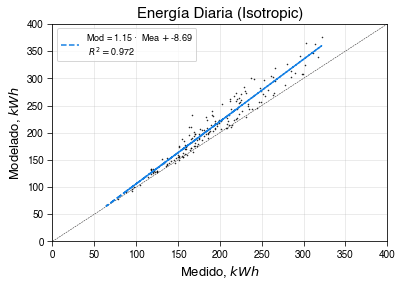

ISOTROPIC
R2:  0.972
RMSE:  7.81
MAPE:  8.0




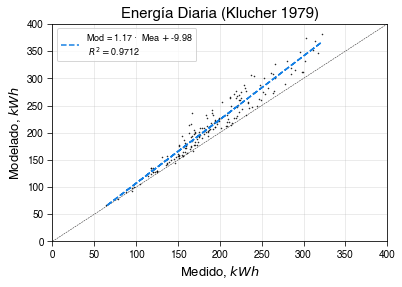

KLUCHER 1979
R2:  0.9712
RMSE:  8.83
MAPE:  9.87




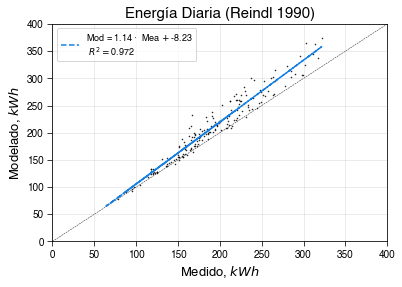

REINDL 1990
R2:  0.972
RMSE:  7.56
MAPE:  7.63




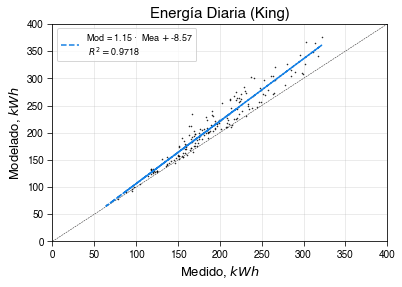

KING
R2:  0.9718
RMSE:  7.99
MAPE:  8.31




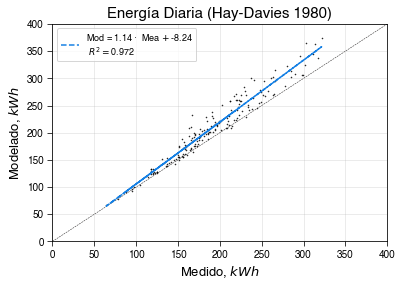

HAY-DAVIES 1980
R2:  0.972
RMSE:  7.55
MAPE:  7.61




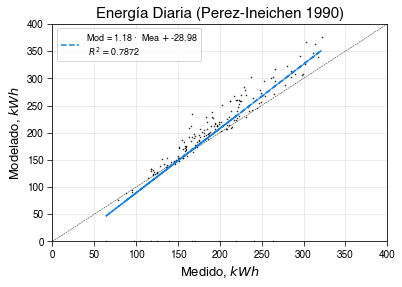

PEREZ-INEICHEN 1990
R2:  0.7872
RMSE:  15.31
MAPE:  8.08




In [67]:
for i in full_models:
    if i == 'isotropic':
        title_name = 'Isotropic'
    
    elif i == 'klucher':
        title_name = 'Klucher 1979'
        
    elif i == 'reindl':
        title_name = 'Reindl 1990'
        
    elif i == 'king':
        title_name = 'King'
        
    elif i == 'haydavies':
        title_name = 'Hay-Davies 1980'
    
    else:
        title_name = 'Perez-Ineichen 1990'
    
    #Figure
    plt.figure()

    #Least Squares Linear Regression
    x_value = measured_energy[i]
    y_value = simulated_energy[i]

    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 400

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), 
             color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Energía Diaria ({title_name})',
               ylabel='Modelado, $kWh$',
               xlabel='Medido, $kWh$',
               rot=0, 
               ylim_min=0, ylim_max=axis_lim, 
               xlim_min=0, xlim_max=axis_lim, 
               loc='best')
    
    plt.show()
    
    #Metrics
    print(title_name.upper())
    print('R2: ', r_value.round(4))

    metrics = pd.DataFrame({'effective_irrad': x_value, 
                            'poa': y_value})

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    metrics = metrics.loc[metrics.effective_irrad != 0]

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print('MAPE: ', np.round(mape, 2))
    print('\n')
    
    list_r2.append(r_value)
    list_rmse.append(rmse)
    list_mape.append(mape)
    
list_r2 = [x * 100 for x in list_r2]

#### <span style='color:CadetBlue'> 5.8.5. Energía Mensual</span> <span style='color:White'>code:8</span>

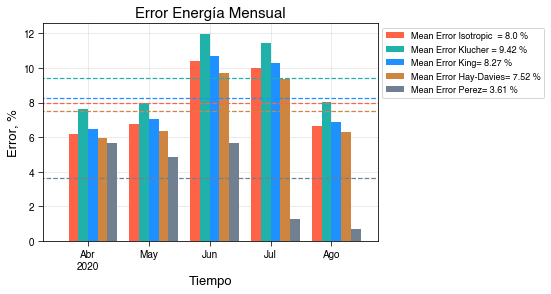

In [68]:
#Energy Error Comparison Plot
bar_width = 0.08;
width = bar_width*2;

months = ['Abr\n2020', 'May', 'Jun', 'Jul', 'Ago']

x = np.arange(len(months))

r1 = np.arange(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]
r7 = [x + bar_width for x in r6]
r8 = [x + bar_width for x in r7]
r9 = [x + bar_width for x in r8]
r10 = [x + bar_width for x in r9]
r511 = [x + bar_width for x in r10]

#Mean Error Values
meanerror_isotropic = round(energy_error['isotropic'][0:5].mean(), 2)
meanerror_klucher = round(energy_error['klucher'][0:5].mean(), 2)
meanerror_reindl = round(energy_error['reindl'][0:5].mean(), 2)
meanerror_king = round(energy_error['king'][0:5].mean(), 2)
meanerror_haydavies = round(energy_error['haydavies'][0:5].mean(), 2)
meanerror_perez = round(energy_error['perez'][0:5].mean(), 2)

#Bar Plots
hor, ver = 13, 5
#plt.figure(figsize=(hor,ver))

plt.bar(r1, energy_error['isotropic'][0:5], width, 
        label='Mean Error Isotropic  = ' + f'{meanerror_isotropic}' + ' %', color='tomato', linewidth=2);

plt.bar(r3, energy_error['klucher'][0:5], width, 
        label='Mean Error Klucher = ' + f'{meanerror_klucher}' + ' %', color='lightseagreen', linewidth=2);

plt.bar(r5, energy_error['king'][0:5], width, 
        label='Mean Error King= ' + f'{meanerror_king}' + ' %', color='dodgerblue', linewidth=2);

plt.bar(r7, energy_error['haydavies'][0:5], width, 
        label='Mean Error Hay-Davies= ' + f'{meanerror_haydavies}' + ' %', color='peru', linewidth=2);

plt.bar(r9, energy_error['perez'][0:5], width, 
        label='Mean Error Perez= ' + f'{meanerror_perez}' + ' %', color='slategray', linewidth=2);

#Horizontal Lines
plt.hlines(y=0, xmin=-1, xmax=x[-1]+1, colors='black', linestyles='solid', linewidth=0.5) #Zero
plt.hlines(y=meanerror_isotropic, xmin=-1, xmax=x[-1]+1, colors='tomato', linestyles='--', linewidth=1.25) #SysA
plt.hlines(y=meanerror_klucher, xmin=-1, xmax=x[-1]+1, colors='lightseagreen', linestyles='--', linewidth=1.25) #SysB
plt.hlines(y=meanerror_king, xmin=-1, xmax=x[-1]+1, colors='dodgerblue', linestyles='--', linewidth=1.25) #Full
plt.hlines(y=meanerror_haydavies, xmin=-1, xmax=x[-1]+1, colors='peru', linestyles='--', linewidth=1.25) #Full
plt.hlines(y=meanerror_perez, xmin=-1, xmax=x[-1]+1, colors='slategray', linestyles='--', linewidth=1.25) #Full

plt.xticks(r4, months)
plot_specs(title='Error Energía Mensual',
           ylabel='Error, %',
           xlabel='Tiempo',
           rot=0, 
           ylim_min=0, ylim_max=None, 
           xlim_min=-0.5, xlim_max=5, 
           loc='best')
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=9);

In [69]:
#BEST MODEL METRICS
print('ENERGÍA MENSUAL SISTEMA COMPLETO')

print('-'*10)
print(title_name)
metrics = pd.DataFrame({'measured_energy': month_measured_energy['perez'][0:5].values, 
                        'modeled_energy': month_simulated_energy['perez'][0:5].values})

y_true = metrics.measured_energy
y_pred = metrics.modeled_energy

r2 = r2_score(y_true=y_true, y_pred=y_pred)
print('R2: ', np.round(r2, 4))

rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
rmse = (rmse/np.max(y_true))*100
print('RMSE: ', np.round(rmse, 2))

'''
MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
'''
metrics = metrics.loc[metrics.measured_energy != 0]

y_true = metrics.measured_energy
y_pred = metrics.modeled_energy

mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
print('MAPE: ', np.round(mape, 2), '\n')

ENERGÍA MENSUAL SISTEMA COMPLETO
----------
Perez-Ineichen 1990
R2:  0.8323
RMSE:  3.75
MAPE:  4.62 



## 6. Modelos de Descomposición: DISC

### <span style='color:CadetBlue'>6.1. DISC</span> <span style='color:White'>code:9</span>

El algoritmo DISC convierte la GHI en DNI a través de relaciones empíricas entre GHI e índices de claridad $K_t$. 

De acuerdo con la documentación de PVlib, el texto original que describe el modelo DISC utiliza la masa de aire relativa en lugar de la masa de aire absoluta ---i.e. corregida por presión [8]. Sin embargo, la implementación NREL del modelo DISC usa masa de aire absoluta.

La estimación del parámetro DHI se realiza mediante la siguiente ecuación:

$$
DHI = GHI - DNI \cdot cos(\theta_z)
$$

Siendo $\theta_z$ el ángulo cenit (Ver sección 5.1. Erbs).

**Info:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.irradiance.disc.html#pvlib.irradiance.disc.

[9] Maxwell, E. L. (1987). A Quasi-Physical Model for Converting Hourly Global Horizontal to Direct Normal Insolation, Technical Report No. SERI/TR-215-3087, Golden, CO: Solar Energy Research Institute, 1987.

In [70]:
disc = pvlib.irradiance.disc(ghi=meteocontrolDB.ghi, 
                             solar_zenith=solpos.zenith, 
                             datetime_or_doy=meteocontrolDB.index, 
                             pressure=None, #Absolute Airmass: 101325, Relative Airmass: None 
                             min_cos_zenith=0.065, 
                             max_zenith=87, #80
                             max_airmass=12) #Max airmass value to allow in Kt calc; value 12 comes from original paper.

disc['dhi'] = meteocontrolDB.ghi - disc.dni*np.cos(np.radians(solpos.zenith))

disc.head()

dni   kt  airmass  dhi
Datetime                                         
2019-08-03 00:00:00-05:00  0.0  0.0      NaN  0.0
2019-08-03 00:05:00-05:00  0.0  0.0      NaN  0.0
2019-08-03 00:10:00-05:00  0.0  0.0      NaN  0.0
2019-08-03 00:15:00-05:00  0.0  0.0      NaN  0.0
2019-08-03 00:20:00-05:00  0.0  0.0      NaN  0.0

#### 6.1.1. Disc Corr

Se siguen las correcciones indicadas en la Sección 5.1.1 (Erbs Corr) para ajustar los valores de los parámetros  ```max_zenith``` y ```min_cos_zenith``` según los datos obtenidos de la posición del sol con ```location.get_solarposition```.

In [71]:
dni_corr = []
dhi_corr = []
kt_corr = []

for i in range(len(meteocontrolDB)):
    
    h = meteocontrolDB.index[i].hour
    d = meteocontrolDB.index[i].day
    m = meteocontrolDB.index[i].month
    y = meteocontrolDB.index[i].year
    
    if h <= 12:
        max_zenith = zenith_6h.loc[(zenith_6h.index.day == d) & (zenith_6h.index.month == m) & (zenith_6h.index.year == y)][0]
        max_zenith = 90 - max_zenith
    else:
        max_zenith = zenith_18h.loc[(zenith_18h.index.day == d) & (zenith_18h.index.month == m) & (zenith_18h.index.year == y)][0]
        max_zenith = 90 - max_zenith
    
    min_cos_zenith = np.cos(np.radians(max_zenith))
    
    disc_corr = irradiance.disc(ghi=meteocontrolDB.ghi[i], 
                                solar_zenith=solpos.zenith[i], 
                                datetime_or_doy=meteocontrolDB.index[i], 
                                pressure=None, #Absolute Airmass: 101325, Relative Airmass: None 
                                min_cos_zenith=min_cos_zenith, 
                                max_zenith=max_zenith, #80
                                max_airmass=12)
    
    dni_corr.append(list(disc_corr.values())[0].item())
    dhi_corr.append(list(disc_corr.values())[1].item())
    kt_corr.append(list(disc_corr.values())[2].item())

disc_corr = pd.DataFrame({'dni': dni_corr,
                          'dhi': dhi_corr,
                          'kt': kt_corr})

disc_corr = disc_corr.set_index(disc.index)

disc_corr.head()

dni  dhi  kt
Datetime                               
2019-08-03 00:00:00-05:00  0.0  0.0 NaN
2019-08-03 00:05:00-05:00  0.0  0.0 NaN
2019-08-03 00:10:00-05:00  0.0  0.0 NaN
2019-08-03 00:15:00-05:00  0.0  0.0 NaN
2019-08-03 00:20:00-05:00  0.0  0.0 NaN

### 6.2. Irradiancia POA (Todos los Modelos Transposición)

In [72]:
#Isotropic
poa_isotropic = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                                surface_azimuth=surface_azimuth, 
                                                solar_zenith=solpos.zenith, 
                                                solar_azimuth=solpos.azimuth, 
                                                dni=disc.dni, 
                                                ghi=meteocontrolDB.ghi, 
                                                dhi=disc.dhi, 
                                                dni_extra=etr_nrel, 
                                                airmass=airmass.airmass_relative, 
                                                albedo=surface_albedo, 
                                                surface_type='urban', 
                                                model='isotropic')

#Klucher
poa_klucher = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                              surface_azimuth=surface_azimuth, 
                                              solar_zenith=solpos.zenith, 
                                              solar_azimuth=solpos.azimuth, 
                                              dni=disc.dni, 
                                              ghi=meteocontrolDB.ghi, 
                                              dhi=disc.dhi, 
                                              dni_extra=etr_nrel, 
                                              airmass=airmass.airmass_relative, 
                                              albedo=surface_albedo, 
                                              surface_type='urban', 
                                              model='klucher')

#Reindl
poa_reindl = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                             surface_azimuth=surface_azimuth, 
                                             solar_zenith=solpos.zenith, 
                                             solar_azimuth=solpos.azimuth, 
                                             dni=disc.dni, 
                                             ghi=meteocontrolDB.ghi, 
                                             dhi=disc.dhi, 
                                             dni_extra=etr_nrel, 
                                             airmass=airmass.airmass_relative, 
                                             albedo=surface_albedo, 
                                             surface_type='urban', 
                                             model='reindl')

#King
poa_king = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                           surface_azimuth=surface_azimuth, 
                                           solar_zenith=solpos.zenith, 
                                           solar_azimuth=solpos.azimuth, 
                                           dni=disc.dni, 
                                           ghi=meteocontrolDB.ghi, 
                                           dhi=disc.dhi, 
                                           dni_extra=etr_nrel, 
                                           airmass=airmass.airmass_relative, 
                                           albedo=surface_albedo, 
                                           surface_type='urban', 
                                           model='king')

#Hay-Davies
poa_haydavies = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                                surface_azimuth=surface_azimuth, 
                                                solar_zenith=solpos.zenith, 
                                                solar_azimuth=solpos.azimuth, 
                                                dni=disc.dni, 
                                                ghi=meteocontrolDB.ghi, 
                                                dhi=disc.dhi, 
                                                dni_extra=etr_nrel, 
                                                airmass=airmass.airmass_relative, 
                                                albedo=surface_albedo, 
                                                surface_type='urban', 
                                                model='haydavies')
#Perez
poa_perez = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                            surface_azimuth=surface_azimuth, 
                                            solar_zenith=solpos.zenith, 
                                            solar_azimuth=solpos.azimuth, 
                                            dni=disc.dni, 
                                            ghi=meteocontrolDB.ghi, 
                                            dhi=disc.dhi, 
                                            dni_extra=etr_nrel, 
                                            airmass=airmass.airmass_relative, 
                                            albedo=surface_albedo, 
                                            surface_type='urban', 
                                            model='perez', 
                                            model_perez='allsitescomposite1990')

### 6.3. Control de Calidad de Datos

In [73]:
dqc = pd.DataFrame({'ghi': meteocontrolDB.ghi, 
                    'dni': disc.dni,
                    'dhi': disc.dhi})

dqc = dqc.set_index(meteocontrolDB.index)
dqc.head()

ghi  dni  dhi
Datetime                                
2019-08-03 00:00:00-05:00  0.0  0.0  0.0
2019-08-03 00:05:00-05:00  0.0  0.0  0.0
2019-08-03 00:10:00-05:00  0.0  0.0  0.0
2019-08-03 00:15:00-05:00  0.0  0.0  0.0
2019-08-03 00:20:00-05:00  0.0  0.0  0.0

ghi    0
dni    0
dhi    0
dtype: int64


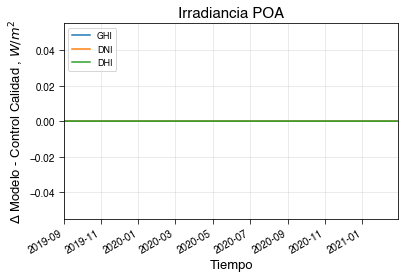

In [74]:
#Physically possible limits
dqc_ghi = []
dqc_dhi = []
dqc_dni = []

for i in range(len(dqc)):
    Gh = dqc['ghi'][i]
    Dh = dqc['dhi'][i]
    Bh = dqc['dni'][i]
 
    #Global Horizontal
    if (-4 < Gh or Gh < etr_nrel[i]*1.5*(np.cos(np.radians(solpos.zenith[i]))**1.2)+100):
        dqc_ghi.append(Gh)
    else:
        dqc_ghi.append(float('NaN'))
    
    #Diffuse
    if (-4 < Dh or Dh < etr_nrel[i]*0.95*(np.cos(np.radians(solpos.zenith[i]))**1.2)+50):
        dqc_dhi.append(Dh)
    else:
        dqc_dhi.append(float('NaN')) 
    
    #Beam or Direct Normal
    if (-4 < Bh or Bh < etr_nrel[i]):
        dqc_dni.append(Bh)
    else:
        dqc_dni.append(float('NaN'))
        
dqc_corr = pd.DataFrame({'ghi': dqc_ghi, 
                         'dni': dqc_dni,
                         'dhi': dqc_dhi})

dqc_corr = dqc_corr.set_index(meteocontrolDB.index)

ghi_dif = dqc['ghi'] - dqc_corr['ghi']
dni_dif = dqc['dni'] - dqc_corr['dni']
dhi_dif = dqc['dhi'] - dqc_corr['dhi']

ghi_dif.plot(label='GHI')
dni_dif.plot(label='DNI')
dhi_dif.plot(label='DHI')

plot_specs(title='Irradiancia POA',
           ylabel='$\Delta$ Modelo - Control Calidad , $W/m^2$',
           xlabel='Tiempo',
           rot=30, 
           ylim_min=None, ylim_max=None, 
           xlim_min='2019-09', xlim_max='2021-03', 
           loc='upper left')

print(dqc_corr.isna().sum())

ghi    0
dni    0
dhi    0
dtype: int64


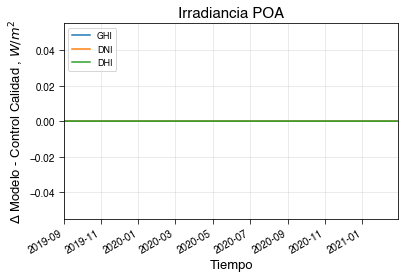

In [75]:
#Extremely rare limits
dqc_ghi = []
dqc_dhi = []
dqc_dni = []

for i in range(len(dqc)):
    Gh = dqc['ghi'][i]
    Dh = dqc['dhi'][i]
    Bh = dqc['dni'][i]
 
    #Global Horizontal
    if (-2 < Gh or Gh < etr_nrel[i]*1.20*(np.cos(np.radians(solpos.zenith[i]))**1.2)+50):
        dqc_ghi.append(Gh)
    else:
        dqc_ghi.append(float('NaN'))
    
    #Diffuse
    if (-2 < Dh or Dh < etr_nrel[i]*0.75*(np.cos(np.radians(solpos.zenith[i]))**1.2)+30):
        dqc_dhi.append(Dh)
    else:
        dqc_dhi.append(float('NaN')) 
    
    #Beam or Direct Normal
    if (-2 < Bh or Bh < etr_nrel[i]*0.95*(np.cos(np.radians(solpos.zenith[i]))**1.2)+10):
        dqc_dni.append(Bh)
    else:
        dqc_dni.append(float('NaN'))
        
dqc_corr = pd.DataFrame({'ghi': dqc_ghi, 
                         'dni': dqc_dni,
                         'dhi': dqc_dhi})

dqc_corr = dqc_corr.set_index(meteocontrolDB.index)

ghi_dif = dqc['ghi'] - dqc_corr['ghi']
dni_dif = dqc['dni'] - dqc_corr['dni']
dhi_dif = dqc['dhi'] - dqc_corr['dhi']

ghi_dif.plot(label='GHI')
dni_dif.plot(label='DNI')
dhi_dif.plot(label='DHI')

plot_specs(title='Irradiancia POA',
           ylabel='$\Delta$ Modelo - Control Calidad , $W/m^2$',
           xlabel='Tiempo',
           rot=30, 
           ylim_min=None, ylim_max=None, 
           xlim_min='2019-09', xlim_max='2021-03', 
           loc='upper left')

print(dqc_corr.isna().sum())

### 6.4.  Comparación Modelado vs. Medido

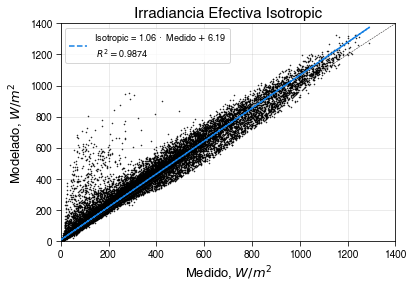

ISOTROPIC
R2:  0.9874
RMSE:  3.41
MAPE:  10.07




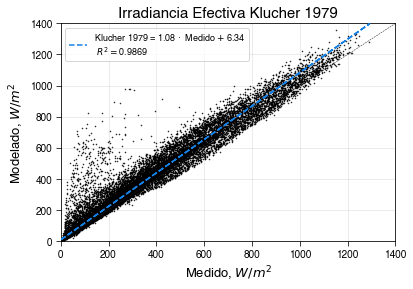

KLUCHER 1979
R2:  0.9869
RMSE:  3.68
MAPE:  10.64




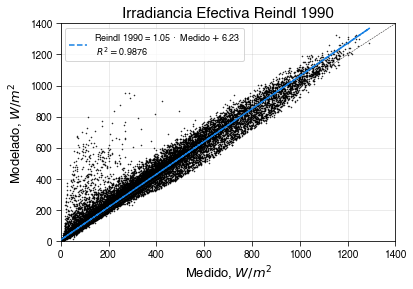

REINDL 1990
R2:  0.9876
RMSE:  3.33
MAPE:  9.95




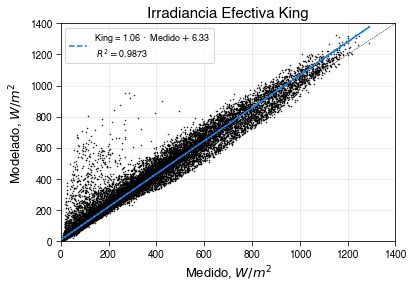

KING
R2:  0.9873
RMSE:  3.44
MAPE:  10.31




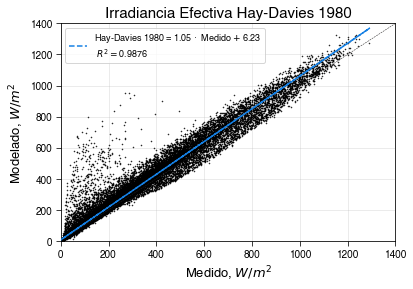

HAY-DAVIES 1980
R2:  0.9876
RMSE:  3.33
MAPE:  9.94




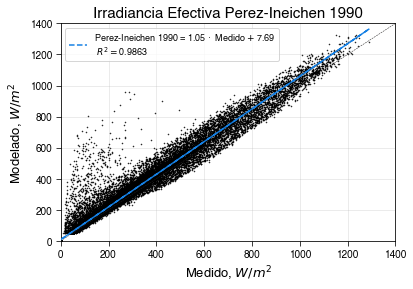

PEREZ-INEICHEN 1990
R2:  0.9863
RMSE:  3.72
MAPE:  8.6




In [76]:
list_r2 = []
list_rmse = []
list_mape = []

other_models = ['isotropic', 'klucher', 'reindl', 'king', 'haydavies', 'perez']

for i in other_models:

    if i == 'isotropic':
        y_value = poa_isotropic['poa_global'][start:end]
        title_name = 'Isotropic'
    
    elif i == 'klucher':
        y_value = poa_klucher['poa_global'][start:end]
        title_name = 'Klucher 1979'
        
    elif i == 'reindl':
        y_value = poa_reindl['poa_global'][start:end]
        title_name = 'Reindl 1990'
        
    elif i == 'king':
        y_value = poa_king['poa_global'][start:end]
        title_name = 'King'
        
    elif i == 'haydavies':
        y_value = poa_haydavies['poa_global'][start:end]
        title_name = 'Hay-Davies 1980'
    
    else:
        y_value = poa_perez['poa_global'][start:end]
        title_name = 'Perez-Ineichen 1990'
    
    #Measured and modeled POA dataframe
    irrads = pd.DataFrame({'effective_irrad': meteocontrolDB.effective_irrad[start:end], 
                           'poa_global': y_value})

    irrads = irrads.dropna()
    
    if i == 'perez':
        irrads = irrads.drop(irrads[(irrads.effective_irrad > 1) & (irrads.poa_global < 50)].index) #Perez Data Filter
    
    #Least Squares Linear Regression
    x_value = irrads.effective_irrad
    y_value = irrads.poa_global

    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 1400

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.figure()
    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=(f"{title_name} = " + f"{slope.round(2)} $· \:$ Medido $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Irradiancia Efectiva {title_name}',
              ylabel='Modelado, $W/m^2$',
              xlabel='Medido, $W/m^2$',
              rot=0, 
              ylim_min=0, ylim_max=axis_lim, 
              xlim_min=0, xlim_max=axis_lim, 
              loc='best')
    plt.show()
    
    #Metrics
    print(title_name.upper())
    print('R2: ', r_value.round(4))

    metrics = pd.DataFrame({'effective_irrad': x_value, 
                            'poa': y_value})

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    metrics = metrics.loc[(metrics.index.hour >= 7) & (metrics.index.hour <= 17) & (metrics.effective_irrad != 0)]

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print('MAPE: ', np.round(mape, 2))
    print('\n')
    
    list_r2.append(r_value)
    list_rmse.append(rmse)
    list_mape.append(mape)
    
list_r2 = [x * 100 for x in list_r2]

### <span style='color:CadetBlue'>6.5. Métricas Estadísticas Modelos Transposición</span> <span style='color:White'>code:10</span>

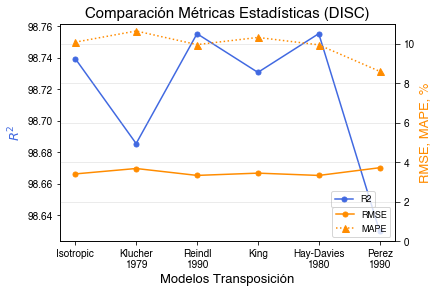

In [77]:
full_models = ['Isotropic', 'Klucher\n1979', 'Reindl\n1990', 'King', 'Hay-Davies\n1980', 'Perez\n1990']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(full_models, list_r2, color='royalblue', ls='-', marker='o', ms=5, label='R2')
ax2.plot(full_models, list_rmse, color='darkorange', ls='-', marker='o', ms=5, label='RMSE')
ax2.plot(full_models, list_mape, color='darkorange', ls='dotted', marker='^', ms=7, label='MAPE')

ax1.set_xlabel('Modelos Transposición', fontname="Helvetica", fontsize=13)
ax1.set_ylabel('$R^2$', fontname="Helvetica", fontsize=13, color='royalblue')
ax2.set_ylabel('RMSE, MAPE', fontname="Helvetica", fontsize=13, color='darkorange')

plt.rc('font', family='Helvetica')
plt.rcParams['axes.axisbelow'] = True;

plt.title('Comparación Métricas Estadísticas (DISC)', fontname="Helvetica", fontsize=15);
plt.ylabel('RMSE, MAPE, %', fontname="Helvetica", fontsize=13);
#plt.xlabel('Medido, $W/m^2$', fontname="Helvetica", fontsize=13);

plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.xlim(None, None)
plt.ylim(0, None)
plt.grid(True);
plt.legend(loc='lower right', fontsize=9);
ax1.legend(loc=(0.81, 0.155), fontsize=9);
plt.tight_layout;

### 6.6. Simulación de Producción Planta FV

#### 6.6.1. Producción DC y Potencia AC

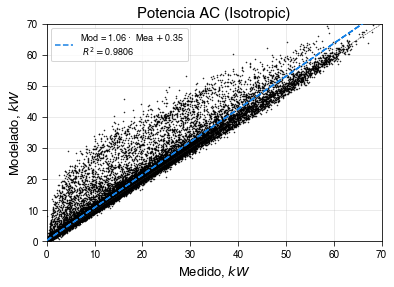

ISOTROPIC
R2:  0.9806
RMSE:  4.19
MAPE:  5.5




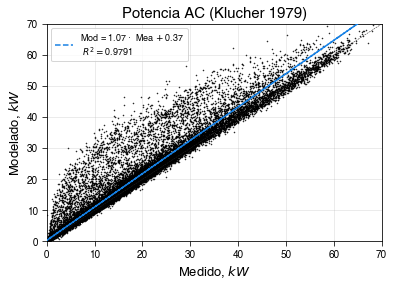

KLUCHER 1979
R2:  0.9791
RMSE:  4.53
MAPE:  6.4




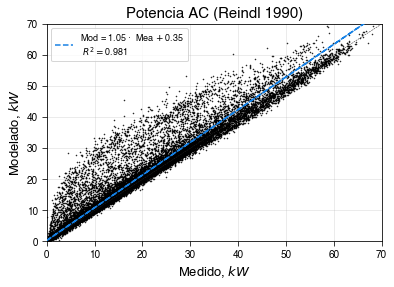

REINDL 1990
R2:  0.981
RMSE:  4.09
MAPE:  5.41




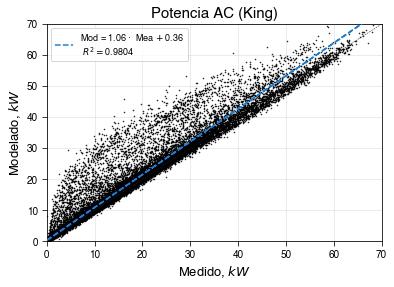

KING
R2:  0.9804
RMSE:  4.23
MAPE:  5.65




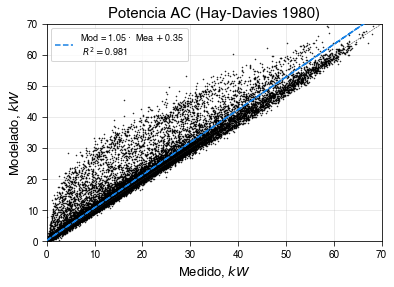

HAY-DAVIES 1980
R2:  0.981
RMSE:  4.09
MAPE:  5.42




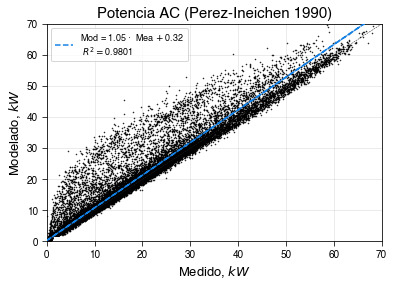

PEREZ-INEICHEN 1990
R2:  0.9801
RMSE:  4.19
MAPE:  5.0




In [78]:
measured_energy = pd.DataFrame()
simulated_energy = pd.DataFrame()
month_measured_energy = pd.DataFrame()
month_simulated_energy = pd.DataFrame()
energy_error = pd.DataFrame()

full_models = ['isotropic', 'klucher', 'reindl', 'king', 'haydavies', 'perez']

for i in full_models:

    if i == 'isotropic':
        y_value = poa_isotropic['poa_global']
        title_name = 'Isotropic'
    
    elif i == 'klucher':
        y_value = poa_klucher['poa_global']
        title_name = 'Klucher 1979'
        
    elif i == 'reindl':
        y_value = poa_reindl['poa_global']
        title_name = 'Reindl 1990'
        
    elif i == 'king':
        y_value = poa_king['poa_global']
        title_name = 'King'
        
    elif i == 'haydavies':
        y_value = poa_haydavies['poa_global']
        title_name = 'Hay-Davies 1980'
    
    else:
        y_value = poa_perez['poa_global']
        title_name = 'Perez-Ineichen 1990'
    
    #DC Production
    sc_A, sc_B = dc_production(effective_irradiance=y_value,
                               module_temperature=meteocontrolDB.module_temp)
    
    #Losses
    sc_A, sc_B = losses(sc_A=sc_A, sc_B=sc_B)
    
    #AC Power
    ACPow = ac_power(sc_A=sc_A, sc_B=sc_B) #Simulated
    ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B #Measured
    
    #Figure
    plt.figure()

    #Least Squares Linear Regression
    x_value = ac[start:end]/kilo
    y_value = ACPow/kilo

    ac = pd.DataFrame({'measured': x_value, 
                       'modeled': y_value})

    ac = ac.dropna()

    #Perez Filter    
    if i == 'perez':
        ac = ac.drop(ac[(ac.measured > 1) & (ac.modeled < 2)].index) #Perez Data Filter
    
    x_value = ac.measured
    y_value = ac.modeled

    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 70

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), 
             color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Potencia AC ({title_name})',
               ylabel='Modelado, $kW$',
               xlabel='Medido, $kW$',
               rot=0, 
               ylim_min=0, ylim_max=axis_lim, 
               xlim_min=0, xlim_max=axis_lim, 
               loc='best')
    
    plt.show()
    
    mea_energy, sim_energy, month_mea_energy, month_sim_energy, energyerror = energia(ACPow=ACPow, res=5)
    
    measured_energy[i] = mea_energy['energy']
    simulated_energy[i] = sim_energy['Daily Energy, kWh']
    month_measured_energy[i] = month_mea_energy['energy']
    month_simulated_energy[i] = month_sim_energy['Daily Energy, kWh']
    energy_error[i] = energyerror['perc_error']
    
    #Metrics
    print(title_name.upper())
    print('R2: ', r_value.round(4))

    metrics = pd.DataFrame({'effective_irrad': x_value, 
                            'poa': y_value})

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    metrics = metrics.loc[(metrics.index.hour >= 7) & (metrics.index.hour <= 17) & (metrics.effective_irrad != 0)]

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print('MAPE: ', np.round(mape, 2))
    print('\n')
    
    list_r2.append(r_value)
    list_rmse.append(rmse)
    list_mape.append(mape)
    
list_r2 = [x * 100 for x in list_r2]

#### 6.6.2. Energía Diaria

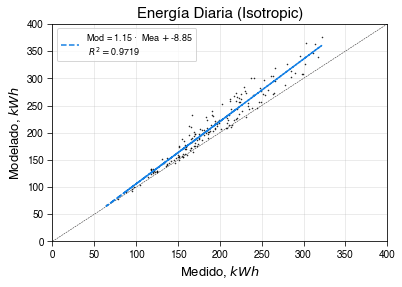

ISOTROPIC
R2:  0.9719
RMSE:  7.87
MAPE:  8.05




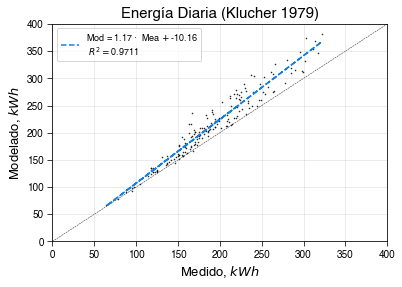

KLUCHER 1979
R2:  0.9711
RMSE:  8.94
MAPE:  10.23




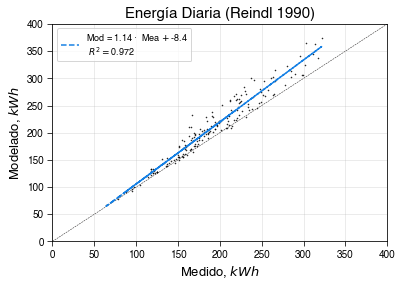

REINDL 1990
R2:  0.972
RMSE:  7.6
MAPE:  7.71




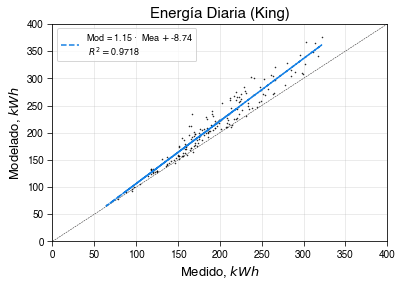

KING
R2:  0.9718
RMSE:  8.05
MAPE:  8.33




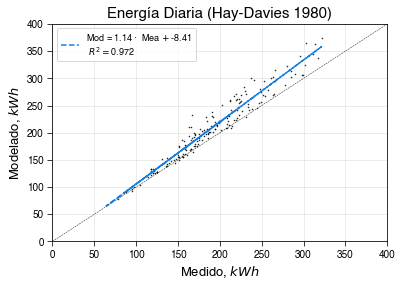

HAY-DAVIES 1980
R2:  0.972
RMSE:  7.59
MAPE:  7.69




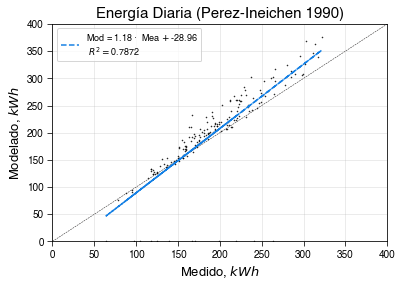

PEREZ-INEICHEN 1990
R2:  0.7872
RMSE:  15.32
MAPE:  8.07




In [79]:
for i in full_models:
    if i == 'isotropic':
        title_name = 'Isotropic'
    
    elif i == 'klucher':
        title_name = 'Klucher 1979'
        
    elif i == 'reindl':
        title_name = 'Reindl 1990'
        
    elif i == 'king':
        title_name = 'King'
        
    elif i == 'haydavies':
        title_name = 'Hay-Davies 1980'
    
    else:
        title_name = 'Perez-Ineichen 1990'
    
    #Figure
    plt.figure()

    #Least Squares Linear Regression
    x_value = measured_energy[i]
    y_value = simulated_energy[i]

    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 400

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), 
             color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Energía Diaria ({title_name})',
               ylabel='Modelado, $kWh$',
               xlabel='Medido, $kWh$',
               rot=0, 
               ylim_min=0, ylim_max=axis_lim, 
               xlim_min=0, xlim_max=axis_lim, 
               loc='best')
    
    plt.show()
    
    #Metrics
    print(title_name.upper())
    print('R2: ', r_value.round(4))

    metrics = pd.DataFrame({'effective_irrad': x_value, 
                            'poa': y_value})

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    metrics = metrics.loc[metrics.effective_irrad != 0]

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print('MAPE: ', np.round(mape, 2))
    print('\n')
    
    list_r2.append(r_value)
    list_rmse.append(rmse)
    list_mape.append(mape)
    
list_r2 = [x * 100 for x in list_r2]

#### <span style='color:CadetBlue'>6.6.3. Energía Mensual</span> <span style='color:White'>code:11</span>

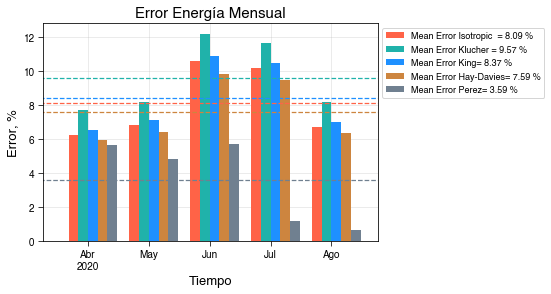

In [80]:
#Energy Error Comparison Plot
bar_width = 0.08;
width = bar_width*2;

months = ['Abr\n2020', 'May', 'Jun', 'Jul', 'Ago']

x = np.arange(len(months))

r1 = np.arange(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]
r7 = [x + bar_width for x in r6]
r8 = [x + bar_width for x in r7]
r9 = [x + bar_width for x in r8]
r10 = [x + bar_width for x in r9]
r511 = [x + bar_width for x in r10]

#Mean Error Values
meanerror_isotropic = round(energy_error['isotropic'][0:5].mean(), 2)
meanerror_klucher = round(energy_error['klucher'][0:5].mean(), 2)
meanerror_reindl = round(energy_error['reindl'][0:5].mean(), 2)
meanerror_king = round(energy_error['king'][0:5].mean(), 2)
meanerror_haydavies = round(energy_error['haydavies'][0:5].mean(), 2)
meanerror_perez = round(energy_error['perez'][0:5].mean(), 2)

#Bar Plots
hor, ver = 13, 5
#plt.figure(figsize=(hor,ver))

plt.bar(r1, energy_error['isotropic'][0:5], width, 
        label='Mean Error Isotropic  = ' + f'{meanerror_isotropic}' + ' %', color='tomato', linewidth=2);

plt.bar(r3, energy_error['klucher'][0:5], width, 
        label='Mean Error Klucher = ' + f'{meanerror_klucher}' + ' %', color='lightseagreen', linewidth=2);

plt.bar(r5, energy_error['king'][0:5], width, 
        label='Mean Error King= ' + f'{meanerror_king}' + ' %', color='dodgerblue', linewidth=2);

plt.bar(r7, energy_error['haydavies'][0:5], width, 
        label='Mean Error Hay-Davies= ' + f'{meanerror_haydavies}' + ' %', color='peru', linewidth=2);

plt.bar(r9, energy_error['perez'][0:5], width, 
        label='Mean Error Perez= ' + f'{meanerror_perez}' + ' %', color='slategray', linewidth=2);

#Horizontal Lines
plt.hlines(y=0, xmin=-1, xmax=x[-1]+1, colors='black', linestyles='solid', linewidth=0.5) #Zero
plt.hlines(y=meanerror_isotropic, xmin=-1, xmax=x[-1]+1, colors='tomato', linestyles='--', linewidth=1.25) #SysA
plt.hlines(y=meanerror_klucher, xmin=-1, xmax=x[-1]+1, colors='lightseagreen', linestyles='--', linewidth=1.25) #SysB
#plt.hlines(y=meanerror_reindl, xmin=-1, xmax=x[-1]+1, colors='orange', linestyles='--', linewidth=1.25) #Full
plt.hlines(y=meanerror_king, xmin=-1, xmax=x[-1]+1, colors='dodgerblue', linestyles='--', linewidth=1.25) #Full
plt.hlines(y=meanerror_haydavies, xmin=-1, xmax=x[-1]+1, colors='peru', linestyles='--', linewidth=1.25) #Full
plt.hlines(y=meanerror_perez, xmin=-1, xmax=x[-1]+1, colors='slategray', linestyles='--', linewidth=1.25) #Full

plt.xticks(r4, months)
plot_specs(title='Error Energía Mensual',
           ylabel='Error, %',
           xlabel='Tiempo',
           rot=0, 
           ylim_min=0, ylim_max=None, 
           xlim_min=-0.5, xlim_max=5, 
           loc='best')
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=9);

In [81]:
#BEST MODEL METRICS
print('ENERGÍA MENSUAL SISTEMA COMPLETO')

print('-'*10)
print(title_name)
metrics = pd.DataFrame({'measured_energy': month_measured_energy['perez'][0:5].values, 
                        'modeled_energy': month_simulated_energy['perez'][0:5].values})

y_true = metrics.measured_energy
y_pred = metrics.modeled_energy

r2 = r2_score(y_true=y_true, y_pred=y_pred)
print('R2: ', np.round(r2, 4))

rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
rmse = (rmse/np.max(y_true))*100
print('RMSE: ', np.round(rmse, 2))

'''
MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
'''
metrics = metrics.loc[metrics.measured_energy != 0]

y_true = metrics.measured_energy
y_pred = metrics.modeled_energy

mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
print('MAPE: ', np.round(mape, 2), '\n')

ENERGÍA MENSUAL SISTEMA COMPLETO
----------
Perez-Ineichen 1990
R2:  0.8325
RMSE:  3.74
MAPE:  4.61 



## 7. Modelos de Descomposición: DIRINT

### <span style='color:CadetBlue'>7.1. DIRINT </span> <span style='color:White'>code:12</span>

Determina el DNI a partir del GHI al emplear una modificación del modelo DISC. DIRINT mejora el modelo DISC al utilizar series de tiempo de GHI e **información de temperatura del punto de rocío** [9].

El parámetro ```use_delta_kt_prime``` indica que el índice de estabilidad delta_kt_prime está incluido en el modelo; este ajusta el DNI estimado según la dinámica en la serie temporal de GHI. Si el tiempo entre los puntos GHI es 1.5 horas o más, no se recomienda incluir este índice ---e.g. ```use_delta_kt_prime=False```.

Otro parámetro de optimización del DIRINT sobre el DISC es la inclusión de las temperaturas del punto de rocío de la superficie (```temp_dew```). Dado que en este escenario no se cuentan con estos valores, ```temp_dew=NaN``` ---i.e. no se aplican las optimizaciones relativas a este parámetro--- y, finalmente, se esperan resultados próximos a los obtenidos con el modelo DISC.

**Info:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.irradiance.dirint.html#pvlib.irradiance.dirint.

[10] Perez, R., P. Ineichen, E. Maxwell, R. Seals and A. Zelenka, (1992). Dynamic Global-to-Direct Irradiance Conversion Models. ASHRAE Transactions-Research Series, pp. 354-369.

In [82]:
dirint = irradiance.dirint(ghi=meteocontrolDB.ghi, 
                           solar_zenith=solpos.zenith, 
                           times=meteocontrolDB.index, 
                           pressure=101325.0, 
                           use_delta_kt_prime=True, 
                           temp_dew=None, 
                           min_cos_zenith=0.065, 
                           max_zenith=87) #80

dirint = pd.DataFrame(dirint)

dirint['dhi'] = meteocontrolDB.ghi - dirint.dni*np.cos(np.radians(solpos.zenith))
dirint['ghi'] = meteocontrolDB.ghi
dirint['effective_irrad'] = meteocontrolDB.effective_irrad

dirint = dirint.dropna()

dirint.head()

dni     dhi     ghi  effective_irrad
Datetime                                                       
2019-08-03 06:00:00-05:00  0.0   3.832   3.832            4.260
2019-08-03 06:05:00-05:00  0.0   8.506   8.506            7.666
2019-08-03 06:10:00-05:00  0.0  14.018  14.018           11.894
2019-08-03 06:15:00-05:00  0.0  19.926  19.926           16.566
2019-08-03 06:20:00-05:00  0.0  26.442  26.442           21.892

#### 7.1.1. DIRINT Corr

Se siguen las correcciones indicadas en la Sección 5.1.1 (Erbs Corr) para ajustar los valores de los parámetros  ```max_zenith``` y ```min_cos_zenith``` según los datos obtenidos de la posición del sol con ```location.get_solarposition```.

In [83]:
eval_corr = False

if eval_corr == True:
    max_zenith_corr = []
    min_cos_zenith_corr = []

    for i in range(len(meteocontrolDB)):

        h = meteocontrolDB.index[i].hour
        d = meteocontrolDB.index[i].day
        m = meteocontrolDB.index[i].month
        y = meteocontrolDB.index[i].year

        if h <= 12:
            max_zenith = zenith_6h.loc[(zenith_6h.index.day == d) & (zenith_6h.index.month == m) & (zenith_6h.index.year == y)][0]
            max_zenith = 90 - max_zenith

        else:
            max_zenith = zenith_18h.loc[(zenith_18h.index.day == d) & (zenith_18h.index.month == m) & (zenith_18h.index.year == y)][0]
            max_zenith = 90 - max_zenith

        min_cos_zenith = np.cos(np.radians(max_zenith))

        max_zenith_corr.append(max_zenith)
        min_cos_zenith_corr.append(min_cos_zenith)

    dirint_corr = irradiance.dirint(ghi=meteocontrolDB.ghi[i], 
                                    solar_zenith=solpos.zenith[i], 
                                    times=meteocontrolDB.index[i],
                                    pressure=101325.0,
                                    use_delta_kt_prime=True, 
                                    temp_dew=None,
                                    min_cos_zenith=min_cos_zenith, 
                                    max_zenith=max_zenith)

    dirint_corr.head()

### 7.2. Control de Calidad de Datos

In [84]:
if eval_corr == True:
    dqc = pd.DataFrame({'ghi': dirint.ghi, 
                        'dni': dirint.dni,
                        'dhi': dirint.dhi})

    dqc = dqc.set_index(dirint.index)
    dqc.head()

In [85]:
if eval_corr == True:
    #Physically possible limits
    dqc_ghi = []
    dqc_dhi = []
    dqc_dni = []

    for i in range(len(dqc)):
        Gh = dqc['ghi'][i]
        Dh = dqc['dhi'][i]
        Bh = dqc['dni'][i]

        #Global Horizontal
        if (-4 < Gh or Gh < etr_nrel[i]*1.5*(np.cos(np.radians(solpos.zenith[i]))**1.2)+100):
            dqc_ghi.append(Gh)
        else:
            dqc_ghi.append(float('NaN'))

        #Diffuse
        if (-4 < Dh or Dh < etr_nrel[i]*0.95*(np.cos(np.radians(solpos.zenith[i]))**1.2)+50):
            dqc_dhi.append(Dh)
        else:
            dqc_dhi.append(float('NaN')) 

        #Beam or Direct Normal
        if (-4 < Bh or Bh < etr_nrel[i]):
            dqc_dni.append(Bh)
        else:
            dqc_dni.append(float('NaN'))

    dqc_corr = pd.DataFrame({'ghi': dqc_ghi, 
                             'dni': dqc_dni,
                             'dhi': dqc_dhi})

    dqc_corr = dqc_corr.set_index(dirint.index)

    ghi_dif = dqc['ghi'] - dqc_corr['ghi']
    dni_dif = dqc['dni'] - dqc_corr['dni']
    dhi_dif = dqc['dhi'] - dqc_corr['dhi']

    ghi_dif.plot(label='GHI')
    dni_dif.plot(label='DNI')
    dhi_dif.plot(label='DHI')

    plot_specs(title='Irradiancia POA',
               ylabel='$\Delta$ Modelo - Control Calidad , $W/m^2$',
               xlabel='Tiempo',
               rot=30, 
               ylim_min=None, ylim_max=None, 
               xlim_min='2019-09', xlim_max='2021-03', 
               loc='upper left')

In [86]:
if eval_corr == True:
    #Extremely rare limits
    dqc_ghi = []
    dqc_dhi = []
    dqc_dni = []

    for i in range(len(dqc)):
        Gh = dqc['ghi'][i]
        Dh = dqc['dhi'][i]
        Bh = dqc['dni'][i]

        #Global Horizontal
        if (-2 < Gh or Gh < etr_nrel[i]*1.20*(np.cos(np.radians(solpos.zenith[i]))**1.2)+50):
            dqc_ghi.append(Gh)
        else:
            dqc_ghi.append(float('NaN'))

        #Diffuse
        if (-2 < Dh or Dh < etr_nrel[i]*0.75*(np.cos(np.radians(solpos.zenith[i]))**1.2)+30):
            dqc_dhi.append(Dh)
        else:
            dqc_dhi.append(float('NaN')) 

        #Beam or Direct Normal
        if (-2 < Bh or Bh < etr_nrel[i]*0.95*(np.cos(np.radians(solpos.zenith[i]))**1.2)+10):
            dqc_dni.append(Bh)
        else:
            dqc_dni.append(float('NaN'))

    dqc_corr = pd.DataFrame({'ghi': dqc_ghi, 
                             'dni': dqc_dni,
                             'dhi': dqc_dhi})

    dqc_corr = dqc_corr.set_index(dirint.index)

    ghi_dif = dqc['ghi'] - dqc_corr['ghi']
    dni_dif = dqc['dni'] - dqc_corr['dni']
    dhi_dif = dqc['dhi'] - dqc_corr['dhi']

    ghi_dif.plot(label='GHI')
    dni_dif.plot(label='DNI')
    dhi_dif.plot(label='DHI')

    plot_specs(title='Irradiancia POA',
               ylabel='$\Delta$ Modelo - Control Calidad , $W/m^2$',
               xlabel='Tiempo',
               rot=30, 
               ylim_min=None, ylim_max=None, 
               xlim_min='2019-09', xlim_max='2021-03', 
               loc='upper left')

### 7.3. Irradiancia POA (Todos los Modelos Transposición)

In [87]:
#Isotropic
poa_isotropic = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                                surface_azimuth=surface_azimuth, 
                                                solar_zenith=solpos.zenith, 
                                                solar_azimuth=solpos.azimuth, 
                                                dni=dirint.dni, 
                                                ghi=dirint.ghi, 
                                                dhi=dirint.dhi, 
                                                dni_extra=etr_nrel, 
                                                airmass=airmass.airmass_relative, 
                                                albedo=surface_albedo, 
                                                surface_type='urban', 
                                                model='isotropic')

#Klucher
poa_klucher = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                              surface_azimuth=surface_azimuth, 
                                              solar_zenith=solpos.zenith, 
                                              solar_azimuth=solpos.azimuth, 
                                              dni=dirint.dni, 
                                              ghi=dirint.ghi, 
                                              dhi=dirint.dhi, 
                                              dni_extra=etr_nrel, 
                                              airmass=airmass.airmass_relative, 
                                              albedo=surface_albedo, 
                                              surface_type='urban', 
                                              model='klucher')

#Reindl
poa_reindl = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                             surface_azimuth=surface_azimuth, 
                                             solar_zenith=solpos.zenith, 
                                             solar_azimuth=solpos.azimuth, 
                                             dni=dirint.dni, 
                                             ghi=dirint.ghi, 
                                             dhi=dirint.dhi, 
                                             dni_extra=etr_nrel, 
                                             airmass=airmass.airmass_relative, 
                                             albedo=surface_albedo, 
                                             surface_type='urban', 
                                             model='reindl')

#King
poa_king = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                           surface_azimuth=surface_azimuth, 
                                           solar_zenith=solpos.zenith, 
                                           solar_azimuth=solpos.azimuth, 
                                           dni=dirint.dni, 
                                           ghi=dirint.ghi, 
                                           dhi=dirint.dhi, 
                                           dni_extra=etr_nrel, 
                                           airmass=airmass.airmass_relative, 
                                           albedo=surface_albedo, 
                                           surface_type='urban', 
                                           model='king')

#Hay-Davies
poa_haydavies = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                                surface_azimuth=surface_azimuth, 
                                                solar_zenith=solpos.zenith, 
                                                solar_azimuth=solpos.azimuth, 
                                                dni=dirint.dni, 
                                                ghi=dirint.ghi, 
                                                dhi=dirint.dhi, 
                                                dni_extra=etr_nrel, 
                                                airmass=airmass.airmass_relative, 
                                                albedo=surface_albedo, 
                                                surface_type='urban', 
                                                model='haydavies')
#Perez
poa_perez = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                            surface_azimuth=surface_azimuth, 
                                            solar_zenith=solpos.zenith, 
                                            solar_azimuth=solpos.azimuth, 
                                            dni=dirint.dni, 
                                            ghi=dirint.ghi, 
                                            dhi=dirint.dhi, 
                                            dni_extra=etr_nrel, 
                                            airmass=airmass.airmass_relative, 
                                            albedo=surface_albedo, 
                                            surface_type='urban', 
                                            model='perez', 
                                            model_perez='allsitescomposite1990')

ValueError: operands could not be broadcast together with shapes (100329,) () (200810,) 

### 7.4.  Comparación Modelado vs. Medido

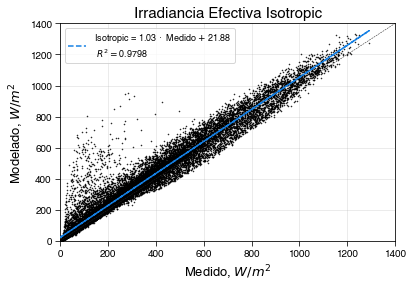

ISOTROPIC
R2:  0.9798
RMSE:  4.83
MAPE:  10.08




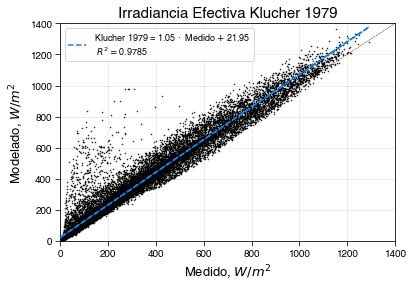

KLUCHER 1979
R2:  0.9785
RMSE:  5.28
MAPE:  10.54




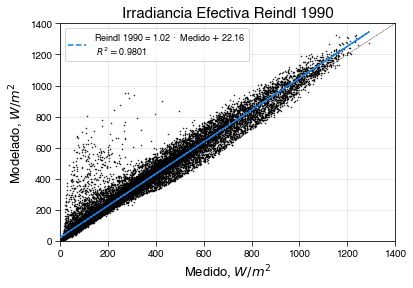

REINDL 1990
R2:  0.9801
RMSE:  4.71
MAPE:  9.96




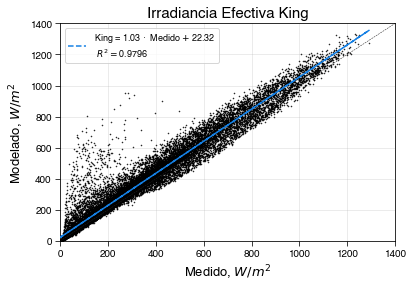

KING
R2:  0.9796
RMSE:  4.89
MAPE:  10.32




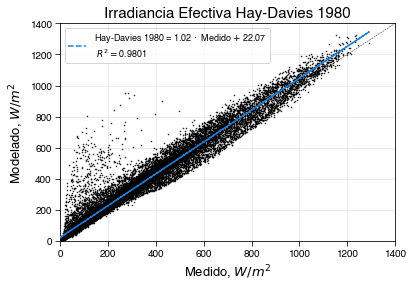

HAY-DAVIES 1980
R2:  0.9801
RMSE:  4.71
MAPE:  9.96




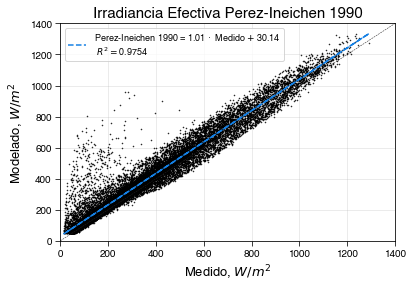

PEREZ-INEICHEN 1990
R2:  0.9754
RMSE:  5.14
MAPE:  9.2




In [80]:
list_r2 = []
list_rmse = []
list_mape = []

other_models = ['isotropic', 'klucher', 'reindl', 'king', 'haydavies', 'perez']

for i in other_models:

    if i == 'isotropic':
        y_value = poa_isotropic['poa_global'][start:end]
        title_name = 'Isotropic'
    
    elif i == 'klucher':
        y_value = poa_klucher['poa_global'][start:end]
        title_name = 'Klucher 1979'
        
    elif i == 'reindl':
        y_value = poa_reindl['poa_global'][start:end]
        title_name = 'Reindl 1990'
        
    elif i == 'king':
        y_value = poa_king['poa_global'][start:end]
        title_name = 'King'
        
    elif i == 'haydavies':
        y_value = poa_haydavies['poa_global'][start:end]
        title_name = 'Hay-Davies 1980'
    
    else:
        y_value = poa_perez['poa_global'][start:end]
        title_name = 'Perez-Ineichen 1990'
    
    #Measured and modeled POA dataframe
    irrads = pd.DataFrame({'effective_irrad': dirint.effective_irrad[start:end], 
                           'poa_global': y_value})

    irrads = irrads.dropna()
    
    if i == 'perez':
        irrads = irrads.drop(irrads[(irrads.effective_irrad > 1) & (irrads.poa_global < 50)].index) #Perez Data Filter
    
    #Least Squares Linear Regression
    x_value = irrads.effective_irrad
    y_value = irrads.poa_global

    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 1400

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.figure()
    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=(f"{title_name} = " + f"{slope.round(2)} $· \:$ Medido $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Irradiancia Efectiva {title_name}',
              ylabel='Modelado, $W/m^2$',
              xlabel='Medido, $W/m^2$',
              rot=0, 
              ylim_min=0, ylim_max=axis_lim, 
              xlim_min=0, xlim_max=axis_lim, 
              loc='best')
    plt.show()
    
    #Metrics
    print(title_name.upper())
    print('R2: ', r_value.round(4))

    metrics = pd.DataFrame({'effective_irrad': x_value, 
                            'poa': y_value})

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    metrics = metrics.loc[(metrics.index.hour >= 7) & (metrics.index.hour <= 17) & (metrics.effective_irrad != 0)]

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print('MAPE: ', np.round(mape, 2))
    print('\n')
    
    list_r2.append(r_value)
    list_rmse.append(rmse)
    list_mape.append(mape)
    
list_r2 = [x * 100 for x in list_r2]

### 7.5. Métricas Estadísticas Modelos Transposición

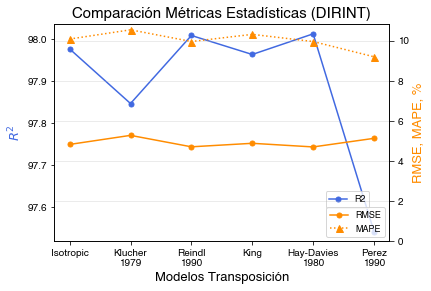

In [81]:
full_models = ['Isotropic', 'Klucher\n1979', 'Reindl\n1990', 'King', 'Hay-Davies\n1980', 'Perez\n1990']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(full_models, list_r2, color='royalblue', ls='-', marker='o', ms=5, label='R2')
ax2.plot(full_models, list_rmse, color='darkorange', ls='-', marker='o', ms=5, label='RMSE')
ax2.plot(full_models, list_mape, color='darkorange', ls='dotted', marker='^', ms=7, label='MAPE')

ax1.set_xlabel('Modelos Transposición', fontname="Helvetica", fontsize=13)
ax1.set_ylabel('$R^2$', fontname="Helvetica", fontsize=13, color='royalblue')
ax2.set_ylabel('RMSE, MAPE', fontname="Helvetica", fontsize=13, color='darkorange')

plt.rc('font', family='Helvetica')
plt.rcParams['axes.axisbelow'] = True;

plt.title('Comparación Métricas Estadísticas (DIRINT)', fontname="Helvetica", fontsize=15);
plt.ylabel('RMSE, MAPE, %', fontname="Helvetica", fontsize=13);
#plt.xlabel('Medido, $W/m^2$', fontname="Helvetica", fontsize=13);

plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.xlim(None, None)
plt.ylim(0, None)
plt.grid(True);
plt.legend(loc='lower right', fontsize=9);
ax1.legend(loc=(0.81, 0.155), fontsize=9);
plt.tight_layout;

### 7.6. Simulación de Producción Planta FV

#### 7.6.1. Producción DC y Potencia AC

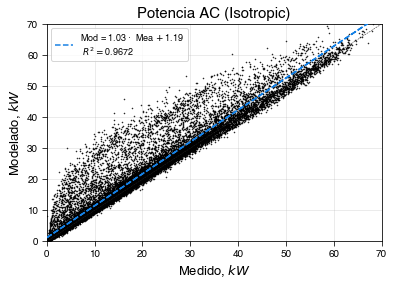

ISOTROPIC
R2:  0.9672
RMSE:  5.96
MAPE:  5.54




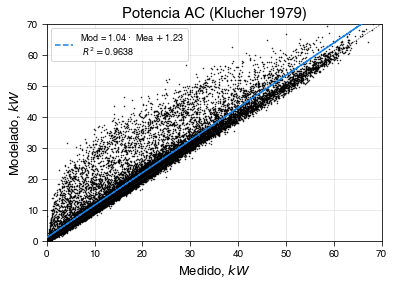

KLUCHER 1979
R2:  0.9638
RMSE:  6.53
MAPE:  6.37




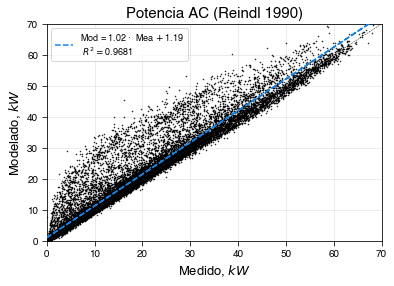

REINDL 1990
R2:  0.9681
RMSE:  5.81
MAPE:  5.47




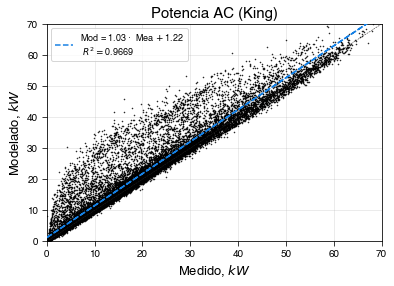

KING
R2:  0.9669
RMSE:  6.03
MAPE:  5.72




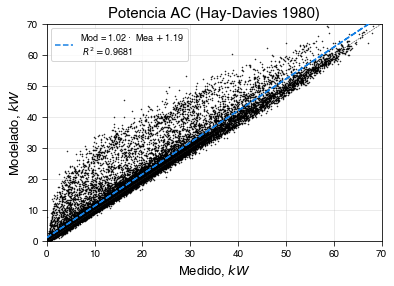

HAY-DAVIES 1980
R2:  0.9681
RMSE:  5.8
MAPE:  5.47




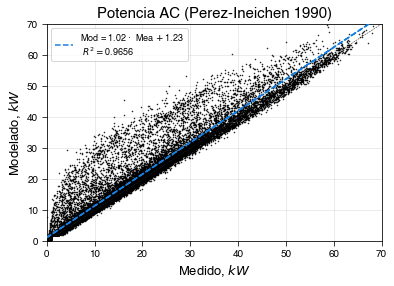

PEREZ-INEICHEN 1990
R2:  0.9656
RMSE:  6.0
MAPE:  5.07




In [82]:
measured_energy = pd.DataFrame()
simulated_energy = pd.DataFrame()
month_measured_energy = pd.DataFrame()
month_simulated_energy = pd.DataFrame()
energy_error = pd.DataFrame()

full_models = ['isotropic', 'klucher', 'reindl', 'king', 'haydavies', 'perez']

for i in full_models:

    if i == 'isotropic':
        y_value = poa_isotropic['poa_global']
        title_name = 'Isotropic'
    
    elif i == 'klucher':
        y_value = poa_klucher['poa_global']
        title_name = 'Klucher 1979'
        
    elif i == 'reindl':
        y_value = poa_reindl['poa_global']
        title_name = 'Reindl 1990'
        
    elif i == 'king':
        y_value = poa_king['poa_global']
        title_name = 'King'
        
    elif i == 'haydavies':
        y_value = poa_haydavies['poa_global']
        title_name = 'Hay-Davies 1980'
    
    else:
        y_value = poa_perez['poa_global']
        title_name = 'Perez-Ineichen 1990'

    data = pd.DataFrame({'poa_global': y_value, 
                         'module_temp': meteocontrolDB.module_temp})

    data = data.set_index(meteocontrolDB.index)
    data = data.dropna()
    
    #DC Production
    sc_A, sc_B = dc_production(effective_irradiance=data.poa_global,
                               module_temperature=data.module_temp)
    
    #Losses
    sc_A, sc_B = losses(sc_A=sc_A, sc_B=sc_B)
    
    #AC Power
    ACPow = ac_power(sc_A=sc_A, sc_B=sc_B) #Simulated
    ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B #Measured
    
    #Figure
    plt.figure()

    #Least Squares Linear Regression
    x_value = ac[start:end]/kilo
    y_value = ACPow/kilo

    ac = pd.DataFrame({'measured': x_value, 
                       'modeled': y_value})

    ac = ac.dropna()

    #Perez Filter    
    if i == 'perez':
        ac = ac.drop(ac[(ac.measured > 1) & (ac.modeled < 2)].index) #Perez Data Filter
    
    x_value = ac.measured
    y_value = ac.modeled

    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 70

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), 
             color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Potencia AC ({title_name})',
               ylabel='Modelado, $kW$',
               xlabel='Medido, $kW$',
               rot=0, 
               ylim_min=0, ylim_max=axis_lim, 
               xlim_min=0, xlim_max=axis_lim, 
               loc='best')
    
    plt.show()
    
    mea_energy, sim_energy, month_mea_energy, month_sim_energy, energyerror = energia(ACPow=ACPow, res=5)
    
    measured_energy[i] = mea_energy['energy']
    simulated_energy[i] = sim_energy['Daily Energy, kWh']
    month_measured_energy[i] = month_mea_energy['energy']
    month_simulated_energy[i] = month_sim_energy['Daily Energy, kWh']
    energy_error[i] = energyerror['perc_error']
    
    #Metrics
    print(title_name.upper())
    print('R2: ', r_value.round(4))

    metrics = pd.DataFrame({'effective_irrad': x_value, 
                            'poa': y_value})

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    metrics = metrics.loc[(metrics.index.hour >= 7) & (metrics.index.hour <= 17) & (metrics.effective_irrad != 0)]

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print('MAPE: ', np.round(mape, 2))
    print('\n')
    
    list_r2.append(r_value)
    list_rmse.append(rmse)
    list_mape.append(mape)
    
list_r2 = [x * 100 for x in list_r2]

#### 7.6.2. Energía Diaria

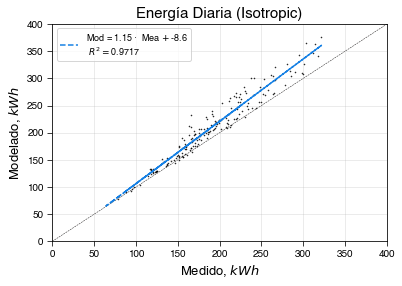

ISOTROPIC
R2:  0.9717
RMSE:  7.94
MAPE:  8.27




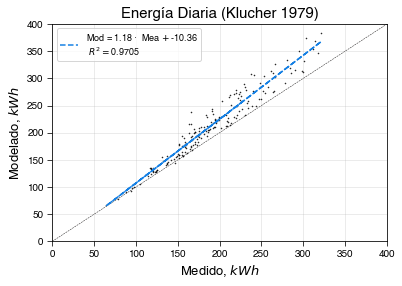

KLUCHER 1979
R2:  0.9705
RMSE:  9.08
MAPE:  10.57




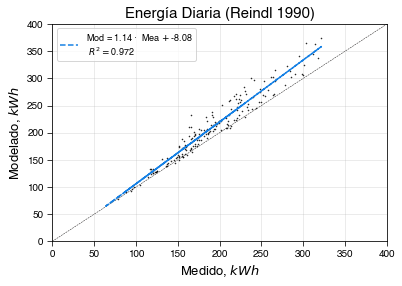

REINDL 1990
R2:  0.972
RMSE:  7.63
MAPE:  7.79




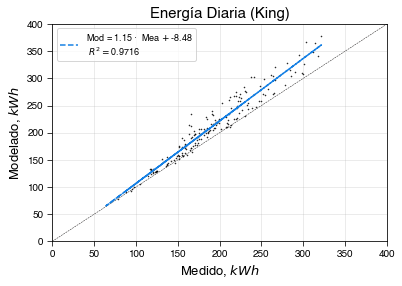

KING
R2:  0.9716
RMSE:  8.11
MAPE:  8.69




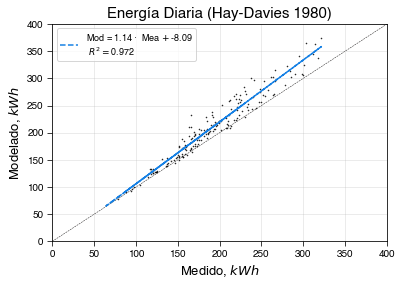

HAY-DAVIES 1980
R2:  0.972
RMSE:  7.62
MAPE:  7.77




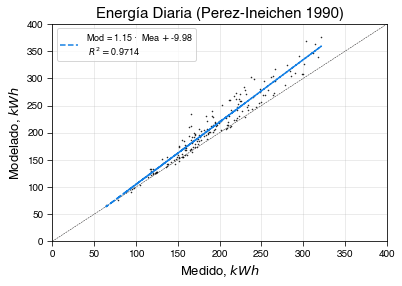

PEREZ-INEICHEN 1990
R2:  0.9714
RMSE:  7.64
MAPE:  7.52




In [83]:
for i in full_models:
    if i == 'isotropic':
        title_name = 'Isotropic'
    
    elif i == 'klucher':
        title_name = 'Klucher 1979'
        
    elif i == 'reindl':
        title_name = 'Reindl 1990'
        
    elif i == 'king':
        title_name = 'King'
        
    elif i == 'haydavies':
        title_name = 'Hay-Davies 1980'
    
    else:
        title_name = 'Perez-Ineichen 1990'
    
    #Figure
    plt.figure()

    #Least Squares Linear Regression
    x_value = measured_energy[i]
    x_value = x_value[:-1]
    
    y_value = simulated_energy[i]

    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 400

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), 
             color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Energía Diaria ({title_name})',
               ylabel='Modelado, $kWh$',
               xlabel='Medido, $kWh$',
               rot=0, 
               ylim_min=0, ylim_max=axis_lim, 
               xlim_min=0, xlim_max=axis_lim, 
               loc='best')
    
    plt.show()
    
    #Metrics
    print(title_name.upper())
    print('R2: ', r_value.round(4))

    metrics = pd.DataFrame({'effective_irrad': x_value, 
                            'poa': y_value})

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    metrics = metrics.loc[metrics.effective_irrad != 0]

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print('MAPE: ', np.round(mape, 2))
    print('\n')
    
    list_r2.append(r_value)
    list_rmse.append(rmse)
    list_mape.append(mape)
    
list_r2 = [x * 100 for x in list_r2]

#### <span style='color:CadetBlue'>7.6.3. Energía Mensual </span> <span style='color:White'>code:13</span>

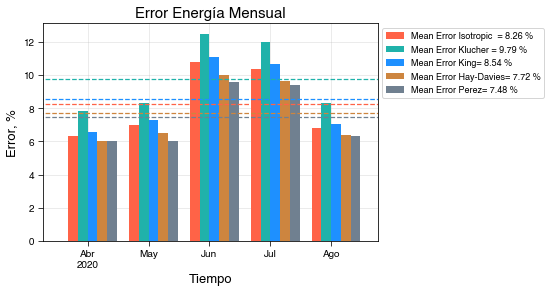

In [84]:
#Energy Error Comparison Plot
bar_width = 0.08;
width = bar_width*2;

months = ['Abr\n2020', 'May', 'Jun', 'Jul', 'Ago']

x = np.arange(len(months))

r1 = np.arange(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]
r7 = [x + bar_width for x in r6]
r8 = [x + bar_width for x in r7]
r9 = [x + bar_width for x in r8]
r10 = [x + bar_width for x in r9]
r511 = [x + bar_width for x in r10]

#Mean Error Values
meanerror_isotropic = round(energy_error['isotropic'][0:5].mean(), 2)
meanerror_klucher = round(energy_error['klucher'][0:5].mean(), 2)
meanerror_reindl = round(energy_error['reindl'][0:5].mean(), 2)
meanerror_king = round(energy_error['king'][0:5].mean(), 2)
meanerror_haydavies = round(energy_error['haydavies'][0:5].mean(), 2)
meanerror_perez = round(energy_error['perez'][0:5].mean(), 2)

#Bar Plots
hor, ver = 13, 5
#plt.figure(figsize=(hor,ver))

plt.bar(r1, energy_error['isotropic'][0:5], width, 
        label='Mean Error Isotropic  = ' + f'{meanerror_isotropic}' + ' %', color='tomato', linewidth=2);

plt.bar(r3, energy_error['klucher'][0:5], width, 
        label='Mean Error Klucher = ' + f'{meanerror_klucher}' + ' %', color='lightseagreen', linewidth=2);

plt.bar(r5, energy_error['king'][0:5], width, 
        label='Mean Error King= ' + f'{meanerror_king}' + ' %', color='dodgerblue', linewidth=2);

plt.bar(r7, energy_error['haydavies'][0:5], width, 
        label='Mean Error Hay-Davies= ' + f'{meanerror_haydavies}' + ' %', color='peru', linewidth=2);

plt.bar(r9, energy_error['perez'][0:5], width, 
        label='Mean Error Perez= ' + f'{meanerror_perez}' + ' %', color='slategray', linewidth=2);

#Horizontal Lines
plt.hlines(y=0, xmin=-1, xmax=x[-1]+1, colors='black', linestyles='solid', linewidth=0.5) #Zero
plt.hlines(y=meanerror_isotropic, xmin=-1, xmax=x[-1]+1, colors='tomato', linestyles='--', linewidth=1.25) #SysA
plt.hlines(y=meanerror_klucher, xmin=-1, xmax=x[-1]+1, colors='lightseagreen', linestyles='--', linewidth=1.25) #SysB
plt.hlines(y=meanerror_king, xmin=-1, xmax=x[-1]+1, colors='dodgerblue', linestyles='--', linewidth=1.25) #Full
plt.hlines(y=meanerror_haydavies, xmin=-1, xmax=x[-1]+1, colors='peru', linestyles='--', linewidth=1.25) #Full
plt.hlines(y=meanerror_perez, xmin=-1, xmax=x[-1]+1, colors='slategray', linestyles='--', linewidth=1.25) #Full

plt.xticks(r4, months)
plot_specs(title='Error Energía Mensual',
           ylabel='Error, %',
           xlabel='Tiempo',
           rot=0, 
           ylim_min=0, ylim_max=None, 
           xlim_min=-0.5, xlim_max=5, 
           loc='best')
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=9);

In [85]:
#BEST MODEL METRICS
print('ENERGÍA MENSUAL SISTEMA COMPLETO')

print('-'*10)
print(title_name)
metrics = pd.DataFrame({'measured_energy': month_measured_energy['perez'][0:5].values, 
                        'modeled_energy': month_simulated_energy['perez'][0:5].values})

y_true = metrics.measured_energy
y_pred = metrics.modeled_energy

r2 = r2_score(y_true=y_true, y_pred=y_pred)
print('R2: ', np.round(r2, 4))

rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
rmse = (rmse/np.max(y_true))*100
print('RMSE: ', np.round(rmse, 2))

'''
MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
'''
metrics = metrics.loc[metrics.measured_energy != 0]

y_true = metrics.measured_energy
y_pred = metrics.modeled_energy

mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
print('MAPE: ', np.round(mape, 2), '\n')

ENERGÍA MENSUAL SISTEMA COMPLETO
----------
Perez-Ineichen 1990
R2:  0.325
RMSE:  7.52
MAPE:  6.76 



## 8. Modelos de Descomposición: DIRINDEX

### <span style='color:CadetBlue'>8.1. DIRINDEX </span> <span style='color:White'>code:14</span>

El modelo DIRINDEX modifica el modelo DIRINT al tomar en cuenta información de un modelo de cielo despejado (*clear sky*).

**Info:** https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.irradiance.dirindex.html#pvlib.irradiance.dirindex.

[11] Perez, R., Ineichen, P., Moore, K., Kmiecik, M., Chain, C., George, R., & Vignola, F. (2002). A new operational model for satellite-derived irradiances: description and validation. Solar Energy, 73(5), 307-317.

In [86]:
clearsky = pvlib.clearsky.ineichen(apparent_zenith=solpos.apparent_zenith, 
                                   airmass_absolute=airmass.airmass_absolute, 
                                   altitude=altitude,
                                   linke_turbidity=1,
                                   dni_extra=etr_nrel, 
                                   perez_enhancement=True)

copy_cs = pd.DataFrame({'effective_irrad': meteocontrolDB.effective_irrad})
copy_cs['ghi'] = clearsky.ghi.values
copy_cs['dni'] = clearsky.dni.values
copy_cs['dhi'] = clearsky.dhi.values

In [87]:
dirindex = irradiance.dirindex(ghi=meteocontrolDB.ghi, 
                               ghi_clearsky=copy_cs.ghi, 
                               dni_clearsky=copy_cs.dni,
                               zenith=solpos.zenith, 
                               times=meteocontrolDB.index, 
                               pressure=101325.0, 
                               use_delta_kt_prime=True, 
                               temp_dew=None, 
                               min_cos_zenith=0.065, 
                               max_zenith=87) #80

dirindex = pd.DataFrame(dirindex)

dirindex['dhi'] = meteocontrolDB.ghi - dirindex.dni*np.cos(np.radians(solpos.zenith))
dirindex['ghi'] = meteocontrolDB.ghi
dirindex['effective_irrad'] = meteocontrolDB.effective_irrad

dirindex = dirindex.dropna()

dirindex.head()

dni     dhi     ghi  effective_irrad
Datetime                                                       
2019-08-03 06:10:00-05:00  0.0  14.018  14.018           11.894
2019-08-03 06:15:00-05:00  0.0  19.926  19.926           16.566
2019-08-03 06:20:00-05:00  0.0  26.442  26.442           21.892
2019-08-03 06:25:00-05:00  0.0  27.730  27.730           22.860
2019-08-03 06:30:00-05:00  0.0  41.266  41.266           35.182

#### 8.1.1. DIRINDEX Corr

Se siguen las correcciones indicadas en la Sección 5.1.1 (Erbs Corr) para ajustar los valores de los parámetros  ```max_zenith``` y ```min_cos_zenith``` según los datos obtenidos de la posición del sol con ```location.get_solarposition```.

In [88]:
eval_corr = False

if eval_corr == True:
    max_zenith_corr = []
    min_cos_zenith_corr = []

    for i in range(len(meteocontrolDB)):

        h = meteocontrolDB.index[i].hour
        d = meteocontrolDB.index[i].day
        m = meteocontrolDB.index[i].month
        y = meteocontrolDB.index[i].year

        if h <= 12:
            max_zenith = zenith_6h.loc[(zenith_6h.index.day == d) & (zenith_6h.index.month == m) & (zenith_6h.index.year == y)][0]
            max_zenith = 90 - max_zenith

        else:
            max_zenith = zenith_18h.loc[(zenith_18h.index.day == d) & (zenith_18h.index.month == m) & (zenith_18h.index.year == y)][0]
            max_zenith = 90 - max_zenith

        min_cos_zenith = np.cos(np.radians(max_zenith))

        max_zenith_corr.append(max_zenith)
        min_cos_zenith_corr.append(min_cos_zenith)

    dirindex_corr = irradiance.dirindex(ghi=meteocontrolDB.ghi[i], 
                                    solar_zenith=solpos.zenith[i], 
                                    times=meteocontrolDB.index[i],
                                    pressure=101325.0,
                                    use_delta_kt_prime=True, 
                                    temp_dew=None,
                                    min_cos_zenith=min_cos_zenith, 
                                    max_zenith=max_zenith)

    dirindex_corr.head()

### 8.2. Control de Calidad de Datos

In [89]:
if eval_corr == True:
    dqc = pd.DataFrame({'ghi': dirindex.ghi, 
                        'dni': dirindex.dni,
                        'dhi': dirindex.dhi})

    dqc = dqc.set_index(dirindex.index)
    dqc.head()

In [90]:
if eval_corr == True:
    #Physically possible limits
    dqc_ghi = []
    dqc_dhi = []
    dqc_dni = []

    for i in range(len(dqc)):
        Gh = dqc['ghi'][i]
        Dh = dqc['dhi'][i]
        Bh = dqc['dni'][i]

        #Global Horizontal
        if (-4 < Gh or Gh < etr_nrel[i]*1.5*(np.cos(np.radians(solpos.zenith[i]))**1.2)+100):
            dqc_ghi.append(Gh)
        else:
            dqc_ghi.append(float('NaN'))

        #Diffuse
        if (-4 < Dh or Dh < etr_nrel[i]*0.95*(np.cos(np.radians(solpos.zenith[i]))**1.2)+50):
            dqc_dhi.append(Dh)
        else:
            dqc_dhi.append(float('NaN')) 

        #Beam or Direct Normal
        if (-4 < Bh or Bh < etr_nrel[i]):
            dqc_dni.append(Bh)
        else:
            dqc_dni.append(float('NaN'))

    dqc_corr = pd.DataFrame({'ghi': dqc_ghi, 
                             'dni': dqc_dni,
                             'dhi': dqc_dhi})

    dqc_corr = dqc_corr.set_index(dirindex.index)

    ghi_dif = dqc['ghi'] - dqc_corr['ghi']
    dni_dif = dqc['dni'] - dqc_corr['dni']
    dhi_dif = dqc['dhi'] - dqc_corr['dhi']

    ghi_dif.plot(label='GHI')
    dni_dif.plot(label='DNI')
    dhi_dif.plot(label='DHI')

    plot_specs(title='Irradiancia POA',
               ylabel='$\Delta$ Modelo - Control Calidad , $W/m^2$',
               xlabel='Tiempo',
               rot=30, 
               ylim_min=None, ylim_max=None, 
               xlim_min='2019-09', xlim_max='2021-03', 
               loc='upper left')

In [91]:
if eval_corr == True:
    #Extremely rare limits
    dqc_ghi = []
    dqc_dhi = []
    dqc_dni = []

    for i in range(len(dqc)):
        Gh = dqc['ghi'][i]
        Dh = dqc['dhi'][i]
        Bh = dqc['dni'][i]

        #Global Horizontal
        if (-2 < Gh or Gh < etr_nrel[i]*1.20*(np.cos(np.radians(solpos.zenith[i]))**1.2)+50):
            dqc_ghi.append(Gh)
        else:
            dqc_ghi.append(float('NaN'))

        #Diffuse
        if (-2 < Dh or Dh < etr_nrel[i]*0.75*(np.cos(np.radians(solpos.zenith[i]))**1.2)+30):
            dqc_dhi.append(Dh)
        else:
            dqc_dhi.append(float('NaN')) 

        #Beam or Direct Normal
        if (-2 < Bh or Bh < etr_nrel[i]*0.95*(np.cos(np.radians(solpos.zenith[i]))**1.2)+10):
            dqc_dni.append(Bh)
        else:
            dqc_dni.append(float('NaN'))

    dqc_corr = pd.DataFrame({'ghi': dqc_ghi, 
                             'dni': dqc_dni,
                             'dhi': dqc_dhi})

    dqc_corr = dqc_corr.set_index(dirindex.index)

    ghi_dif = dqc['ghi'] - dqc_corr['ghi']
    dni_dif = dqc['dni'] - dqc_corr['dni']
    dhi_dif = dqc['dhi'] - dqc_corr['dhi']

    ghi_dif.plot(label='GHI')
    dni_dif.plot(label='DNI')
    dhi_dif.plot(label='DHI')

    plot_specs(title='Irradiancia POA',
               ylabel='$\Delta$ Modelo - Control Calidad , $W/m^2$',
               xlabel='Tiempo',
               rot=30, 
               ylim_min=None, ylim_max=None, 
               xlim_min='2019-09', xlim_max='2021-03', 
               loc='upper left')

### 8.3. Irradiancia POA (Todos los Modelos Transposición)

In [92]:
#Isotropic
poa_isotropic = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                                surface_azimuth=surface_azimuth, 
                                                solar_zenith=solpos.zenith, 
                                                solar_azimuth=solpos.azimuth, 
                                                dni=dirindex.dni, 
                                                ghi=dirindex.ghi, 
                                                dhi=dirindex.dhi, 
                                                dni_extra=etr_nrel, 
                                                airmass=airmass.airmass_relative, 
                                                albedo=surface_albedo, 
                                                surface_type='urban', 
                                                model='isotropic')

#Klucher
poa_klucher = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                              surface_azimuth=surface_azimuth, 
                                              solar_zenith=solpos.zenith, 
                                              solar_azimuth=solpos.azimuth, 
                                              dni=dirindex.dni, 
                                              ghi=dirindex.ghi, 
                                              dhi=dirindex.dhi, 
                                              dni_extra=etr_nrel, 
                                              airmass=airmass.airmass_relative, 
                                              albedo=surface_albedo, 
                                              surface_type='urban', 
                                              model='klucher')

#Reindl
poa_reindl = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                             surface_azimuth=surface_azimuth, 
                                             solar_zenith=solpos.zenith, 
                                             solar_azimuth=solpos.azimuth, 
                                             dni=dirindex.dni, 
                                             ghi=dirindex.ghi, 
                                             dhi=dirindex.dhi, 
                                             dni_extra=etr_nrel, 
                                             airmass=airmass.airmass_relative, 
                                             albedo=surface_albedo, 
                                             surface_type='urban', 
                                             model='reindl')

#King
poa_king = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                           surface_azimuth=surface_azimuth, 
                                           solar_zenith=solpos.zenith, 
                                           solar_azimuth=solpos.azimuth, 
                                           dni=dirindex.dni, 
                                           ghi=dirindex.ghi, 
                                           dhi=dirindex.dhi, 
                                           dni_extra=etr_nrel, 
                                           airmass=airmass.airmass_relative, 
                                           albedo=surface_albedo, 
                                           surface_type='urban', 
                                           model='king')

#Hay-Davies
poa_haydavies = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                                surface_azimuth=surface_azimuth, 
                                                solar_zenith=solpos.zenith, 
                                                solar_azimuth=solpos.azimuth, 
                                                dni=dirindex.dni, 
                                                ghi=dirindex.ghi, 
                                                dhi=dirindex.dhi, 
                                                dni_extra=etr_nrel, 
                                                airmass=airmass.airmass_relative, 
                                                albedo=surface_albedo, 
                                                surface_type='urban', 
                                                model='haydavies')
#Perez
poa_perez = irradiance.get_total_irradiance(surface_tilt=surface_tilt, 
                                            surface_azimuth=surface_azimuth, 
                                            solar_zenith=solpos.zenith, 
                                            solar_azimuth=solpos.azimuth, 
                                            dni=dirindex.dni, 
                                            ghi=dirindex.ghi, 
                                            dhi=dirindex.dhi, 
                                            dni_extra=etr_nrel, 
                                            airmass=airmass.airmass_relative, 
                                            albedo=surface_albedo, 
                                            surface_type='urban', 
                                            model='perez', 
                                            model_perez='allsitescomposite1990')

### 8.4.  Comparación Modelado vs. Medido

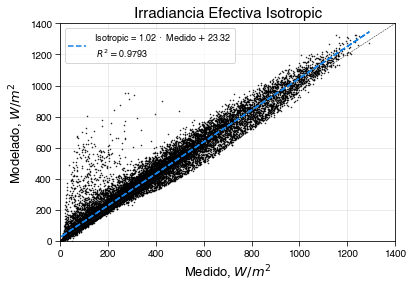

ISOTROPIC
R2:  0.9793
RMSE:  4.8
MAPE:  9.95




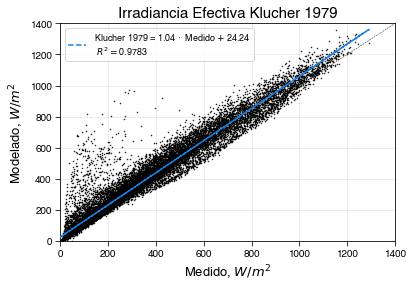

KLUCHER 1979
R2:  0.9783
RMSE:  5.14
MAPE:  10.51




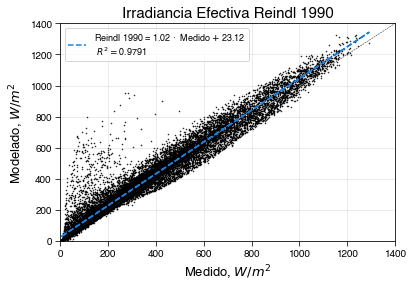

REINDL 1990
R2:  0.9791
RMSE:  4.79
MAPE:  9.83




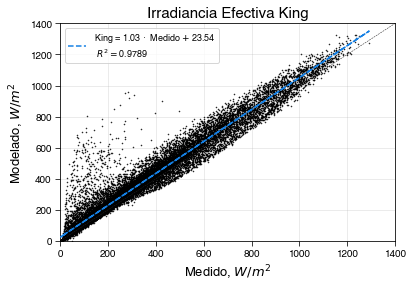

KING
R2:  0.9789
RMSE:  4.92
MAPE:  10.2




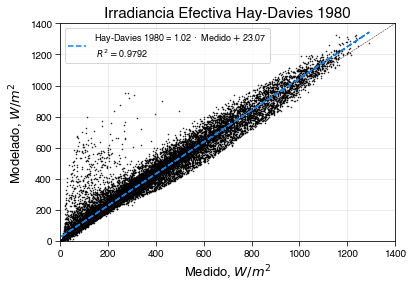

HAY-DAVIES 1980
R2:  0.9792
RMSE:  4.79
MAPE:  9.83




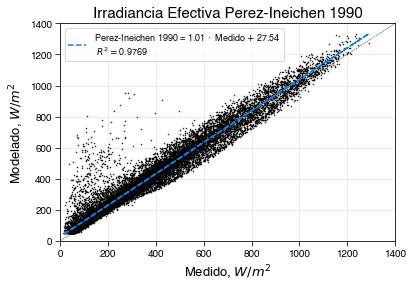

PEREZ-INEICHEN 1990
R2:  0.9769
RMSE:  4.87
MAPE:  9.07




In [93]:
list_r2 = []
list_rmse = []
list_mape = []

other_models = ['isotropic', 'klucher', 'reindl', 'king', 'haydavies', 'perez']

for i in other_models:

    if i == 'isotropic':
        y_value = poa_isotropic['poa_global'][start:end]
        title_name = 'Isotropic'
    
    elif i == 'klucher':
        y_value = poa_klucher['poa_global'][start:end]
        title_name = 'Klucher 1979'
        
    elif i == 'reindl':
        y_value = poa_reindl['poa_global'][start:end]
        title_name = 'Reindl 1990'
        
    elif i == 'king':
        y_value = poa_king['poa_global'][start:end]
        title_name = 'King'
        
    elif i == 'haydavies':
        y_value = poa_haydavies['poa_global'][start:end]
        title_name = 'Hay-Davies 1980'
    
    else:
        y_value = poa_perez['poa_global'][start:end]
        title_name = 'Perez-Ineichen 1990'
    
    #Measured and modeled POA dataframe
    irrads = pd.DataFrame({'effective_irrad': dirindex.effective_irrad[start:end], 
                           'poa_global': y_value})

    irrads = irrads.dropna()
    
    if i == 'perez':
        irrads = irrads.drop(irrads[(irrads.effective_irrad > 1) & (irrads.poa_global < 50)].index) #Perez Data Filter
    
    #Least Squares Linear Regression
    x_value = irrads.effective_irrad
    y_value = irrads.poa_global

    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 1400

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.figure()
    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=(f"{title_name} = " + f"{slope.round(2)} $· \:$ Medido $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Irradiancia Efectiva {title_name}',
              ylabel='Modelado, $W/m^2$',
              xlabel='Medido, $W/m^2$',
              rot=0, 
              ylim_min=0, ylim_max=axis_lim, 
              xlim_min=0, xlim_max=axis_lim, 
              loc='best')
    plt.show()
    
    #Metrics
    print(title_name.upper())
    print('R2: ', r_value.round(4))

    metrics = pd.DataFrame({'effective_irrad': x_value, 
                            'poa': y_value})

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    metrics = metrics.loc[(metrics.index.hour >= 7) & (metrics.index.hour <= 17) & (metrics.effective_irrad != 0)]

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print('MAPE: ', np.round(mape, 2))
    print('\n')
    
    list_r2.append(r_value)
    list_rmse.append(rmse)
    list_mape.append(mape)
    
list_r2 = [x * 100 for x in list_r2]

### 8.5. Métricas Estadísticas Modelos Transposición

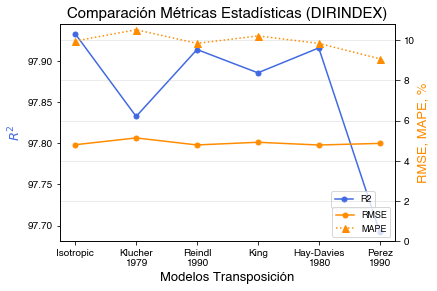

In [94]:
full_models = ['Isotropic', 'Klucher\n1979', 'Reindl\n1990', 'King', 'Hay-Davies\n1980', 'Perez\n1990']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.plot(full_models, list_r2, color='royalblue', ls='-', marker='o', ms=5, label='R2')
ax2.plot(full_models, list_rmse, color='darkorange', ls='-', marker='o', ms=5, label='RMSE')
ax2.plot(full_models, list_mape, color='darkorange', ls='dotted', marker='^', ms=7, label='MAPE')

ax1.set_xlabel('Modelos Transposición', fontname="Helvetica", fontsize=13)
ax1.set_ylabel('$R^2$', fontname="Helvetica", fontsize=13, color='royalblue')
ax2.set_ylabel('RMSE, MAPE', fontname="Helvetica", fontsize=13, color='darkorange')

plt.rc('font', family='Helvetica')
plt.rcParams['axes.axisbelow'] = True;

plt.title('Comparación Métricas Estadísticas (DIRINDEX)', fontname="Helvetica", fontsize=15);
plt.ylabel('RMSE, MAPE, %', fontname="Helvetica", fontsize=13);
#plt.xlabel('Medido, $W/m^2$', fontname="Helvetica", fontsize=13);

plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
plt.xticks(rotation=0)
plt.xlim(None, None)
plt.ylim(0, None)
plt.grid(True);
plt.legend(loc='lower right', fontsize=9);
ax1.legend(loc=(0.81, 0.155), fontsize=9);
plt.tight_layout;

### 8.6. Simulación de Producción Planta FV

#### 8.6.1. Producción DC y Potencia AC

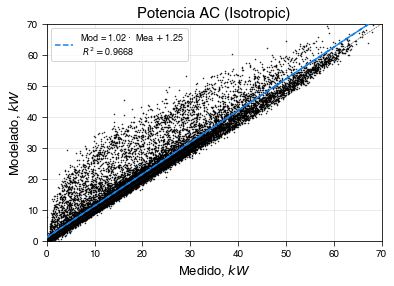

ISOTROPIC
R2:  0.9668
RMSE:  5.91
MAPE:  5.43




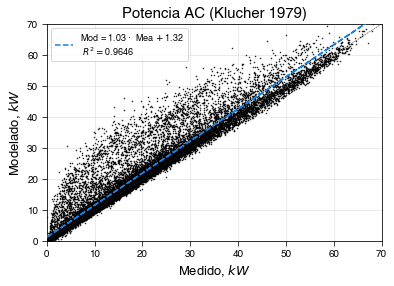

KLUCHER 1979
R2:  0.9646
RMSE:  6.3
MAPE:  6.22




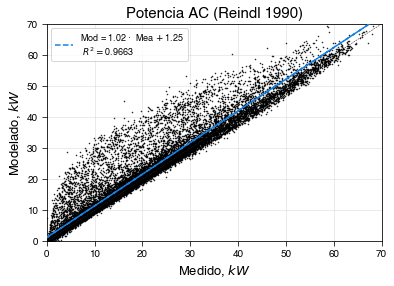

REINDL 1990
R2:  0.9663
RMSE:  5.91
MAPE:  5.35




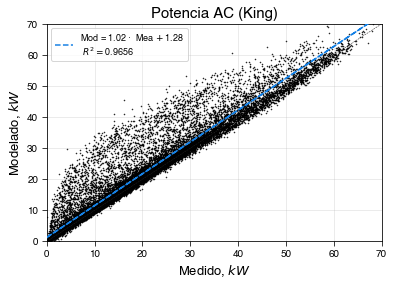

KING
R2:  0.9656
RMSE:  6.07
MAPE:  5.59




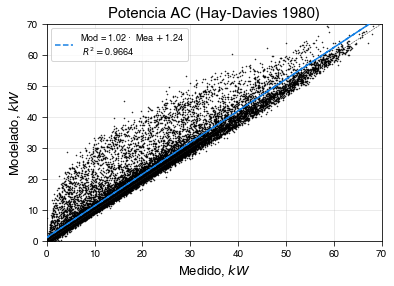

HAY-DAVIES 1980
R2:  0.9664
RMSE:  5.91
MAPE:  5.35




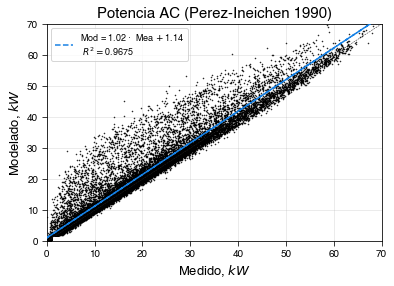

PEREZ-INEICHEN 1990
R2:  0.9675
RMSE:  5.66
MAPE:  4.91




In [95]:
measured_energy = pd.DataFrame()
simulated_energy = pd.DataFrame()
month_measured_energy = pd.DataFrame()
month_simulated_energy = pd.DataFrame()
energy_error = pd.DataFrame()

full_models = ['isotropic', 'klucher', 'reindl', 'king', 'haydavies', 'perez']

for i in full_models:

    if i == 'isotropic':
        y_value = poa_isotropic['poa_global']
        title_name = 'Isotropic'
    
    elif i == 'klucher':
        y_value = poa_klucher['poa_global']
        title_name = 'Klucher 1979'
        
    elif i == 'reindl':
        y_value = poa_reindl['poa_global']
        title_name = 'Reindl 1990'
        
    elif i == 'king':
        y_value = poa_king['poa_global']
        title_name = 'King'
        
    elif i == 'haydavies':
        y_value = poa_haydavies['poa_global']
        title_name = 'Hay-Davies 1980'
    
    else:
        y_value = poa_perez['poa_global']
        title_name = 'Perez-Ineichen 1990'

    data = pd.DataFrame({'poa_global': y_value, 
                         'module_temp': meteocontrolDB.module_temp})

    data = data.set_index(meteocontrolDB.index)
    data = data.dropna()
    
    #DC Production
    sc_A, sc_B = dc_production(effective_irradiance=data.poa_global,
                               module_temperature=data.module_temp)
    
    #Losses
    sc_A, sc_B = losses(sc_A=sc_A, sc_B=sc_B)
    
    #AC Power
    ACPow = ac_power(sc_A=sc_A, sc_B=sc_B) #Simulated
    ac = meteocontrolDB.ac_A + meteocontrolDB.ac_B #Measured
    
    #Figure
    plt.figure()

    #Least Squares Linear Regression
    x_value = ac[start:end]/kilo
    y_value = ACPow/kilo

    ac = pd.DataFrame({'measured': x_value, 
                       'modeled': y_value})

    ac = ac.dropna()

    #Perez Filter    
    if i == 'perez':
        ac = ac.drop(ac[(ac.measured > 1) & (ac.modeled < 2)].index) #Perez Data Filter
    
    x_value = ac.measured
    y_value = ac.modeled

    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 70

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), 
             color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Potencia AC ({title_name})',
               ylabel='Modelado, $kW$',
               xlabel='Medido, $kW$',
               rot=0, 
               ylim_min=0, ylim_max=axis_lim, 
               xlim_min=0, xlim_max=axis_lim, 
               loc='best')
    
    plt.show()
    
    mea_energy, sim_energy, month_mea_energy, month_sim_energy, energyerror = energia(ACPow=ACPow, res=5)
    
    measured_energy[i] = mea_energy['energy']
    simulated_energy[i] = sim_energy['Daily Energy, kWh']
    month_measured_energy[i] = month_mea_energy['energy']
    month_simulated_energy[i] = month_sim_energy['Daily Energy, kWh']
    energy_error[i] = energyerror['perc_error']
    
    #Metrics
    print(title_name.upper())
    print('R2: ', r_value.round(4))

    metrics = pd.DataFrame({'effective_irrad': x_value, 
                            'poa': y_value})

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    metrics = metrics.loc[(metrics.index.hour >= 7) & (metrics.index.hour <= 17) & (metrics.effective_irrad != 0)]

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print('MAPE: ', np.round(mape, 2))
    print('\n')
    
    list_r2.append(r_value)
    list_rmse.append(rmse)
    list_mape.append(mape)
    
list_r2 = [x * 100 for x in list_r2]

#### 8.6.2. Energía Diaria

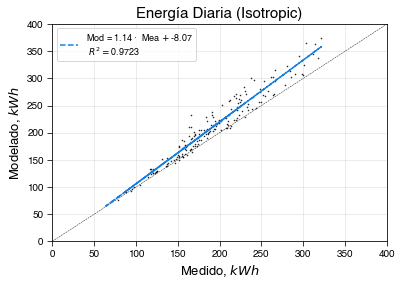

ISOTROPIC
R2:  0.9723
RMSE:  7.59
MAPE:  7.84




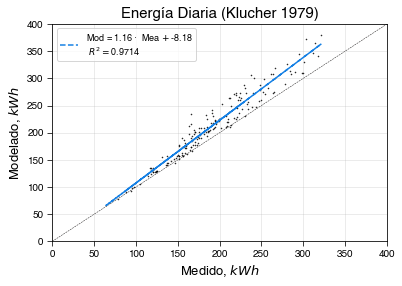

KLUCHER 1979
R2:  0.9714
RMSE:  8.46
MAPE:  9.56




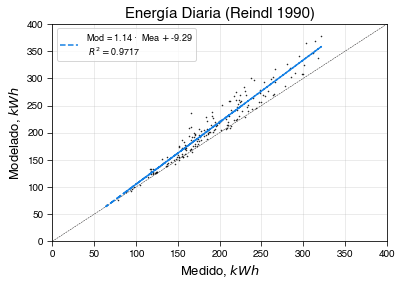

REINDL 1990
R2:  0.9717
RMSE:  7.55
MAPE:  7.34




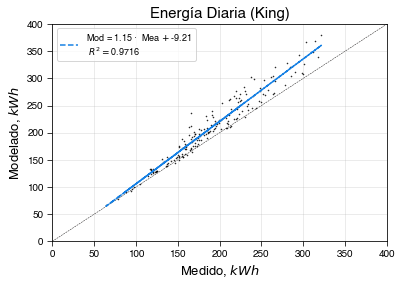

KING
R2:  0.9716
RMSE:  7.93
MAPE:  8.13




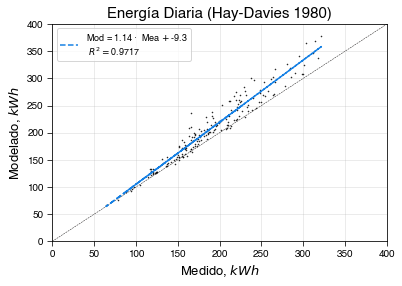

HAY-DAVIES 1980
R2:  0.9717
RMSE:  7.55
MAPE:  7.33




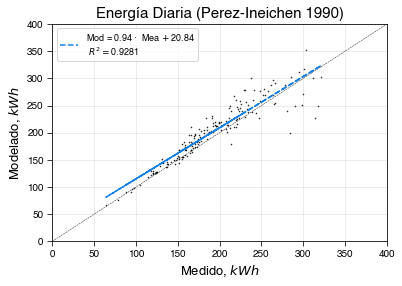

PEREZ-INEICHEN 1990
R2:  0.9281
RMSE:  6.86
MAPE:  6.78




In [96]:
for i in full_models:
    if i == 'isotropic':
        title_name = 'Isotropic'
    
    elif i == 'klucher':
        title_name = 'Klucher 1979'
        
    elif i == 'reindl':
        title_name = 'Reindl 1990'
        
    elif i == 'king':
        title_name = 'King'
        
    elif i == 'haydavies':
        title_name = 'Hay-Davies 1980'
    
    else:
        title_name = 'Perez-Ineichen 1990'
    
    #Figure
    plt.figure()

    #Least Squares Linear Regression
    x_value = measured_energy[i]
    x_value = x_value[:-1]
    
    y_value = simulated_energy[i]

    coef = np.polyfit(x_value, y_value, 1)
    poly1d_fn = np.poly1d(coef)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x_value, y_value)

    #Figure
    axis_lim = 400

    x = np.linspace(0, axis_lim, axis_lim)
    y_reg = slope*x + intercept

    plt.plot(x_value, 
             poly1d_fn(x_value), 
             '--k',
             label=("Mod = " + f"{slope.round(2)} $· \:$ Mea $+ \:$" + f"{intercept.round(2)} \n $R^2 = $" 
                   + f"{r_value.round(4)}"), 
             color='#1580E4', linewidth=1.5, zorder = 10)

    plt.plot(x_value, y_value, color='black', ls='', marker='.', ms=1, fillstyle='none')

    y = x
    plt.plot(x, y, '--', color='#222020', linewidth=0.5)

    plot_specs(title=f'Energía Diaria ({title_name})',
               ylabel='Modelado, $kWh$',
               xlabel='Medido, $kWh$',
               rot=0, 
               ylim_min=0, ylim_max=axis_lim, 
               xlim_min=0, xlim_max=axis_lim, 
               loc='best')
    
    plt.show()
    
    #Metrics
    print(title_name.upper())
    print('R2: ', r_value.round(4))

    metrics = pd.DataFrame({'effective_irrad': x_value, 
                            'poa': y_value})

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
    rmse = (rmse/np.max(y_true))*100
    print('RMSE: ', np.round(rmse, 2))

    '''
    MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
    '''
    metrics = metrics.loc[metrics.effective_irrad != 0]

    y_true = metrics.effective_irrad
    y_pred = metrics.poa

    mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    print('MAPE: ', np.round(mape, 2))
    print('\n')
    
    list_r2.append(r_value)
    list_rmse.append(rmse)
    list_mape.append(mape)
    
list_r2 = [x * 100 for x in list_r2]

#### <span style='color:CadetBlue'>8.6.3. Energía Mensual </span> <span style='color:White'>code:15</span>

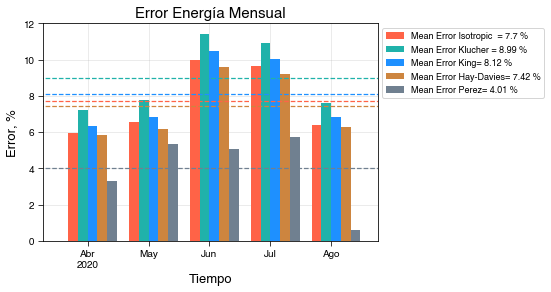

In [97]:
#Energy Error Comparison Plot
bar_width = 0.08;
width = bar_width*2;

months = ['Abr\n2020', 'May', 'Jun', 'Jul', 'Ago']

x = np.arange(len(months))

r1 = np.arange(len(months))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]
r6 = [x + bar_width for x in r5]
r7 = [x + bar_width for x in r6]
r8 = [x + bar_width for x in r7]
r9 = [x + bar_width for x in r8]
r10 = [x + bar_width for x in r9]
r511 = [x + bar_width for x in r10]

#Mean Error Values
meanerror_isotropic = round(energy_error['isotropic'][0:5].mean(), 2)
meanerror_klucher = round(energy_error['klucher'][0:5].mean(), 2)
meanerror_reindl = round(energy_error['reindl'][0:5].mean(), 2)
meanerror_king = round(energy_error['king'][0:5].mean(), 2)
meanerror_haydavies = round(energy_error['haydavies'][0:5].mean(), 2)
meanerror_perez = round(energy_error['perez'][0:5].mean(), 2)

#Bar Plots
hor, ver = 13, 5
#plt.figure(figsize=(hor,ver))

plt.bar(r1, energy_error['isotropic'][0:5], width, 
        label='Mean Error Isotropic  = ' + f'{meanerror_isotropic}' + ' %', color='tomato', linewidth=2);

plt.bar(r3, energy_error['klucher'][0:5], width, 
        label='Mean Error Klucher = ' + f'{meanerror_klucher}' + ' %', color='lightseagreen', linewidth=2);

plt.bar(r5, energy_error['king'][0:5], width, 
        label='Mean Error King= ' + f'{meanerror_king}' + ' %', color='dodgerblue', linewidth=2);

plt.bar(r7, energy_error['haydavies'][0:5], width, 
        label='Mean Error Hay-Davies= ' + f'{meanerror_haydavies}' + ' %', color='peru', linewidth=2);

plt.bar(r9, energy_error['perez'][0:5], width, 
        label='Mean Error Perez= ' + f'{meanerror_perez}' + ' %', color='slategray', linewidth=2);

#Horizontal Lines
plt.hlines(y=0, xmin=-1, xmax=x[-1]+1, colors='black', linestyles='solid', linewidth=0.5) #Zero
plt.hlines(y=meanerror_isotropic, xmin=-1, xmax=x[-1]+1, colors='tomato', linestyles='--', linewidth=1.25) #SysA
plt.hlines(y=meanerror_klucher, xmin=-1, xmax=x[-1]+1, colors='lightseagreen', linestyles='--', linewidth=1.25) #SysB
plt.hlines(y=meanerror_king, xmin=-1, xmax=x[-1]+1, colors='dodgerblue', linestyles='--', linewidth=1.25) #Full
plt.hlines(y=meanerror_haydavies, xmin=-1, xmax=x[-1]+1, colors='peru', linestyles='--', linewidth=1.25) #Full
plt.hlines(y=meanerror_perez, xmin=-1, xmax=x[-1]+1, colors='slategray', linestyles='--', linewidth=1.25) #Full

plt.xticks(r4, months)
plot_specs(title='Error Energía Mensual',
           ylabel='Error, %',
           xlabel='Tiempo',
           rot=0, 
           ylim_min=0, ylim_max=None, 
           xlim_min=-0.5, xlim_max=5, 
           loc='best')
plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize=9);

In [98]:
#BEST MODEL METRICS
print('ENERGÍA MENSUAL SISTEMA COMPLETO')

print('-'*10)
print(title_name)
metrics = pd.DataFrame({'measured_energy': month_measured_energy['perez'][0:5].values, 
                        'modeled_energy': month_simulated_energy['perez'][0:5].values})

y_true = metrics.measured_energy
y_pred = metrics.modeled_energy

r2 = r2_score(y_true=y_true, y_pred=y_pred)
print('R2: ', np.round(r2, 4))

rmse = mean_squared_error(y_true=y_true, y_pred=y_pred, squared=False)
rmse = (rmse/np.max(y_true))*100
print('RMSE: ', np.round(rmse, 2))

'''
MAPE requiere filtrar los datos cuando y_true=0 --> (y_true - y_pred)/y_true
'''
metrics = metrics.loc[metrics.measured_energy != 0]

y_true = metrics.measured_energy
y_pred = metrics.modeled_energy

mape = median_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
print('MAPE: ', np.round(mape, 2), '\n')

ENERGÍA MENSUAL SISTEMA COMPLETO
----------
Perez-Ineichen 1990
R2:  0.8046
RMSE:  4.04
MAPE:  5.33 



---

## <span style='color:CadetBlue'>9. Conclusiones </span> <span style='color:White'>code:16</span>

En el presente cuaderno se implementan diferentes métodos que estiman y modelan de la Irradiancia Normal Directa (Direct Normal Irradiance – DNI), la Irradiancia Horizontal Difusa (Diffuse Horizontal Irradiance – DHI) y la irradiancia sobre el plano del arreglo (Plane Of the Array-POA) a partir de la Irradiancia Horizontal Global (Global Horizontal Irradiance – GHI).

Los métodos se validan frente a **datos monitoreados con resolución cinco-minutal** de la producción del sistema de 80 kWp de la Universidad de los Andes.

Los modelos de descomposición evaluados son: 
1. Erbs.
2. DISC.
3. DIRINT.
4. DIRINDEX.

Para cada modelo de descomposición, se estudian los modelos de transposición:
1. Isotropic.
2. Klucher 1979.
3. Reindl 1990.
4. King.
5. Hay-Davies 1980.
6. Perez-Ineichen 1990.

Además de comparar la estimación de la irradiancia POA, obtenida con las simulaciones de DNI y DHI, con el valor objetivo, también se valida la energía diaria y mensual estimada a partir de simulaciones con la librería ```pvlib``` ---y las irradiancia POA simulada--- con la producción medida.

La precisión del modelado se estima a partir de métricas estadísticas descriptivas tales como: (i.) coeficiente de correlación (R$^2$), raíz del error cuadrático medio (RMSE, por sus siglas en inglés) y mediana del error absoluto porcentual (MAPE, por sus siglas en inglés).

Los estudios muestran que la estimación de la irradiancia POA a partir de la simulación de irradiancia difusa es próxima para todos los modelos de descomposición + transposición evaluados. Específicamente, el RMSE y MAPE varía menos del 1% entre los modelos; en cuanto al R$^2$, las variaciones también son inferiores a 0.1.

Lo mismo sucede con la estimación energética, sin embargo, la combinación ---i.e. descomposición + transposición--- que mayor precisión presenta es <span style='outline:2px solid Orange; color:Peru'>**DISC + Perez-Ineichen 1990**</span>, con las métricas presentadas a continuación.

|         | Irradiancia POA | Energía Diaria | Energía Mensual |
|---------|-----------------|----------------|-----------------|
| R2      | 0.986           | 0.957          |                 |
| RMSE, % | 3.56            | 6.21           | 2.46            |
| MAPE, % | 9.37            | 8.41           | 3.50$^a$        |

$^a$Error promedio

Seguido se tiene la combinación **ERBS + Perez-Ineichen 1990** con MAPE de 9.37, 8.41, 3.52, para la irradiancia POA, energía diaria y energía mensual, respectivamente.

Finalmente, la metodología recomendada para la estimación y modelamiento de la DNI, la DHI y la POA a partir de la GHI es la combinación de modelos <span style='outline:2px solid Orange; color:Peru'>**DISC + Perez-Ineichen 1990**</span>.

---